In [33]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history
import hyperopt 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from hyperopt import hp, tpe, Trials, fmin, rand
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
import time
import threading
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import sklearn
from numba import jit
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error
import math
import tensorflow_probability as tfp
import scipy
import multiprocessing
import plotly.figure_factory as ff
from tensorflow.keras.callbacks import EarlyStopping
tfd = tfp.distributions

In [ ]:
excel=pd.read_excel(r"C:\Users\Francesco\OneDrive\Desktop\progetto icarus\data_bresso.xlsx")
df=pd.DataFrame(data=excel)
sns.set(style='darkgrid')
df

In [35]:
df['Temperature'] =  (df['Temperature'].str.split(' ', 1).str[0])
df['Dew Point'] =   (df['Dew Point'].str.split(' ', 1).str[0])
df['Speed'] =   (df['Speed'].str.split(' ', 1).str[0])
df['Gust'] =   (df['Gust'].str.split(' ', 1).str[0])
df['Pressure'] =   (df['Pressure'].str.split(' ', 1).str[0])
df['Precip. Rate.'] =   (df['Precip. Rate.'].str.split(' ', 1).str[0])
df['Precip. Accum.'] =   (df['Precip. Accum.'].str.split(' ', 1).str[0])
df['Solar'] =   (df['Solar'].str.split(' ', 1).str[0])

df['Temperature'] =  (df['Temperature'].astype(float))
df['Dew Point'] =   (df['Dew Point'].astype(float))
df['Speed'] =   df['Speed'].astype(float)
df['Gust'] =   df['Gust'].astype(float)
df['Pressure'] =   df['Pressure'].astype(float)
df['Precip. Rate.'] =   df['Precip. Rate.'].astype(float)
df['Precip. Accum.'] =   df['Precip. Accum.'].astype(float)
df['Solar'] =   df['Solar'].astype(float)

In [36]:
maxx=df.Temperature.max()
df['Temperature']=df['Temperature']/df['Temperature'].max()
df['Humidity']=df['Humidity']/df['Humidity'].max()
df['Dew Point']=df['Dew Point']/df['Dew Point'].max()
df['Speed']=df['Speed']/df['Speed'].max()
df['Gust']=df['Gust']/df['Gust'].max()
df['Pressure']=df['Pressure']/df['Pressure'].max()
df['Precip. Rate.']=df['Precip. Rate.']/df['Precip. Rate.'].max()
df['Precip. Accum.']=df['Precip. Accum.']/df['Precip. Accum.'].max()
df['Solar']=df['Solar']/df['Solar'].max()

In [37]:
df.drop(columns=['Wind', 'Time', 'Precip. Rate.', 'Precip. Accum.'], axis=1, inplace=True)
df.dropna(how='any', inplace=True)
x=12
y=48
y_, x_=[], []
interval=int((len(df)-(y+2*x))/x)
interval

11

In [38]:
for i in range(interval):
    y_.append(df.Temperature[x*i:y+x*i])

df.drop(columns=['Temperature'], axis=1, inplace=True)

for i in range(interval):
    x_.append(df[x*i:y+x*i])
    
lr=0.005
batch=16
epochs=500
opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [39]:
y_=np.array(y_)
x_=np.array(x_)
x_.shape

(11, 48, 7)

In [40]:
xtrain=np.array(x_[0:9])
ytrain=np.array(y_[0:9])
xtest=np.array(x_[10:])
ytest=np.array(y_[10:])
xval=np.array(x_[9:10])
yval=np.array(y_[9:10])

In [42]:
def LSTM_model_tot(function):
    enco_deco=tf.keras.models.Sequential()
    # Encoder
    enco_deco.add(Bidirectional(LSTM(75, activation='tanh', return_sequences=True), input_shape=(48, 7)))
    enco_deco.add(Dropout(0.2))   
    enco_deco.add((Dense(units=1)))
    return enco_deco
start=time.time()

model=LSTM_model_tot('tanh')
model.compile(optimizer = opt, loss = 'mean_squared_error')
hist=model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=300, batch_size=7)
end=time.time()
print(end-start, 's')

Epoch 1/300
2/2 [==============================] - 11s 3s/step - loss: 0.8238 - val_loss: 0.2535
Epoch 2/300
2/2 [==============================] - 0s 77ms/step - loss: 0.4041 - val_loss: 0.0096
Epoch 3/300
2/2 [==============================] - 0s 76ms/step - loss: 0.0267 - val_loss: 0.0675
Epoch 4/300
2/2 [==============================] - 0s 89ms/step - loss: 0.0829 - val_loss: 0.0511
Epoch 5/300
2/2 [==============================] - 0s 103ms/step - loss: 0.0715 - val_loss: 0.0167
Epoch 6/300
2/2 [==============================] - 0s 90ms/step - loss: 0.0244 - val_loss: 0.0317
Epoch 7/300
2/2 [==============================] - 0s 105ms/step - loss: 0.0119 - val_loss: 0.0651
Epoch 8/300
2/2 [==============================] - 0s 88ms/step - loss: 0.0227 - val_loss: 0.0581
Epoch 9/300
2/2 [==============================] - 0s 100ms/step - loss: 0.0247 - val_loss: 0.0271
Epoch 10/300
2/2 [==============================] - 0s 99ms/step - loss: 0.0137 - val_loss: 0.0082
Epoch 11/300
2/2 

2/2 [==============================] - 0s 85ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 84/300
2/2 [==============================] - 0s 82ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 85/300
2/2 [==============================] - 0s 74ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 86/300
2/2 [==============================] - 0s 74ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 87/300
2/2 [==============================] - 0s 80ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 88/300
2/2 [==============================] - 0s 75ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 89/300
2/2 [==============================] - 0s 77ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 90/300
2/2 [==============================] - 0s 79ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 91/300
2/2 [==============================] - 0s 76ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 92/300
2/2 [==============================] - 0s 82ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 93/300
2/2 [=====

2/2 [==============================] - 0s 82ms/step - loss: 0.0020 - val_loss: 4.5498e-04
Epoch 164/300
2/2 [==============================] - 0s 82ms/step - loss: 0.0019 - val_loss: 6.5933e-04
Epoch 165/300
2/2 [==============================] - 0s 76ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 166/300
2/2 [==============================] - 0s 71ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 167/300
2/2 [==============================] - 0s 72ms/step - loss: 0.0019 - val_loss: 9.7184e-04
Epoch 168/300
2/2 [==============================] - 0s 70ms/step - loss: 0.0016 - val_loss: 4.5621e-04
Epoch 169/300
2/2 [==============================] - 0s 93ms/step - loss: 0.0020 - val_loss: 4.4951e-04
Epoch 170/300
2/2 [==============================] - 0s 96ms/step - loss: 0.0018 - val_loss: 3.6397e-04
Epoch 171/300
2/2 [==============================] - 0s 70ms/step - loss: 0.0016 - val_loss: 4.1113e-04
Epoch 172/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0017 - val

Epoch 242/300
2/2 [==============================] - 0s 63ms/step - loss: 0.0013 - val_loss: 2.7453e-04
Epoch 243/300
2/2 [==============================] - 0s 66ms/step - loss: 0.0013 - val_loss: 3.2306e-04
Epoch 244/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0011 - val_loss: 2.4356e-04
Epoch 245/300
2/2 [==============================] - 0s 63ms/step - loss: 0.0013 - val_loss: 2.7626e-04
Epoch 246/300
2/2 [==============================] - 0s 65ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 247/300
2/2 [==============================] - 0s 65ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 248/300
2/2 [==============================] - 0s 63ms/step - loss: 0.0013 - val_loss: 3.4791e-04
Epoch 249/300
2/2 [==============================] - 0s 62ms/step - loss: 0.0013 - val_loss: 6.4129e-04
Epoch 250/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 251/300
2/2 [==============================] - 0s 63ms/step - loss: 0.

In [43]:
ypredict=model.predict(xtest)

1/1 [==============================] - 2s 2s/step


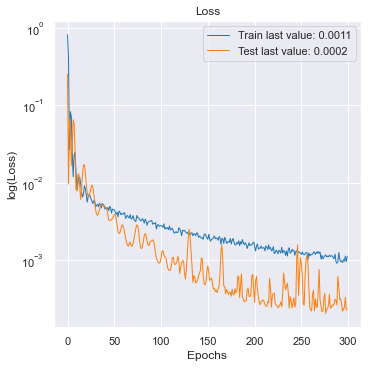

In [51]:
plot_history(hist)
plt.yscale('log')
plt.ylabel('log(Loss)')
plt.show()

In [45]:
ypredict=np.array(ypredict)
ypredict=ypredict.reshape(48)
ytest=ytest.reshape(48)

In [47]:
err=np.sqrt(sklearn.metrics.mean_squared_error(ytest[36:], ypredict[36:]))
print(err)

0.03437330151870879


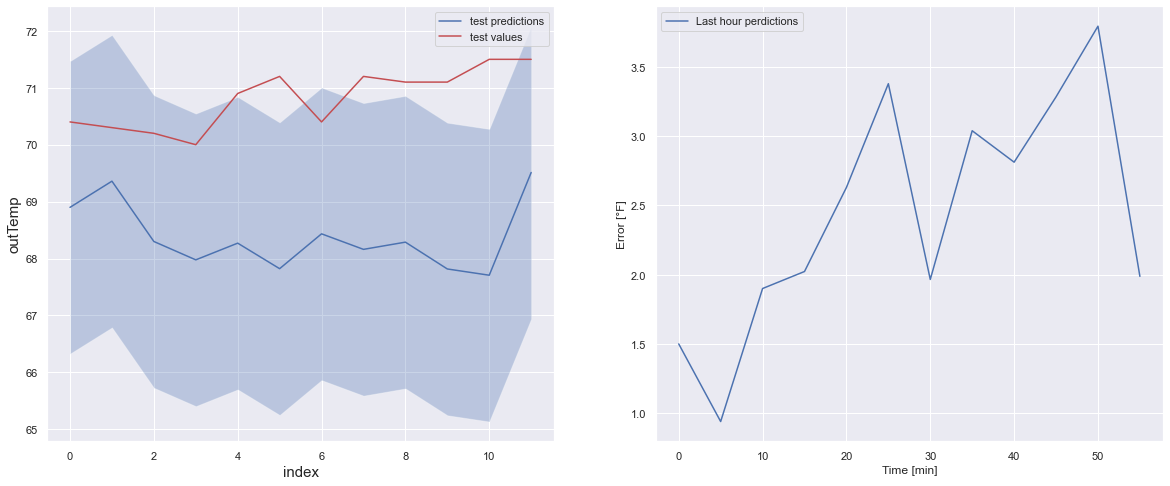

In [49]:
x=np.arange(0, 12)
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(x, ypredict[36:]*maxx, color='b')
ax[0].plot(x, ytest[36:]*maxx, color='r')
ax[0].set_xlabel("index",fontsize=15)
ax[0].set_ylabel("outTemp",fontsize=15)
ax[0].fill_between(x, ypredict[36:]*maxx-err*maxx, ypredict[36:]*maxx+err*maxx, alpha=0.3)
ax[0].grid(True)
ax[0].legend(['test predictions', 'test values'])


ax[1].plot(x*5, abs(ytest[36:]-ypredict[36:])*maxx)
ax[1].set_ylabel('Error [°F]')
ax[1].set_xlabel('Time [min]')
ax[1].legend(['Last hour perdictions'])


plt.show()

Usare troppe finestre risulta controproducente, con $\delta$ di circa 6°, da capire invece la riduzione dell'intervallo della finestra

In [9]:
def test(model, xtest, ytest):
    ypredict = np.array(model.predict(xtest))
    ypredict=ypredict.reshape(48)
    ytest=ytest.reshape(48)
    loss= np.sqrt(sklearn.metrics.mean_squared_error(ytest, ypredict))
    return loss

def train(xtrain, ytrain, parameters):
    model=tf.keras.models.Sequential()
    # Encoder
    model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(48, 7)))
    model.add(Dropout(0.2))   
    model.add((Dense(units=1)))
    adam=tf.keras.optimizers.Adam(learning_rate=parameters['learning_rate'])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(xtrain, 
              ytrain, 
              validation_data=(xval, yval), 
              epochs=300, 
              batch_size=8)
    return model

def finding_best(search_space, trial):    
    return fmin(fn=hyper_func, space=search_space, algo=tpe.suggest, max_evals=50, trials=trial)

In [10]:
def hyper_func(params):

    model = train(xtrain, ytrain, params)
    loss = test(model, xtest, ytest)
    return{'loss': loss, 'status': STATUS_OK}

search_space={
              'layer_size':hp.choice('layer_size', np.arange(30, 80, 5)), 
              'learning_rate': hp.uniform('learning_rate', 0.0001, 0.01)
              }
              
trial=Trials()

best=finding_best(search_space, trial)

print(space_eval(search_space, best))

Epoch 1/300                                           

1/1 [==============================] - 8s 8s/step - loss: 0.6615 - val_loss: 0.5568

Epoch 2/300                                           

1/1 [==============================] - 0s 95ms/step - loss: 0.4416 - val_loss: 0.3373

Epoch 3/300                                           

1/1 [==============================] - 0s 105ms/step - loss: 0.2900 - val_loss: 0.1741

Epoch 4/300                                           

1/1 [==============================] - 0s 89ms/step - loss: 0.1479 - val_loss: 0.0687

Epoch 5/300                                           

1/1 [==============================] - 0s 90ms/step - loss: 0.0643 - val_loss: 0.0214

Epoch 6/300                                           

1/1 [==============================] - 0s 103ms/step - loss: 0.0292 - val_loss: 0.0283

Epoch 7/300                                           

1/1 [==============================] - 0s 114ms/step - loss: 0.0364 - val_loss: 0.0689

Epoch 41/300                                          

1/1 [==============================] - 0s 91ms/step - loss: 0.0174 - val_loss: 0.0375

Epoch 42/300                                          

1/1 [==============================] - 0s 73ms/step - loss: 0.0190 - val_loss: 0.0343

Epoch 43/300                                          

1/1 [==============================] - 0s 71ms/step - loss: 0.0160 - val_loss: 0.0311

Epoch 44/300                                          

1/1 [==============================] - 0s 87ms/step - loss: 0.0174 - val_loss: 0.0281

Epoch 45/300                                          

1/1 [==============================] - 0s 75ms/step - loss: 0.0169 - val_loss: 0.0254

Epoch 46/300                                          

1/1 [==============================] - 0s 77ms/step - loss: 0.0158 - val_loss: 0.0232

Epoch 47/300                                          

1/1 [==============================] - 0s 74ms/step - loss: 0.0152 - val_loss: 0.0214


Epoch 81/300                                          

1/1 [==============================] - 0s 142ms/step - loss: 0.0140 - val_loss: 0.0154

Epoch 82/300                                          

1/1 [==============================] - 0s 115ms/step - loss: 0.0129 - val_loss: 0.0157

Epoch 83/300                                          

1/1 [==============================] - 0s 124ms/step - loss: 0.0124 - val_loss: 0.0160

Epoch 84/300                                          

1/1 [==============================] - 0s 122ms/step - loss: 0.0130 - val_loss: 0.0163

Epoch 85/300                                          

1/1 [==============================] - 0s 111ms/step - loss: 0.0127 - val_loss: 0.0166

Epoch 86/300                                          

1/1 [==============================] - 0s 181ms/step - loss: 0.0138 - val_loss: 0.0169

Epoch 87/300                                          

1/1 [==============================] - 0s 128ms/step - loss: 0.0122 - val_loss: 

1/1 [==============================] - 0s 99ms/step - loss: 0.0111 - val_loss: 0.0167

Epoch 121/300                                         

1/1 [==============================] - 0s 94ms/step - loss: 0.0109 - val_loss: 0.0166

Epoch 122/300                                         

1/1 [==============================] - 0s 89ms/step - loss: 0.0105 - val_loss: 0.0164

Epoch 123/300                                         

1/1 [==============================] - 0s 93ms/step - loss: 0.0111 - val_loss: 0.0161

Epoch 124/300                                         

1/1 [==============================] - 0s 95ms/step - loss: 0.0115 - val_loss: 0.0157

Epoch 125/300                                         

1/1 [==============================] - 0s 89ms/step - loss: 0.0105 - val_loss: 0.0153

Epoch 126/300                                         

1/1 [==============================] - 0s 79ms/step - loss: 0.0097 - val_loss: 0.0149

Epoch 127/300                                         


1/1 [==============================] - 0s 69ms/step - loss: 0.0090 - val_loss: 0.0120

Epoch 161/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0089 - val_loss: 0.0121

Epoch 162/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0088 - val_loss: 0.0120

Epoch 163/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0092 - val_loss: 0.0120

Epoch 164/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0084 - val_loss: 0.0119

Epoch 165/300                                         

1/1 [==============================] - 0s 69ms/step - loss: 0.0090 - val_loss: 0.0117

Epoch 166/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0093 - val_loss: 0.0113

Epoch 167/300                                         


Epoch 200/300                                         

1/1 [==============================] - 0s 75ms/step - loss: 0.0079 - val_loss: 0.0073

Epoch 201/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0075 - val_loss: 0.0071

Epoch 202/300                                         

1/1 [==============================] - 0s 71ms/step - loss: 0.0071 - val_loss: 0.0070

Epoch 203/300                                         

1/1 [==============================] - 0s 71ms/step - loss: 0.0073 - val_loss: 0.0069

Epoch 204/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0071 - val_loss: 0.0068

Epoch 205/300                                         

1/1 [==============================] - 0s 76ms/step - loss: 0.0076 - val_loss: 0.0068

Epoch 206/300                                         

1/1 [==============================] - 0s 68ms/step - loss: 0.0076 - val_loss: 0.0070


Epoch 240/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0063 - val_loss: 0.0085

Epoch 241/300                                         

1/1 [==============================] - 0s 76ms/step - loss: 0.0065 - val_loss: 0.0083

Epoch 242/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0061 - val_loss: 0.0083

Epoch 243/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0065 - val_loss: 0.0083

Epoch 244/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0062 - val_loss: 0.0083

Epoch 245/300                                         

1/1 [==============================] - 0s 98ms/step - loss: 0.0059 - val_loss: 0.0082

Epoch 246/300                                         

1/1 [==============================] - 0s 81ms/step - loss: 0.0064 - val_loss: 0.0081


1/1 [==============================] - 0s 183ms/step - loss: 0.0059 - val_loss: 0.0050

Epoch 280/300                                         

1/1 [==============================] - 0s 174ms/step - loss: 0.0059 - val_loss: 0.0050

Epoch 281/300                                         

1/1 [==============================] - 0s 143ms/step - loss: 0.0053 - val_loss: 0.0050

Epoch 282/300                                         

1/1 [==============================] - 0s 130ms/step - loss: 0.0053 - val_loss: 0.0049

Epoch 283/300                                         

1/1 [==============================] - 0s 137ms/step - loss: 0.0051 - val_loss: 0.0049

Epoch 284/300                                         

1/1 [==============================] - 0s 112ms/step - loss: 0.0059 - val_loss: 0.0049

Epoch 285/300                                         

1/1 [==============================] - 0s 100ms/step - loss: 0.0054 - val_loss: 0.0048

Epoch 286/300                                   

1/1 [==============================] - 0s 81ms/step - loss: 0.0184 - val_loss: 0.0111

Epoch 16/300                                                                     

1/1 [==============================] - 0s 99ms/step - loss: 0.0186 - val_loss: 0.0138

Epoch 17/300                                                                     

1/1 [==============================] - 0s 99ms/step - loss: 0.0208 - val_loss: 0.0165

Epoch 18/300                                                                     

1/1 [==============================] - 0s 85ms/step - loss: 0.0244 - val_loss: 0.0182

Epoch 19/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0281 - val_loss: 0.0185

Epoch 20/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0297 - val_loss: 0.0176

Epoch 21/300                                                   

1/1 [==============================] - 0s 138ms/step - loss: 0.0152 - val_loss: 0.0115

Epoch 48/300                                                                     

1/1 [==============================] - 0s 118ms/step - loss: 0.0155 - val_loss: 0.0115

Epoch 49/300                                                                     

1/1 [==============================] - 0s 103ms/step - loss: 0.0137 - val_loss: 0.0117

Epoch 50/300                                                                     

1/1 [==============================] - 0s 96ms/step - loss: 0.0137 - val_loss: 0.0119

Epoch 51/300                                                                     

1/1 [==============================] - 0s 103ms/step - loss: 0.0127 - val_loss: 0.0122

Epoch 52/300                                                                     

1/1 [==============================] - 0s 120ms/step - loss: 0.0118 - val_loss: 0.0127

Epoch 53/300                                              

Epoch 80/300                                                                     

1/1 [==============================] - 0s 140ms/step - loss: 0.0122 - val_loss: 0.0164

Epoch 81/300                                                                     

1/1 [==============================] - 0s 127ms/step - loss: 0.0104 - val_loss: 0.0167

Epoch 82/300                                                                     

1/1 [==============================] - 0s 143ms/step - loss: 0.0103 - val_loss: 0.0167

Epoch 83/300                                                                     

1/1 [==============================] - 0s 131ms/step - loss: 0.0115 - val_loss: 0.0166

Epoch 84/300                                                                     

1/1 [==============================] - 0s 136ms/step - loss: 0.0109 - val_loss: 0.0164

Epoch 85/300                                                                     

1/1 [==============================] - 0s 165ms/step - loss: 0

1/1 [==============================] - 0s 129ms/step - loss: 0.0098 - val_loss: 0.0115

Epoch 113/300                                                                    

1/1 [==============================] - 0s 122ms/step - loss: 0.0090 - val_loss: 0.0113

Epoch 114/300                                                                    

1/1 [==============================] - 0s 153ms/step - loss: 0.0085 - val_loss: 0.0109

Epoch 115/300                                                                    

1/1 [==============================] - 0s 125ms/step - loss: 0.0087 - val_loss: 0.0107

Epoch 116/300                                                                    

1/1 [==============================] - 0s 132ms/step - loss: 0.0091 - val_loss: 0.0106

Epoch 117/300                                                                    

1/1 [==============================] - 0s 134ms/step - loss: 0.0088 - val_loss: 0.0107

Epoch 118/300                                            

1/1 [==============================] - 0s 111ms/step - loss: 0.0078 - val_loss: 0.0097

Epoch 145/300                                                                    

1/1 [==============================] - 0s 89ms/step - loss: 0.0086 - val_loss: 0.0098

Epoch 146/300                                                                    

1/1 [==============================] - 0s 89ms/step - loss: 0.0080 - val_loss: 0.0098

Epoch 147/300                                                                    

1/1 [==============================] - 0s 93ms/step - loss: 0.0082 - val_loss: 0.0100

Epoch 148/300                                                                    

1/1 [==============================] - 0s 96ms/step - loss: 0.0070 - val_loss: 0.0101

Epoch 149/300                                                                    

1/1 [==============================] - 0s 99ms/step - loss: 0.0072 - val_loss: 0.0101

Epoch 150/300                                                 

Epoch 177/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0072 - val_loss: 0.0063

Epoch 178/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0061 - val_loss: 0.0063

Epoch 179/300                                                                    

1/1 [==============================] - 0s 71ms/step - loss: 0.0052 - val_loss: 0.0063

Epoch 180/300                                                                    

1/1 [==============================] - 0s 85ms/step - loss: 0.0054 - val_loss: 0.0065

Epoch 181/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0057 - val_loss: 0.0066

Epoch 182/300                                                                    

1/1 [==============================] - 0s 70ms/step - loss: 0.0063 

1/1 [==============================] - 0s 84ms/step - loss: 0.0052 - val_loss: 0.0050

Epoch 210/300                                                                    

1/1 [==============================] - 0s 76ms/step - loss: 0.0049 - val_loss: 0.0048

Epoch 211/300                                                                    

1/1 [==============================] - 0s 75ms/step - loss: 0.0054 - val_loss: 0.0047

Epoch 212/300                                                                    

1/1 [==============================] - 0s 77ms/step - loss: 0.0049 - val_loss: 0.0045

Epoch 213/300                                                                    

1/1 [==============================] - 0s 77ms/step - loss: 0.0052 - val_loss: 0.0045

Epoch 214/300                                                                    

1/1 [==============================] - 0s 74ms/step - loss: 0.0049 - val_loss: 0.0043

Epoch 215/300                                                  

1/1 [==============================] - 0s 113ms/step - loss: 0.0042 - val_loss: 0.0033

Epoch 242/300                                                                    

1/1 [==============================] - 0s 80ms/step - loss: 0.0051 - val_loss: 0.0032

Epoch 243/300                                                                    

1/1 [==============================] - 0s 80ms/step - loss: 0.0040 - val_loss: 0.0033

Epoch 244/300                                                                    

1/1 [==============================] - 0s 80ms/step - loss: 0.0048 - val_loss: 0.0033

Epoch 245/300                                                                    

1/1 [==============================] - 0s 85ms/step - loss: 0.0041 - val_loss: 0.0033

Epoch 246/300                                                                    

1/1 [==============================] - 0s 75ms/step - loss: 0.0048 - val_loss: 0.0033

Epoch 247/300                                                 

Epoch 274/300                                                                    

1/1 [==============================] - 0s 70ms/step - loss: 0.0040 - val_loss: 0.0023

Epoch 275/300                                                                    

1/1 [==============================] - 0s 67ms/step - loss: 0.0041 - val_loss: 0.0023

Epoch 276/300                                                                    

1/1 [==============================] - 0s 68ms/step - loss: 0.0041 - val_loss: 0.0023

Epoch 277/300                                                                    

1/1 [==============================] - 0s 68ms/step - loss: 0.0035 - val_loss: 0.0023

Epoch 278/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0039 - val_loss: 0.0023

Epoch 279/300                                                                    

1/1 [==============================] - 0s 67ms/step - loss: 0.0041 

1/1 [==============================] - 0s 84ms/step - loss: 0.0407 - val_loss: 0.0404

Epoch 6/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0585 - val_loss: 0.0596

Epoch 7/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0964 - val_loss: 0.0734

Epoch 8/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.1180 - val_loss: 0.0731

Epoch 9/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.1068 - val_loss: 0.0626

Epoch 10/300                                                                     

1/1 [==============================] - 0s 109ms/step - loss: 0.0809 - val_loss: 0.0484

Epoch 11/300                                                  

Epoch 38/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0175 - val_loss: 0.0353

Epoch 39/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0180 - val_loss: 0.0299

Epoch 40/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0175 - val_loss: 0.0257

Epoch 41/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0159 - val_loss: 0.0224

Epoch 42/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0166 - val_loss: 0.0198

Epoch 43/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0158 

1/1 [==============================] - 0s 71ms/step - loss: 0.0146 - val_loss: 0.0164

Epoch 71/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0140 - val_loss: 0.0169

Epoch 72/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0137 - val_loss: 0.0174

Epoch 73/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0140 - val_loss: 0.0180

Epoch 74/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0139 - val_loss: 0.0185

Epoch 75/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0142 - val_loss: 0.0190

Epoch 76/300                                                   

1/1 [==============================] - 0s 72ms/step - loss: 0.0103 - val_loss: 0.0098

Epoch 103/300                                                                    

1/1 [==============================] - 0s 74ms/step - loss: 0.0107 - val_loss: 0.0095

Epoch 104/300                                                                    

1/1 [==============================] - 0s 83ms/step - loss: 0.0105 - val_loss: 0.0094

Epoch 105/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0111 - val_loss: 0.0093

Epoch 106/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0101 - val_loss: 0.0092

Epoch 107/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0106 - val_loss: 0.0091

Epoch 108/300                                                  

Epoch 135/300                                                                    

1/1 [==============================] - 0s 73ms/step - loss: 0.0089 - val_loss: 0.0090

Epoch 136/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0091 - val_loss: 0.0089

Epoch 137/300                                                                    

1/1 [==============================] - 0s 86ms/step - loss: 0.0091 - val_loss: 0.0087

Epoch 138/300                                                                    

1/1 [==============================] - 0s 83ms/step - loss: 0.0096 - val_loss: 0.0084

Epoch 139/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0086 - val_loss: 0.0081

Epoch 140/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0093 

1/1 [==============================] - 0s 73ms/step - loss: 0.0076 - val_loss: 0.0055

Epoch 168/300                                                                    

1/1 [==============================] - 0s 79ms/step - loss: 0.0073 - val_loss: 0.0050

Epoch 169/300                                                                    

1/1 [==============================] - 0s 74ms/step - loss: 0.0070 - val_loss: 0.0048

Epoch 170/300                                                                    

1/1 [==============================] - 0s 71ms/step - loss: 0.0079 - val_loss: 0.0046

Epoch 171/300                                                                    

1/1 [==============================] - 0s 73ms/step - loss: 0.0077 - val_loss: 0.0044

Epoch 172/300                                                                    

1/1 [==============================] - 0s 79ms/step - loss: 0.0074 - val_loss: 0.0043

Epoch 173/300                                                  

1/1 [==============================] - 0s 73ms/step - loss: 0.0067 - val_loss: 0.0021

Epoch 200/300                                                                    

1/1 [==============================] - 0s 75ms/step - loss: 0.0064 - val_loss: 0.0020

Epoch 201/300                                                                    

1/1 [==============================] - 0s 79ms/step - loss: 0.0051 - val_loss: 0.0020

Epoch 202/300                                                                    

1/1 [==============================] - 0s 81ms/step - loss: 0.0059 - val_loss: 0.0020

Epoch 203/300                                                                    

1/1 [==============================] - 0s 83ms/step - loss: 0.0060 - val_loss: 0.0020

Epoch 204/300                                                                    

1/1 [==============================] - 0s 96ms/step - loss: 0.0057 - val_loss: 0.0019

Epoch 205/300                                                  

Epoch 232/300                                                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0056 - val_loss: 0.0023

Epoch 233/300                                                                    

1/1 [==============================] - 0s 75ms/step - loss: 0.0057 - val_loss: 0.0021

Epoch 234/300                                                                    

1/1 [==============================] - 0s 73ms/step - loss: 0.0047 - val_loss: 0.0020

Epoch 235/300                                                                    

1/1 [==============================] - 0s 71ms/step - loss: 0.0052 - val_loss: 0.0020

Epoch 236/300                                                                    

1/1 [==============================] - 0s 68ms/step - loss: 0.0052 - val_loss: 0.0019

Epoch 237/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0052 

1/1 [==============================] - 0s 73ms/step - loss: 0.0044 - val_loss: 0.0014

Epoch 265/300                                                                    

1/1 [==============================] - 0s 68ms/step - loss: 0.0050 - val_loss: 0.0014

Epoch 266/300                                                                    

1/1 [==============================] - 0s 70ms/step - loss: 0.0044 - val_loss: 0.0014

Epoch 267/300                                                                    

1/1 [==============================] - 0s 74ms/step - loss: 0.0046 - val_loss: 0.0014

Epoch 268/300                                                                    

1/1 [==============================] - 0s 71ms/step - loss: 0.0045 - val_loss: 0.0014

Epoch 269/300                                                                    

1/1 [==============================] - 0s 71ms/step - loss: 0.0044 - val_loss: 0.0014

Epoch 270/300                                                  

1/1 [==============================] - 0s 70ms/step - loss: 0.0043 - val_loss: 0.0014

Epoch 297/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0044 - val_loss: 0.0014

Epoch 298/300                                                                    

1/1 [==============================] - 0s 68ms/step - loss: 0.0042 - val_loss: 0.0014

Epoch 299/300                                                                    

1/1 [==============================] - 0s 73ms/step - loss: 0.0039 - val_loss: 0.0014

Epoch 300/300                                                                    

1/1 [==============================] - 0s 69ms/step - loss: 0.0043 - val_loss: 0.0014

1/1 [==============================] - 2s 2s/step                               

Epoch 1/300                                                                       

1/1 [==============================] - 8s 8s/step - loss: 0.5402 - 

Epoch 28/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0174 - val_loss: 0.0322

Epoch 29/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0186 - val_loss: 0.0377

Epoch 30/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0195 - val_loss: 0.0421

Epoch 31/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0201 - val_loss: 0.0449

Epoch 32/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0234 - val_loss: 0.0458

Epoch 33/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0

Epoch 60/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0131 - val_loss: 0.0256

Epoch 61/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0134 - val_loss: 0.0247

Epoch 62/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0152 - val_loss: 0.0238

Epoch 63/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0138 - val_loss: 0.0230

Epoch 64/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0148 - val_loss: 0.0222

Epoch 65/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0

Epoch 92/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0126 - val_loss: 0.0194

Epoch 93/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0127 - val_loss: 0.0191

Epoch 94/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0124 - val_loss: 0.0188

Epoch 95/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0117 - val_loss: 0.0186

Epoch 96/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0118 - val_loss: 0.0185

Epoch 97/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0

Epoch 124/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0104 - val_loss: 0.0156

Epoch 125/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0101 - val_loss: 0.0151

Epoch 126/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0106 - val_loss: 0.0144

Epoch 127/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0097 - val_loss: 0.0136

Epoch 128/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0118 - val_loss: 0.0129

Epoch 129/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0

Epoch 156/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0086 - val_loss: 0.0121

Epoch 157/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0092 - val_loss: 0.0123

Epoch 158/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0078 - val_loss: 0.0124

Epoch 159/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0087 - val_loss: 0.0122

Epoch 160/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0102 - val_loss: 0.0117

Epoch 161/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0

Epoch 188/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0073 - val_loss: 0.0065

Epoch 189/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0077 - val_loss: 0.0065

Epoch 190/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0072 - val_loss: 0.0064

Epoch 191/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0073 - val_loss: 0.0065

Epoch 192/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0076 - val_loss: 0.0064

Epoch 193/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0

Epoch 220/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0062 - val_loss: 0.0075

Epoch 221/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0068 - val_loss: 0.0073

Epoch 222/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0060 - val_loss: 0.0071

Epoch 223/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0062 - val_loss: 0.0068

Epoch 224/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0060 - val_loss: 0.0065

Epoch 225/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0

Epoch 252/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0060 - val_loss: 0.0035

Epoch 253/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0057 - val_loss: 0.0037

Epoch 254/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0059 - val_loss: 0.0038

Epoch 255/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0059 - val_loss: 0.0039

Epoch 256/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0053 - val_loss: 0.0040

Epoch 257/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0

Epoch 284/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0051 - val_loss: 0.0031

Epoch 285/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0053 - val_loss: 0.0030

Epoch 286/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0053 - val_loss: 0.0028

Epoch 287/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0048 - val_loss: 0.0028

Epoch 288/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0045 - val_loss: 0.0027

Epoch 289/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0

1/1 [==============================] - 0s 74ms/step - loss: 0.0307 - val_loss: 0.0175

Epoch 16/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0243 - val_loss: 0.0207

Epoch 17/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0251 - val_loss: 0.0249

Epoch 18/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0290 - val_loss: 0.0289

Epoch 19/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0297 - val_loss: 0.0318

Epoch 20/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0330 - val_loss: 0.0329

Epoch 21/300                                              

1/1 [==============================] - 0s 75ms/step - loss: 0.0165 - val_loss: 0.0249

Epoch 48/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0184 - val_loss: 0.0239

Epoch 49/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0170 - val_loss: 0.0233

Epoch 50/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0171 - val_loss: 0.0229

Epoch 51/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0165 - val_loss: 0.0228

Epoch 52/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0172 - val_loss: 0.0228

Epoch 53/300                                              

1/1 [==============================] - 0s 73ms/step - loss: 0.0160 - val_loss: 0.0243

Epoch 80/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0151 - val_loss: 0.0241

Epoch 81/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0143 - val_loss: 0.0239

Epoch 82/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0152 - val_loss: 0.0238

Epoch 83/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0153 - val_loss: 0.0237

Epoch 84/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0147 - val_loss: 0.0239

Epoch 85/300                                              

1/1 [==============================] - 0s 70ms/step - loss: 0.0121 - val_loss: 0.0256

Epoch 112/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0124 - val_loss: 0.0257

Epoch 113/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0119 - val_loss: 0.0259

Epoch 114/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0134 - val_loss: 0.0259

Epoch 115/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0119 - val_loss: 0.0261

Epoch 116/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0112 - val_loss: 0.0265

Epoch 117/300                                             

1/1 [==============================] - 0s 108ms/step - loss: 0.0100 - val_loss: 0.0232

Epoch 144/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0112 - val_loss: 0.0233

Epoch 145/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0108 - val_loss: 0.0233

Epoch 146/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0106 - val_loss: 0.0233

Epoch 147/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0110 - val_loss: 0.0232

Epoch 148/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0105 - val_loss: 0.0232

Epoch 149/300                                            

1/1 [==============================] - 0s 69ms/step - loss: 0.0094 - val_loss: 0.0150

Epoch 176/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0092 - val_loss: 0.0151

Epoch 177/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0098 - val_loss: 0.0151

Epoch 178/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0100 - val_loss: 0.0154

Epoch 179/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0084 - val_loss: 0.0156

Epoch 180/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0091 - val_loss: 0.0157

Epoch 181/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0086 - val_loss: 0.0115

Epoch 208/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0088 - val_loss: 0.0113

Epoch 209/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0085 - val_loss: 0.0113

Epoch 210/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0083 - val_loss: 0.0114

Epoch 211/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0084 - val_loss: 0.0116

Epoch 212/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0081 - val_loss: 0.0118

Epoch 213/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0083

Epoch 240/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0072 - val_loss: 0.0084

Epoch 241/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0072 - val_loss: 0.0084

Epoch 242/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0069 - val_loss: 0.0086

Epoch 243/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0071 - val_loss: 0.0087

Epoch 244/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0076 - val_loss: 0.0086

Epoch 245/300                                             

1/1 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0066

Epoch 272/300                                                                     

1/1 [==============================] - 0s 85ms/step - loss: 0.0057 - val_loss: 0.0064

Epoch 273/300                                                                     

1/1 [==============================] - 0s 81ms/step - loss: 0.0061 - val_loss: 0.0061

Epoch 274/300                                                                     

1/1 [==============================] - 0s 84ms/step - loss: 0.0059 - val_loss: 0.0060

Epoch 275/300                                                                     

1/1 [==============================] - 0s 84ms/step - loss: 0.0064 - val_loss: 0.0059

Epoch 276/300                                                                     

1/1 [==============================] - 0s 104ms/step - loss: 0.0056 - val_loss: 0.0057

Epoch 277/300                                            

1/1 [==============================] - 2s 2s/step                                

Epoch 1/300                                                                       

1/1 [==============================] - 8s 8s/step - loss: 1.0583 - val_loss: 0.7890

Epoch 2/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.7379 - val_loss: 0.5342

Epoch 3/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.4792 - val_loss: 0.3307

Epoch 4/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.2839 - val_loss: 0.1770

Epoch 5/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.1359 - val_loss: 0.0730

Epoch 6/300                                                     

1/1 [==============================] - 0s 90ms/step - loss: 0.0206 - val_loss: 0.0368

Epoch 33/300                                                                      

1/1 [==============================] - 0s 106ms/step - loss: 0.0202 - val_loss: 0.0428

Epoch 34/300                                                                      

1/1 [==============================] - 0s 108ms/step - loss: 0.0183 - val_loss: 0.0495

Epoch 35/300                                                                      

1/1 [==============================] - 0s 120ms/step - loss: 0.0182 - val_loss: 0.0565

Epoch 36/300                                                                      

1/1 [==============================] - 0s 124ms/step - loss: 0.0186 - val_loss: 0.0636

Epoch 37/300                                                                      

1/1 [==============================] - 0s 130ms/step - loss: 0.0174 - val_loss: 0.0702

Epoch 38/300                                         

1/1 [==============================] - 0s 129ms/step - loss: 0.0149 - val_loss: 0.0365

Epoch 65/300                                                                      

1/1 [==============================] - 0s 129ms/step - loss: 0.0154 - val_loss: 0.0371

Epoch 66/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0158 - val_loss: 0.0378

Epoch 67/300                                                                      

1/1 [==============================] - 0s 133ms/step - loss: 0.0162 - val_loss: 0.0383

Epoch 68/300                                                                      

1/1 [==============================] - 0s 117ms/step - loss: 0.0168 - val_loss: 0.0385

Epoch 69/300                                                                      

1/1 [==============================] - 0s 100ms/step - loss: 0.0168 - val_loss: 0.0385

Epoch 70/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0146 - val_loss: 0.0268

Epoch 97/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0141 - val_loss: 0.0267

Epoch 98/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0140 - val_loss: 0.0266

Epoch 99/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0139 - val_loss: 0.0267

Epoch 100/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0132 - val_loss: 0.0268

Epoch 101/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0139 - val_loss: 0.0267

Epoch 102/300                                             

1/1 [==============================] - 0s 75ms/step - loss: 0.0120 - val_loss: 0.0248

Epoch 129/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0133 - val_loss: 0.0245

Epoch 130/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0122 - val_loss: 0.0243

Epoch 131/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0120 - val_loss: 0.0241

Epoch 132/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0124 - val_loss: 0.0239

Epoch 133/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0117 - val_loss: 0.0238

Epoch 134/300                                             

1/1 [==============================] - 0s 74ms/step - loss: 0.0116 - val_loss: 0.0185

Epoch 161/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0109 - val_loss: 0.0183

Epoch 162/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0114 - val_loss: 0.0181

Epoch 163/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0100 - val_loss: 0.0179

Epoch 164/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0119 - val_loss: 0.0176

Epoch 165/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0105 - val_loss: 0.0172

Epoch 166/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0099 - val_loss: 0.0164

Epoch 193/300                                                                     

1/1 [==============================] - 0s 80ms/step - loss: 0.0098 - val_loss: 0.0163

Epoch 194/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0092 - val_loss: 0.0160

Epoch 195/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0092 - val_loss: 0.0156

Epoch 196/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0093 - val_loss: 0.0152

Epoch 197/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0103 - val_loss: 0.0147

Epoch 198/300                                             

1/1 [==============================] - 0s 77ms/step - loss: 0.0090 - val_loss: 0.0114

Epoch 225/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0088 - val_loss: 0.0112

Epoch 226/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0085 - val_loss: 0.0111

Epoch 227/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0086 - val_loss: 0.0110

Epoch 228/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0084 - val_loss: 0.0109

Epoch 229/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0083 - val_loss: 0.0109

Epoch 230/300                                             

1/1 [==============================] - 0s 91ms/step - loss: 0.0071 - val_loss: 0.0091

Epoch 257/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0079 - val_loss: 0.0091

Epoch 258/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0072 - val_loss: 0.0090

Epoch 259/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0070 - val_loss: 0.0089

Epoch 260/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0078 - val_loss: 0.0088

Epoch 261/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0082 - val_loss: 0.0087

Epoch 262/300                                             

1/1 [==============================] - 0s 88ms/step - loss: 0.0067 - val_loss: 0.0082

Epoch 289/300                                                                     

1/1 [==============================] - 0s 89ms/step - loss: 0.0068 - val_loss: 0.0083

Epoch 290/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0084

Epoch 291/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0066 - val_loss: 0.0084

Epoch 292/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0069 - val_loss: 0.0084

Epoch 293/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0068 - val_loss: 0.0085

Epoch 294/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0256 - val_loss: 0.0157

Epoch 17/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0302 - val_loss: 0.0177

Epoch 18/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0324 - val_loss: 0.0183

Epoch 19/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0339 - val_loss: 0.0176

Epoch 20/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0360 - val_loss: 0.0163

Epoch 21/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0321 - val_loss: 0.0149

Epoch 22/300                                              

1/1 [==============================] - 0s 67ms/step - loss: 0.0140 - val_loss: 0.0260

Epoch 49/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0126 - val_loss: 0.0267

Epoch 50/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0143 - val_loss: 0.0274

Epoch 51/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0130 - val_loss: 0.0282

Epoch 52/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0127 - val_loss: 0.0292

Epoch 53/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0131 - val_loss: 0.0301

Epoch 54/300                                              

1/1 [==============================] - 0s 65ms/step - loss: 0.0118 - val_loss: 0.0190

Epoch 81/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0139 - val_loss: 0.0188

Epoch 82/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0112 - val_loss: 0.0186

Epoch 83/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0104 - val_loss: 0.0185

Epoch 84/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0124 - val_loss: 0.0184

Epoch 85/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0114 - val_loss: 0.0185

Epoch 86/300                                              

1/1 [==============================] - 0s 68ms/step - loss: 0.0093 - val_loss: 0.0134

Epoch 113/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0097 - val_loss: 0.0133

Epoch 114/300                                                                     

1/1 [==============================] - 0s 82ms/step - loss: 0.0089 - val_loss: 0.0133

Epoch 115/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0097 - val_loss: 0.0133

Epoch 116/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0083 - val_loss: 0.0133

Epoch 117/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0090 - val_loss: 0.0133

Epoch 118/300                                             

1/1 [==============================] - 0s 69ms/step - loss: 0.0079 - val_loss: 0.0114

Epoch 145/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0081 - val_loss: 0.0113

Epoch 146/300                                                                     

1/1 [==============================] - 0s 67ms/step - loss: 0.0081 - val_loss: 0.0113

Epoch 147/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0078 - val_loss: 0.0113

Epoch 148/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0084 - val_loss: 0.0114

Epoch 149/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0082 - val_loss: 0.0117

Epoch 150/300                                             

1/1 [==============================] - 0s 69ms/step - loss: 0.0070 - val_loss: 0.0095

Epoch 177/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0066 - val_loss: 0.0095

Epoch 178/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0069 - val_loss: 0.0094

Epoch 179/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0063 - val_loss: 0.0094

Epoch 180/300                                                                     

1/1 [==============================] - 0s 82ms/step - loss: 0.0063 - val_loss: 0.0092

Epoch 181/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0065 - val_loss: 0.0092

Epoch 182/300                                             

1/1 [==============================] - 0s 85ms/step - loss: 0.0057 - val_loss: 0.0082

Epoch 209/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0059 - val_loss: 0.0077

Epoch 210/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0064 - val_loss: 0.0073

Epoch 211/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0061 - val_loss: 0.0068

Epoch 212/300                                                                     

1/1 [==============================] - 0s 85ms/step - loss: 0.0064 - val_loss: 0.0065

Epoch 213/300                                                                     

1/1 [==============================] - 0s 95ms/step - loss: 0.0056 - val_loss: 0.0062

Epoch 214/300                                             

1/1 [==============================] - 0s 70ms/step - loss: 0.0053 - val_loss: 0.0067

Epoch 241/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0.0053 - val_loss: 0.0065

Epoch 242/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0064

Epoch 243/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0054 - val_loss: 0.0062

Epoch 244/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0047 - val_loss: 0.0061

Epoch 245/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0047 - val_loss: 0.0059

Epoch 246/300                                             

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0049

Epoch 273/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0044 - val_loss: 0.0048

Epoch 274/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0046 - val_loss: 0.0047

Epoch 275/300                                                                     

1/1 [==============================] - 0s 67ms/step - loss: 0.0044 - val_loss: 0.0045

Epoch 276/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0041 - val_loss: 0.0044

Epoch 277/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0045 - val_loss: 0.0043

Epoch 278/300                                             

Epoch 4/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.1311 - val_loss: 0.1374

Epoch 5/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0515 - val_loss: 0.0724

Epoch 6/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0260 - val_loss: 0.0453

Epoch 7/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0390 - val_loss: 0.0459

Epoch 8/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0690 - val_loss: 0.0535

Epoch 9/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0

Epoch 36/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0177 - val_loss: 0.0342

Epoch 37/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0181 - val_loss: 0.0354

Epoch 38/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0183 - val_loss: 0.0355

Epoch 39/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0183 - val_loss: 0.0345

Epoch 40/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0170 - val_loss: 0.0328

Epoch 41/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0

Epoch 68/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0128 - val_loss: 0.0218

Epoch 69/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0134 - val_loss: 0.0215

Epoch 70/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0127 - val_loss: 0.0212

Epoch 71/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0137 - val_loss: 0.0207

Epoch 72/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0122 - val_loss: 0.0201

Epoch 73/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0

Epoch 100/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0122 - val_loss: 0.0171

Epoch 101/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0113 - val_loss: 0.0168

Epoch 102/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0125 - val_loss: 0.0167

Epoch 103/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0118 - val_loss: 0.0165

Epoch 104/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0122 - val_loss: 0.0164

Epoch 105/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0

Epoch 132/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0093 - val_loss: 0.0142

Epoch 133/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0104 - val_loss: 0.0141

Epoch 134/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0104 - val_loss: 0.0139

Epoch 135/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0098 - val_loss: 0.0139

Epoch 136/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0105 - val_loss: 0.0139

Epoch 137/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0

Epoch 164/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0098 - val_loss: 0.0138

Epoch 165/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0087 - val_loss: 0.0139

Epoch 166/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0085 - val_loss: 0.0142

Epoch 167/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0081 - val_loss: 0.0145

Epoch 168/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0094 - val_loss: 0.0151

Epoch 169/300                                                                     

1/1 [==============================] - 0s 75ms/step - loss: 0

Epoch 196/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0076 - val_loss: 0.0118

Epoch 197/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0069 - val_loss: 0.0117

Epoch 198/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0081 - val_loss: 0.0115

Epoch 199/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0073 - val_loss: 0.0115

Epoch 200/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0080 - val_loss: 0.0113

Epoch 201/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0

Epoch 228/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0080 - val_loss: 0.0097

Epoch 229/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0064 - val_loss: 0.0096

Epoch 230/300                                                                     

1/1 [==============================] - 0s 80ms/step - loss: 0.0069 - val_loss: 0.0094

Epoch 231/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0065 - val_loss: 0.0091

Epoch 232/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0067 - val_loss: 0.0088

Epoch 233/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0

Epoch 260/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0063 - val_loss: 0.0065

Epoch 261/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0065 - val_loss: 0.0064

Epoch 262/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0058 - val_loss: 0.0065

Epoch 263/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0062 - val_loss: 0.0065

Epoch 264/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0064 - val_loss: 0.0066

Epoch 265/300                                                                     

1/1 [==============================] - 0s 80ms/step - loss: 0

Epoch 292/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0053 - val_loss: 0.0057

Epoch 293/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0060

Epoch 294/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0048 - val_loss: 0.0063

Epoch 295/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0045 - val_loss: 0.0067

Epoch 296/300                                                                     

1/1 [==============================] - 0s 67ms/step - loss: 0.0047 - val_loss: 0.0068

Epoch 297/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0

1/1 [==============================] - 0s 70ms/step - loss: 0.0339 - val_loss: 0.0141

Epoch 24/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0294 - val_loss: 0.0142

Epoch 25/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0275 - val_loss: 0.0153

Epoch 26/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0243 - val_loss: 0.0178

Epoch 27/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0213 - val_loss: 0.0216

Epoch 28/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0193 - val_loss: 0.0267

Epoch 29/300                                              

1/1 [==============================] - 0s 73ms/step - loss: 0.0142 - val_loss: 0.0250

Epoch 56/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0131 - val_loss: 0.0254

Epoch 57/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0143 - val_loss: 0.0260

Epoch 58/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0138 - val_loss: 0.0262

Epoch 59/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0136 - val_loss: 0.0261

Epoch 60/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0141 - val_loss: 0.0257

Epoch 61/300                                              

1/1 [==============================] - 0s 77ms/step - loss: 0.0130 - val_loss: 0.0154

Epoch 88/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0117 - val_loss: 0.0151

Epoch 89/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0140 - val_loss: 0.0148

Epoch 90/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0125 - val_loss: 0.0144

Epoch 91/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0133 - val_loss: 0.0141

Epoch 92/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0117 - val_loss: 0.0139

Epoch 93/300                                              

1/1 [==============================] - 0s 75ms/step - loss: 0.0110 - val_loss: 0.0114

Epoch 120/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0111 - val_loss: 0.0114

Epoch 121/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0103 - val_loss: 0.0116

Epoch 122/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0109 - val_loss: 0.0116

Epoch 123/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0095 - val_loss: 0.0116

Epoch 124/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0119 - val_loss: 0.0116

Epoch 125/300                                             

1/1 [==============================] - 0s 79ms/step - loss: 0.0092 - val_loss: 0.0085

Epoch 152/300                                                                     

1/1 [==============================] - 0s 81ms/step - loss: 0.0084 - val_loss: 0.0083

Epoch 153/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0089 - val_loss: 0.0083

Epoch 154/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0090 - val_loss: 0.0082

Epoch 155/300                                                                     

1/1 [==============================] - 0s 79ms/step - loss: 0.0088 - val_loss: 0.0082

Epoch 156/300                                                                     

1/1 [==============================] - 0s 100ms/step - loss: 0.0084 - val_loss: 0.0082

Epoch 157/300                                            

1/1 [==============================] - 0s 72ms/step - loss: 0.0076 - val_loss: 0.0078

Epoch 184/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0079 - val_loss: 0.0078

Epoch 185/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0081 - val_loss: 0.0077

Epoch 186/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0078 - val_loss: 0.0077

Epoch 187/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0077 - val_loss: 0.0076

Epoch 188/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0069 - val_loss: 0.0075

Epoch 189/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0056

Epoch 216/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0075 - val_loss: 0.0056

Epoch 217/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0070 - val_loss: 0.0056

Epoch 218/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0067 - val_loss: 0.0056

Epoch 219/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0074 - val_loss: 0.0056

Epoch 220/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0056

Epoch 221/300                                             

1/1 [==============================] - 0s 83ms/step - loss: 0.0062 - val_loss: 0.0050

Epoch 248/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0062 - val_loss: 0.0049

Epoch 249/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0060 - val_loss: 0.0048

Epoch 250/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0056 - val_loss: 0.0047

Epoch 251/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0062 - val_loss: 0.0047

Epoch 252/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0052 - val_loss: 0.0046

Epoch 253/300                                             

1/1 [==============================] - 0s 74ms/step - loss: 0.0055 - val_loss: 0.0034

Epoch 280/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0053 - val_loss: 0.0033

Epoch 281/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0051 - val_loss: 0.0032

Epoch 282/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0052 - val_loss: 0.0031

Epoch 283/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0049 - val_loss: 0.0030

Epoch 284/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0044 - val_loss: 0.0030

Epoch 285/300                                             

1/1 [==============================] - 0s 71ms/step - loss: 0.0474 - val_loss: 0.0129

Epoch 11/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0359 - val_loss: 0.0121

Epoch 12/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0233 - val_loss: 0.0144

Epoch 13/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0222 - val_loss: 0.0182

Epoch 14/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0279 - val_loss: 0.0217

Epoch 15/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0341 - val_loss: 0.0237

Epoch 16/300                                              

1/1 [==============================] - 0s 74ms/step - loss: 0.0179 - val_loss: 0.0158

Epoch 43/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0180 - val_loss: 0.0160

Epoch 44/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0182 - val_loss: 0.0163

Epoch 45/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0174 - val_loss: 0.0169

Epoch 46/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0155 - val_loss: 0.0178

Epoch 47/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0161 - val_loss: 0.0188

Epoch 48/300                                              

1/1 [==============================] - 0s 75ms/step - loss: 0.0140 - val_loss: 0.0182

Epoch 75/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0146 - val_loss: 0.0180

Epoch 76/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0124 - val_loss: 0.0179

Epoch 77/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0123 - val_loss: 0.0176

Epoch 78/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0129 - val_loss: 0.0172

Epoch 79/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0137 - val_loss: 0.0168

Epoch 80/300                                              

1/1 [==============================] - 0s 75ms/step - loss: 0.0110 - val_loss: 0.0113

Epoch 107/300                                                                     

1/1 [==============================] - 0s 80ms/step - loss: 0.0118 - val_loss: 0.0109

Epoch 108/300                                                                     

1/1 [==============================] - 0s 91ms/step - loss: 0.0106 - val_loss: 0.0105

Epoch 109/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0118 - val_loss: 0.0103

Epoch 110/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0107 - val_loss: 0.0101

Epoch 111/300                                                                     

1/1 [==============================] - 0s 77ms/step - loss: 0.0112 - val_loss: 0.0102

Epoch 112/300                                             

1/1 [==============================] - 0s 70ms/step - loss: 0.0102 - val_loss: 0.0100

Epoch 139/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0094 - val_loss: 0.0100

Epoch 140/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0102 - val_loss: 0.0100

Epoch 141/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0113 - val_loss: 0.0101

Epoch 142/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0095 - val_loss: 0.0100

Epoch 143/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0095 - val_loss: 0.0098

Epoch 144/300                                             

1/1 [==============================] - 0s 70ms/step - loss: 0.0094 - val_loss: 0.0058

Epoch 171/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0088 - val_loss: 0.0057

Epoch 172/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0086 - val_loss: 0.0056

Epoch 173/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0079 - val_loss: 0.0054

Epoch 174/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0076 - val_loss: 0.0052

Epoch 175/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0088 - val_loss: 0.0050

Epoch 176/300                                             

1/1 [==============================] - 0s 72ms/step - loss: 0.0072 - val_loss: 0.0052

Epoch 203/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0070 - val_loss: 0.0050

Epoch 204/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0072 - val_loss: 0.0048

Epoch 205/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0065 - val_loss: 0.0047

Epoch 206/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0063 - val_loss: 0.0045

Epoch 207/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0072 - val_loss: 0.0044

Epoch 208/300                                             

1/1 [==============================] - 0s 69ms/step - loss: 0.0067 - val_loss: 0.0029

Epoch 235/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0066 - val_loss: 0.0028

Epoch 236/300                                                                     

1/1 [==============================] - 0s 71ms/step - loss: 0.0062 - val_loss: 0.0027

Epoch 237/300                                                                     

1/1 [==============================] - 0s 73ms/step - loss: 0.0058 - val_loss: 0.0027

Epoch 238/300                                                                     

1/1 [==============================] - 0s 69ms/step - loss: 0.0065 - val_loss: 0.0027

Epoch 239/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0070 - val_loss: 0.0026

Epoch 240/300                                             

1/1 [==============================] - 0s 71ms/step - loss: 0.0060 - val_loss: 0.0026

Epoch 267/300                                                                     

1/1 [==============================] - 0s 70ms/step - loss: 0.0055 - val_loss: 0.0025

Epoch 268/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0049 - val_loss: 0.0024

Epoch 269/300                                                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0049 - val_loss: 0.0023

Epoch 270/300                                                                     

1/1 [==============================] - 0s 68ms/step - loss: 0.0060 - val_loss: 0.0023

Epoch 271/300                                                                     

1/1 [==============================] - 0s 78ms/step - loss: 0.0050 - val_loss: 0.0023

Epoch 272/300                                             

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0019

Epoch 299/300                                                                     

1/1 [==============================] - 0s 74ms/step - loss: 0.0047 - val_loss: 0.0019

Epoch 300/300                                                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0047 - val_loss: 0.0019

1/1 [==============================] - 2s 2s/step                                

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 0.4785 - val_loss: 0.4690

Epoch 2/300                                                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.2667 - val_loss: 0.2630

Epoch 3/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss: 0

Epoch 30/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0242 - val_loss: 0.0322

Epoch 31/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0226 - val_loss: 0.0338

Epoch 32/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0269 - val_loss: 0.0336

Epoch 33/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0248 - val_loss: 0.0320

Epoch 34/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0227 - val_loss: 0.0294

Epoch 35/300                                                                       

1/1 [==============================] - 0s 81ms/step - l

Epoch 62/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0171 - val_loss: 0.0114

Epoch 63/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0154 - val_loss: 0.0110

Epoch 64/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0167 - val_loss: 0.0106

Epoch 65/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0164 - val_loss: 0.0102

Epoch 66/300                                                                       

1/1 [==============================] - 0s 91ms/step - loss: 0.0158 - val_loss: 0.0100

Epoch 67/300                                                                       

1/1 [==============================] - 0s 77ms/step - l

Epoch 94/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0144 - val_loss: 0.0106

Epoch 95/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0146 - val_loss: 0.0106

Epoch 96/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0134 - val_loss: 0.0106

Epoch 97/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0118 - val_loss: 0.0107

Epoch 98/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0129 - val_loss: 0.0108

Epoch 99/300                                                                       

1/1 [==============================] - 0s 69ms/step - l

Epoch 126/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0113 - val_loss: 0.0102

Epoch 127/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0117 - val_loss: 0.0102

Epoch 128/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0101 - val_loss: 0.0102

Epoch 129/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0119 - val_loss: 0.0102

Epoch 130/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0110 - val_loss: 0.0101

Epoch 131/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 158/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0098 - val_loss: 0.0085

Epoch 159/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0101 - val_loss: 0.0084

Epoch 160/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0089 - val_loss: 0.0083

Epoch 161/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0096 - val_loss: 0.0082

Epoch 162/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0087 - val_loss: 0.0082

Epoch 163/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 190/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0077 - val_loss: 0.0064

Epoch 191/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0087 - val_loss: 0.0063

Epoch 192/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0077 - val_loss: 0.0062

Epoch 193/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0073 - val_loss: 0.0061

Epoch 194/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0080 - val_loss: 0.0060

Epoch 195/300                                                                      

1/1 [==============================] - 0s 70ms/step - l

Epoch 222/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0065 - val_loss: 0.0044

Epoch 223/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0067 - val_loss: 0.0044

Epoch 224/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0058 - val_loss: 0.0044

Epoch 225/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0068 - val_loss: 0.0044

Epoch 226/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0067 - val_loss: 0.0045

Epoch 227/300                                                                      

1/1 [==============================] - 0s 70ms/step - l

Epoch 254/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0059 - val_loss: 0.0034

Epoch 255/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0066 - val_loss: 0.0034

Epoch 256/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0059 - val_loss: 0.0034

Epoch 257/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0057 - val_loss: 0.0034

Epoch 258/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0034

Epoch 259/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 286/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0048 - val_loss: 0.0034

Epoch 287/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0051 - val_loss: 0.0034

Epoch 288/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0053 - val_loss: 0.0034

Epoch 289/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0046 - val_loss: 0.0034

Epoch 290/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0046 - val_loss: 0.0034

Epoch 291/300                                                                      

1/1 [==============================] - 0s 69ms/step - l

1/1 [==============================] - 0s 76ms/step - loss: 0.0175 - val_loss: 0.0157

Epoch 18/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0191 - val_loss: 0.0163

Epoch 19/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0223 - val_loss: 0.0187

Epoch 20/300                                                                       

1/1 [==============================] - 0s 89ms/step - loss: 0.0220 - val_loss: 0.0216

Epoch 21/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0269 - val_loss: 0.0242

Epoch 22/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0307 - val_loss: 0.0258

Epoch 23/300                                         

Epoch 49/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0151 - val_loss: 0.0255

Epoch 50/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0149 - val_loss: 0.0246

Epoch 51/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0159 - val_loss: 0.0241

Epoch 52/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0160 - val_loss: 0.0238

Epoch 53/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0168 - val_loss: 0.0237

Epoch 54/300                                                                       

1/1 [==============================] - 0s 73ms/step - l

Epoch 81/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0127 - val_loss: 0.0290

Epoch 82/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0130 - val_loss: 0.0290

Epoch 83/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0120 - val_loss: 0.0290

Epoch 84/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0126 - val_loss: 0.0291

Epoch 85/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0123 - val_loss: 0.0292

Epoch 86/300                                                                       

1/1 [==============================] - 0s 75ms/step - l

Epoch 113/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0115 - val_loss: 0.0249

Epoch 114/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0110 - val_loss: 0.0250

Epoch 115/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0115 - val_loss: 0.0251

Epoch 116/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0116 - val_loss: 0.0251

Epoch 117/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0113 - val_loss: 0.0252

Epoch 118/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 145/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0098 - val_loss: 0.0204

Epoch 146/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0108 - val_loss: 0.0201

Epoch 147/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0096 - val_loss: 0.0196

Epoch 148/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0100 - val_loss: 0.0192

Epoch 149/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0095 - val_loss: 0.0187

Epoch 150/300                                                                      

1/1 [==============================] - 0s 76ms/step - l

Epoch 177/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0090 - val_loss: 0.0174

Epoch 178/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0084 - val_loss: 0.0176

Epoch 179/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0086 - val_loss: 0.0178

Epoch 180/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0087 - val_loss: 0.0179

Epoch 181/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0085 - val_loss: 0.0179

Epoch 182/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

Epoch 209/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0072 - val_loss: 0.0115

Epoch 210/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0082 - val_loss: 0.0115

Epoch 211/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0073 - val_loss: 0.0116

Epoch 212/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0085 - val_loss: 0.0117

Epoch 213/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0073 - val_loss: 0.0117

Epoch 214/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

Epoch 241/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0065 - val_loss: 0.0112

Epoch 242/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0065 - val_loss: 0.0113

Epoch 243/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0064 - val_loss: 0.0111

Epoch 244/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0067 - val_loss: 0.0109

Epoch 245/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0070 - val_loss: 0.0107

Epoch 246/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

1/1 [==============================] - 0s 78ms/step - loss: 0.0056 - val_loss: 0.0087

Epoch 273/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0061 - val_loss: 0.0089

Epoch 274/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0092

Epoch 275/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0063 - val_loss: 0.0095

Epoch 276/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0059 - val_loss: 0.0097

Epoch 277/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0058 - val_loss: 0.0097

Epoch 278/300                                        

Epoch 4/300                                                                        

1/1 [==============================] - 0s 82ms/step - loss: 0.1658 - val_loss: 0.0685

Epoch 5/300                                                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0744 - val_loss: 0.0226

Epoch 6/300                                                                        

1/1 [==============================] - 0s 79ms/step - loss: 0.0302 - val_loss: 0.0139

Epoch 7/300                                                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0287 - val_loss: 0.0335

Epoch 8/300                                                                        

1/1 [==============================] - 0s 79ms/step - loss: 0.0597 - val_loss: 0.0601

Epoch 9/300                                                                        

1/1 [==============================] - 0s 86ms/step - l

Epoch 36/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0163 - val_loss: 0.0302

Epoch 37/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0184 - val_loss: 0.0319

Epoch 38/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0163 - val_loss: 0.0330

Epoch 39/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0189 - val_loss: 0.0332

Epoch 40/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0200 - val_loss: 0.0326

Epoch 41/300                                                                       

1/1 [==============================] - 0s 85ms/step - l

Epoch 68/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0148 - val_loss: 0.0153

Epoch 69/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0135 - val_loss: 0.0152

Epoch 70/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0133 - val_loss: 0.0150

Epoch 71/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0128 - val_loss: 0.0147

Epoch 72/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0123 - val_loss: 0.0144

Epoch 73/300                                                                       

1/1 [==============================] - 0s 75ms/step - l

Epoch 100/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0099 - val_loss: 0.0145

Epoch 101/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0121 - val_loss: 0.0143

Epoch 102/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0114 - val_loss: 0.0142

Epoch 103/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0113 - val_loss: 0.0141

Epoch 104/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0116 - val_loss: 0.0141

Epoch 105/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 132/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0096 - val_loss: 0.0112

Epoch 133/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0101 - val_loss: 0.0109

Epoch 134/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0095 - val_loss: 0.0106

Epoch 135/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0102 - val_loss: 0.0103

Epoch 136/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0095 - val_loss: 0.0101

Epoch 137/300                                                                      

1/1 [==============================] - 0s 82ms/step - l

Epoch 164/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0084 - val_loss: 0.0074

Epoch 165/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0097 - val_loss: 0.0074

Epoch 166/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0091 - val_loss: 0.0074

Epoch 167/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0091 - val_loss: 0.0074

Epoch 168/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0084 - val_loss: 0.0074

Epoch 169/300                                                                      

1/1 [==============================] - 0s 88ms/step - 

Epoch 196/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0073 - val_loss: 0.0069

Epoch 197/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0081 - val_loss: 0.0068

Epoch 198/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0076 - val_loss: 0.0067

Epoch 199/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0074 - val_loss: 0.0067

Epoch 200/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0078 - val_loss: 0.0065

Epoch 201/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 228/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0070 - val_loss: 0.0044

Epoch 229/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0070 - val_loss: 0.0043

Epoch 230/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0070 - val_loss: 0.0041

Epoch 231/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0062 - val_loss: 0.0040

Epoch 232/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0059 - val_loss: 0.0039

Epoch 233/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

Epoch 260/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0057 - val_loss: 0.0045

Epoch 261/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0057 - val_loss: 0.0044

Epoch 262/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0053 - val_loss: 0.0043

Epoch 263/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0053 - val_loss: 0.0043

Epoch 264/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0056 - val_loss: 0.0043

Epoch 265/300                                                                      

1/1 [==============================] - 0s 83ms/step - l

Epoch 292/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0060 - val_loss: 0.0028

Epoch 293/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0050 - val_loss: 0.0028

Epoch 294/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0051 - val_loss: 0.0027

Epoch 295/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0048 - val_loss: 0.0026

Epoch 296/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0054 - val_loss: 0.0026

Epoch 297/300                                                                      

1/1 [==============================] - 0s 83ms/step - l

1/1 [==============================] - 0s 72ms/step - loss: 0.0333 - val_loss: 0.0256

Epoch 24/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0340 - val_loss: 0.0252

Epoch 25/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0362 - val_loss: 0.0236

Epoch 26/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0342 - val_loss: 0.0212

Epoch 27/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0347 - val_loss: 0.0183

Epoch 28/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0340 - val_loss: 0.0154

Epoch 29/300                                         

1/1 [==============================] - 0s 68ms/step - loss: 0.0180 - val_loss: 0.0159

Epoch 56/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0158 - val_loss: 0.0154

Epoch 57/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0167 - val_loss: 0.0151

Epoch 58/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0161 - val_loss: 0.0149

Epoch 59/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0164 - val_loss: 0.0147

Epoch 60/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0169 - val_loss: 0.0148

Epoch 61/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0136 - val_loss: 0.0136

Epoch 88/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0149 - val_loss: 0.0135

Epoch 89/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0137 - val_loss: 0.0134

Epoch 90/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0147 - val_loss: 0.0133

Epoch 91/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0139 - val_loss: 0.0133

Epoch 92/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0136 - val_loss: 0.0131

Epoch 93/300                                         

1/1 [==============================] - 0s 91ms/step - loss: 0.0125 - val_loss: 0.0115

Epoch 120/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0132 - val_loss: 0.0115

Epoch 121/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0116 - val_loss: 0.0114

Epoch 122/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0119 - val_loss: 0.0114

Epoch 123/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0136 - val_loss: 0.0113

Epoch 124/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0126 - val_loss: 0.0113

Epoch 125/300                                        

Epoch 151/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0100 - val_loss: 0.0121

Epoch 152/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0109 - val_loss: 0.0121

Epoch 153/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0120 - val_loss: 0.0120

Epoch 154/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0104 - val_loss: 0.0119

Epoch 155/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0106 - val_loss: 0.0118

Epoch 156/300                                                                      

1/1 [==============================] - 0s 75ms/step - 

Epoch 183/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0094 - val_loss: 0.0101

Epoch 184/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0095 - val_loss: 0.0100

Epoch 185/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0097 - val_loss: 0.0098

Epoch 186/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0094 - val_loss: 0.0096

Epoch 187/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0093 - val_loss: 0.0095

Epoch 188/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 215/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0088 - val_loss: 0.0062

Epoch 216/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0082 - val_loss: 0.0063

Epoch 217/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0087 - val_loss: 0.0063

Epoch 218/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0082 - val_loss: 0.0063

Epoch 219/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0090 - val_loss: 0.0062

Epoch 220/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 247/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0072 - val_loss: 0.0046

Epoch 248/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0067 - val_loss: 0.0045

Epoch 249/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0072 - val_loss: 0.0044

Epoch 250/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0067 - val_loss: 0.0044

Epoch 251/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0079 - val_loss: 0.0043

Epoch 252/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 279/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0064 - val_loss: 0.0043

Epoch 280/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0066 - val_loss: 0.0043

Epoch 281/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0060 - val_loss: 0.0043

Epoch 282/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0067 - val_loss: 0.0043

Epoch 283/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0055 - val_loss: 0.0042

Epoch 284/300                                                                      

1/1 [==============================] - 0s 76ms/step - l

1/1 [==============================] - 0s 100ms/step - loss: 0.0518 - val_loss: 0.2968

Epoch 11/300                                                                       

1/1 [==============================] - 0s 104ms/step - loss: 0.0862 - val_loss: 0.3627

Epoch 12/300                                                                       

1/1 [==============================] - 0s 106ms/step - loss: 0.1235 - val_loss: 0.3848

Epoch 13/300                                                                       

1/1 [==============================] - 0s 101ms/step - loss: 0.1460 - val_loss: 0.3663

Epoch 14/300                                                                       

1/1 [==============================] - 0s 110ms/step - loss: 0.1446 - val_loss: 0.3214

Epoch 15/300                                                                       

1/1 [==============================] - 0s 135ms/step - loss: 0.1280 - val_loss: 0.2640

Epoch 16/300                                   

Epoch 42/300                                                                       

1/1 [==============================] - 0s 94ms/step - loss: 0.0215 - val_loss: 0.0465

Epoch 43/300                                                                       

1/1 [==============================] - 0s 156ms/step - loss: 0.0210 - val_loss: 0.0479

Epoch 44/300                                                                       

1/1 [==============================] - 0s 246ms/step - loss: 0.0212 - val_loss: 0.0488

Epoch 45/300                                                                       

1/1 [==============================] - 0s 162ms/step - loss: 0.0224 - val_loss: 0.0488

Epoch 46/300                                                                       

1/1 [==============================] - 0s 161ms/step - loss: 0.0232 - val_loss: 0.0483

Epoch 47/300                                                                       

1/1 [==============================] - 0s 130ms/ste

1/1 [==============================] - 0s 127ms/step - loss: 0.0179 - val_loss: 0.0327

Epoch 74/300                                                                       

1/1 [==============================] - 0s 111ms/step - loss: 0.0175 - val_loss: 0.0331

Epoch 75/300                                                                       

1/1 [==============================] - 0s 105ms/step - loss: 0.0174 - val_loss: 0.0333

Epoch 76/300                                                                       

1/1 [==============================] - 0s 116ms/step - loss: 0.0169 - val_loss: 0.0334

Epoch 77/300                                                                       

1/1 [==============================] - 0s 101ms/step - loss: 0.0156 - val_loss: 0.0337

Epoch 78/300                                                                       

1/1 [==============================] - 0s 109ms/step - loss: 0.0169 - val_loss: 0.0339

Epoch 79/300                                   

1/1 [==============================] - 0s 106ms/step - loss: 0.0146 - val_loss: 0.0258

Epoch 106/300                                                                      

1/1 [==============================] - 0s 112ms/step - loss: 0.0145 - val_loss: 0.0257

Epoch 107/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0143 - val_loss: 0.0255

Epoch 108/300                                                                      

1/1 [==============================] - 0s 112ms/step - loss: 0.0138 - val_loss: 0.0254

Epoch 109/300                                                                      

1/1 [==============================] - 0s 131ms/step - loss: 0.0160 - val_loss: 0.0253

Epoch 110/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0151 - val_loss: 0.0250

Epoch 111/300                                  

Epoch 137/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0140 - val_loss: 0.0213

Epoch 138/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0123 - val_loss: 0.0212

Epoch 139/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0123 - val_loss: 0.0210

Epoch 140/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0132 - val_loss: 0.0207

Epoch 141/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0141 - val_loss: 0.0205

Epoch 142/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 169/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0105 - val_loss: 0.0173

Epoch 170/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0110 - val_loss: 0.0171

Epoch 171/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0117 - val_loss: 0.0170

Epoch 172/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0112 - val_loss: 0.0168

Epoch 173/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0102 - val_loss: 0.0168

Epoch 174/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 201/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0101 - val_loss: 0.0133

Epoch 202/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0096 - val_loss: 0.0132

Epoch 203/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0097 - val_loss: 0.0131

Epoch 204/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0094 - val_loss: 0.0130

Epoch 205/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0107 - val_loss: 0.0130

Epoch 206/300                                                                      

1/1 [==============================] - 0s 69ms/step - l

Epoch 233/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0093 - val_loss: 0.0107

Epoch 234/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0097 - val_loss: 0.0108

Epoch 235/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0084 - val_loss: 0.0108

Epoch 236/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0083 - val_loss: 0.0108

Epoch 237/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0082 - val_loss: 0.0109

Epoch 238/300                                                                      

1/1 [==============================] - 0s 72ms/step - l

Epoch 265/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0076 - val_loss: 0.0089

Epoch 266/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0075 - val_loss: 0.0088

Epoch 267/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0083 - val_loss: 0.0088

Epoch 268/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0076 - val_loss: 0.0087

Epoch 269/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0078 - val_loss: 0.0085

Epoch 270/300                                                                      

1/1 [==============================] - 0s 71ms/step - l

Epoch 297/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0070 - val_loss: 0.0068

Epoch 298/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0069 - val_loss: 0.0068

Epoch 299/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0071 - val_loss: 0.0068

Epoch 300/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0070 - val_loss: 0.0068

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 0.6189 - val_loss: 0.3287

Epoch 2/300                                               

Epoch 28/300                                                                       

1/1 [==============================] - 0s 116ms/step - loss: 0.0217 - val_loss: 0.0098

Epoch 29/300                                                                       

1/1 [==============================] - 0s 99ms/step - loss: 0.0192 - val_loss: 0.0087

Epoch 30/300                                                                       

1/1 [==============================] - 0s 106ms/step - loss: 0.0183 - val_loss: 0.0080

Epoch 31/300                                                                       

1/1 [==============================] - 0s 115ms/step - loss: 0.0168 - val_loss: 0.0078

Epoch 32/300                                                                       

1/1 [==============================] - 0s 109ms/step - loss: 0.0155 - val_loss: 0.0083

Epoch 33/300                                                                       

1/1 [==============================] - 0s 106ms/ste

1/1 [==============================] - 0s 108ms/step - loss: 0.0138 - val_loss: 0.0074

Epoch 60/300                                                                       

1/1 [==============================] - 0s 122ms/step - loss: 0.0122 - val_loss: 0.0075

Epoch 61/300                                                                       

1/1 [==============================] - 0s 118ms/step - loss: 0.0127 - val_loss: 0.0077

Epoch 62/300                                                                       

1/1 [==============================] - 0s 112ms/step - loss: 0.0124 - val_loss: 0.0079

Epoch 63/300                                                                       

1/1 [==============================] - 0s 106ms/step - loss: 0.0129 - val_loss: 0.0081

Epoch 64/300                                                                       

1/1 [==============================] - 0s 104ms/step - loss: 0.0129 - val_loss: 0.0082

Epoch 65/300                                   

1/1 [==============================] - 0s 80ms/step - loss: 0.0120 - val_loss: 0.0091

Epoch 92/300                                                                       

1/1 [==============================] - 0s 86ms/step - loss: 0.0114 - val_loss: 0.0094

Epoch 93/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0119 - val_loss: 0.0095

Epoch 94/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0109 - val_loss: 0.0098

Epoch 95/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0111 - val_loss: 0.0100

Epoch 96/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0114 - val_loss: 0.0101

Epoch 97/300                                         

Epoch 123/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0101 - val_loss: 0.0106

Epoch 124/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0094 - val_loss: 0.0106

Epoch 125/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0091 - val_loss: 0.0107

Epoch 126/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0107 - val_loss: 0.0108

Epoch 127/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0104 - val_loss: 0.0109

Epoch 128/300                                                                      

1/1 [==============================] - 0s 76ms/step - 

Epoch 155/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0092 - val_loss: 0.0106

Epoch 156/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0093 - val_loss: 0.0105

Epoch 157/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0084 - val_loss: 0.0103

Epoch 158/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0087 - val_loss: 0.0102

Epoch 159/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0085 - val_loss: 0.0101

Epoch 160/300                                                                      

1/1 [==============================] - 0s 81ms/step - l

Epoch 187/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0076 - val_loss: 0.0081

Epoch 188/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0085 - val_loss: 0.0083

Epoch 189/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0090 - val_loss: 0.0084

Epoch 190/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0078 - val_loss: 0.0086

Epoch 191/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0085 - val_loss: 0.0088

Epoch 192/300                                                                      

1/1 [==============================] - 0s 80ms/step - l

Epoch 219/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0073 - val_loss: 0.0070

Epoch 220/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0065 - val_loss: 0.0069

Epoch 221/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0061 - val_loss: 0.0069

Epoch 222/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0072 - val_loss: 0.0069

Epoch 223/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0077 - val_loss: 0.0069

Epoch 224/300                                                                      

1/1 [==============================] - 0s 91ms/step - l

Epoch 251/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0067 - val_loss: 0.0068

Epoch 252/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0065 - val_loss: 0.0068

Epoch 253/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0063 - val_loss: 0.0068

Epoch 254/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0067 - val_loss: 0.0069

Epoch 255/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0063 - val_loss: 0.0070

Epoch 256/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 283/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0058 - val_loss: 0.0053

Epoch 284/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0056 - val_loss: 0.0053

Epoch 285/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0060 - val_loss: 0.0054

Epoch 286/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0062 - val_loss: 0.0055

Epoch 287/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0054 - val_loss: 0.0056

Epoch 288/300                                                                      

1/1 [==============================] - 0s 83ms/step - l

1/1 [==============================] - 0s 80ms/step - loss: 0.1485 - val_loss: 0.1360

Epoch 15/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.1288 - val_loss: 0.1111

Epoch 16/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.1052 - val_loss: 0.0847

Epoch 17/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0796 - val_loss: 0.0607

Epoch 18/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0622 - val_loss: 0.0411

Epoch 19/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0454 - val_loss: 0.0270

Epoch 20/300                                         

1/1 [==============================] - 0s 79ms/step - loss: 0.0212 - val_loss: 0.0420

Epoch 47/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0249 - val_loss: 0.0426

Epoch 48/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0226 - val_loss: 0.0425

Epoch 49/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0212 - val_loss: 0.0417

Epoch 50/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0200 - val_loss: 0.0407

Epoch 51/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0212 - val_loss: 0.0392

Epoch 52/300                                         

Epoch 78/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0178 - val_loss: 0.0227

Epoch 79/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0170 - val_loss: 0.0225

Epoch 80/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0181 - val_loss: 0.0220

Epoch 81/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0176 - val_loss: 0.0216

Epoch 82/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0166 - val_loss: 0.0212

Epoch 83/300                                                                       

1/1 [==============================] - 0s 80ms/step - l

1/1 [==============================] - 0s 167ms/step - loss: 0.0161 - val_loss: 0.0193

Epoch 110/300                                                                      

1/1 [==============================] - 0s 143ms/step - loss: 0.0141 - val_loss: 0.0193

Epoch 111/300                                                                      

1/1 [==============================] - 0s 112ms/step - loss: 0.0160 - val_loss: 0.0195

Epoch 112/300                                                                      

1/1 [==============================] - 0s 121ms/step - loss: 0.0151 - val_loss: 0.0199

Epoch 113/300                                                                      

1/1 [==============================] - 0s 119ms/step - loss: 0.0153 - val_loss: 0.0202

Epoch 114/300                                                                      

1/1 [==============================] - 0s 117ms/step - loss: 0.0145 - val_loss: 0.0205

Epoch 115/300                                  

1/1 [==============================] - 0s 101ms/step - loss: 0.0139 - val_loss: 0.0199

Epoch 142/300                                                                      

1/1 [==============================] - 0s 141ms/step - loss: 0.0139 - val_loss: 0.0200

Epoch 143/300                                                                      

1/1 [==============================] - 0s 202ms/step - loss: 0.0129 - val_loss: 0.0200

Epoch 144/300                                                                      

1/1 [==============================] - 0s 134ms/step - loss: 0.0135 - val_loss: 0.0200

Epoch 145/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0142 - val_loss: 0.0198

Epoch 146/300                                                                      

1/1 [==============================] - 0s 218ms/step - loss: 0.0135 - val_loss: 0.0196

Epoch 147/300                                  

Epoch 173/300                                                                      

1/1 [==============================] - 0s 162ms/step - loss: 0.0135 - val_loss: 0.0177

Epoch 174/300                                                                      

1/1 [==============================] - 0s 194ms/step - loss: 0.0122 - val_loss: 0.0175

Epoch 175/300                                                                      

1/1 [==============================] - 0s 183ms/step - loss: 0.0120 - val_loss: 0.0172

Epoch 176/300                                                                      

1/1 [==============================] - 0s 178ms/step - loss: 0.0130 - val_loss: 0.0171

Epoch 177/300                                                                      

1/1 [==============================] - 0s 218ms/step - loss: 0.0119 - val_loss: 0.0169

Epoch 178/300                                                                      

1/1 [==============================] - 0s 204ms/st

1/1 [==============================] - 0s 133ms/step - loss: 0.0107 - val_loss: 0.0154

Epoch 205/300                                                                      

1/1 [==============================] - 0s 149ms/step - loss: 0.0113 - val_loss: 0.0154

Epoch 206/300                                                                      

1/1 [==============================] - 0s 177ms/step - loss: 0.0107 - val_loss: 0.0155

Epoch 207/300                                                                      

1/1 [==============================] - 0s 159ms/step - loss: 0.0114 - val_loss: 0.0155

Epoch 208/300                                                                      

1/1 [==============================] - 0s 137ms/step - loss: 0.0107 - val_loss: 0.0155

Epoch 209/300                                                                      

1/1 [==============================] - 0s 132ms/step - loss: 0.0102 - val_loss: 0.0156

Epoch 210/300                                  

1/1 [==============================] - 0s 109ms/step - loss: 0.0101 - val_loss: 0.0135

Epoch 237/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0094 - val_loss: 0.0130

Epoch 238/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0100 - val_loss: 0.0126

Epoch 239/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0093 - val_loss: 0.0123

Epoch 240/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0097 - val_loss: 0.0121

Epoch 241/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0089 - val_loss: 0.0118

Epoch 242/300                                      

Epoch 268/300                                                                      

1/1 [==============================] - 0s 101ms/step - loss: 0.0084 - val_loss: 0.0095

Epoch 269/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0087 - val_loss: 0.0096

Epoch 270/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0082 - val_loss: 0.0097

Epoch 271/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0090 - val_loss: 0.0098

Epoch 272/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0081 - val_loss: 0.0098

Epoch 273/300                                                                      

1/1 [==============================] - 0s 113ms/st

1/1 [==============================] - 0s 93ms/step - loss: 0.0077 - val_loss: 0.0065

Epoch 300/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0075 - val_loss: 0.0064

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 1.0582 - val_loss: 1.0555

Epoch 2/300                                                                        

1/1 [==============================] - 0s 78ms/step - loss: 0.7457 - val_loss: 0.7464

Epoch 3/300                                                                        

1/1 [==============================] - 0s 79ms/step - loss: 0.5067 - val_loss: 0.4922

Epoch 4/300                                                                        

1/1 [==============================] - 0s 80ms/step - los

1/1 [==============================] - 0s 174ms/step - loss: 0.0314 - val_loss: 0.0152

Epoch 31/300                                                                       

1/1 [==============================] - 0s 119ms/step - loss: 0.0248 - val_loss: 0.0148

Epoch 32/300                                                                       

1/1 [==============================] - 0s 92ms/step - loss: 0.0230 - val_loss: 0.0155

Epoch 33/300                                                                       

1/1 [==============================] - 0s 102ms/step - loss: 0.0234 - val_loss: 0.0173

Epoch 34/300                                                                       

1/1 [==============================] - 0s 99ms/step - loss: 0.0203 - val_loss: 0.0200

Epoch 35/300                                                                       

1/1 [==============================] - 0s 107ms/step - loss: 0.0187 - val_loss: 0.0234

Epoch 36/300                                     

1/1 [==============================] - 0s 110ms/step - loss: 0.0178 - val_loss: 0.0197

Epoch 63/300                                                                       

1/1 [==============================] - 0s 121ms/step - loss: 0.0176 - val_loss: 0.0202

Epoch 64/300                                                                       

1/1 [==============================] - 0s 93ms/step - loss: 0.0178 - val_loss: 0.0206

Epoch 65/300                                                                       

1/1 [==============================] - 0s 93ms/step - loss: 0.0163 - val_loss: 0.0210

Epoch 66/300                                                                       

1/1 [==============================] - 0s 95ms/step - loss: 0.0173 - val_loss: 0.0213

Epoch 67/300                                                                       

1/1 [==============================] - 0s 90ms/step - loss: 0.0155 - val_loss: 0.0216

Epoch 68/300                                       

Epoch 94/300                                                                       

1/1 [==============================] - 0s 89ms/step - loss: 0.0155 - val_loss: 0.0142

Epoch 95/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0155 - val_loss: 0.0145

Epoch 96/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0148 - val_loss: 0.0147

Epoch 97/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0164 - val_loss: 0.0149

Epoch 98/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0151 - val_loss: 0.0151

Epoch 99/300                                                                       

1/1 [==============================] - 0s 87ms/step - l

1/1 [==============================] - 0s 73ms/step - loss: 0.0133 - val_loss: 0.0145

Epoch 126/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0144 - val_loss: 0.0147

Epoch 127/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0133 - val_loss: 0.0148

Epoch 128/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0131 - val_loss: 0.0149

Epoch 129/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0129 - val_loss: 0.0148

Epoch 130/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0130 - val_loss: 0.0148

Epoch 131/300                                        

1/1 [==============================] - 0s 90ms/step - loss: 0.0114 - val_loss: 0.0135

Epoch 158/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0116 - val_loss: 0.0134

Epoch 159/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0115 - val_loss: 0.0134

Epoch 160/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0117 - val_loss: 0.0133

Epoch 161/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0129 - val_loss: 0.0133

Epoch 162/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0110 - val_loss: 0.0132

Epoch 163/300                                        

Epoch 189/300                                                                      

1/1 [==============================] - 0s 126ms/step - loss: 0.0098 - val_loss: 0.0083

Epoch 190/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0099 - val_loss: 0.0082

Epoch 191/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0103 - val_loss: 0.0080

Epoch 192/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0097 - val_loss: 0.0079

Epoch 193/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0103 - val_loss: 0.0079

Epoch 194/300                                                                      

1/1 [==============================] - 0s 76ms/step -

Epoch 221/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0091 - val_loss: 0.0064

Epoch 222/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0082 - val_loss: 0.0063

Epoch 223/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0083 - val_loss: 0.0063

Epoch 224/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0084 - val_loss: 0.0063

Epoch 225/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0078 - val_loss: 0.0064

Epoch 226/300                                                                      

1/1 [==============================] - 0s 83ms/step - l

Epoch 253/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0080 - val_loss: 0.0052

Epoch 254/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0077 - val_loss: 0.0049

Epoch 255/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0081 - val_loss: 0.0047

Epoch 256/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0077 - val_loss: 0.0046

Epoch 257/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0076 - val_loss: 0.0045

Epoch 258/300                                                                      

1/1 [==============================] - 0s 84ms/step - l

Epoch 285/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0068 - val_loss: 0.0039

Epoch 286/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0062 - val_loss: 0.0039

Epoch 287/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0066 - val_loss: 0.0039

Epoch 288/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0074 - val_loss: 0.0038

Epoch 289/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0070 - val_loss: 0.0038

Epoch 290/300                                                                      

1/1 [==============================] - 0s 77ms/step - l

1/1 [==============================] - 0s 74ms/step - loss: 0.0181 - val_loss: 0.0128

Epoch 17/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0217 - val_loss: 0.0139

Epoch 18/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0234 - val_loss: 0.0147

Epoch 19/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0260 - val_loss: 0.0153

Epoch 20/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0274 - val_loss: 0.0160

Epoch 21/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0270 - val_loss: 0.0173

Epoch 22/300                                         

1/1 [==============================] - 0s 89ms/step - loss: 0.0128 - val_loss: 0.0347

Epoch 49/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0121 - val_loss: 0.0352

Epoch 50/300                                                                       

1/1 [==============================] - 0s 96ms/step - loss: 0.0126 - val_loss: 0.0357

Epoch 51/300                                                                       

1/1 [==============================] - 0s 93ms/step - loss: 0.0104 - val_loss: 0.0362

Epoch 52/300                                                                       

1/1 [==============================] - 0s 86ms/step - loss: 0.0112 - val_loss: 0.0367

Epoch 53/300                                                                       

1/1 [==============================] - 0s 91ms/step - loss: 0.0123 - val_loss: 0.0371

Epoch 54/300                                         

Epoch 80/300                                                                       

1/1 [==============================] - 0s 113ms/step - loss: 0.0096 - val_loss: 0.0293

Epoch 81/300                                                                       

1/1 [==============================] - 0s 103ms/step - loss: 0.0107 - val_loss: 0.0291

Epoch 82/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0092 - val_loss: 0.0286

Epoch 83/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0108 - val_loss: 0.0283

Epoch 84/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0092 - val_loss: 0.0277

Epoch 85/300                                                                       

1/1 [==============================] - 0s 108ms/step 

1/1 [==============================] - 0s 135ms/step - loss: 0.0090 - val_loss: 0.0199

Epoch 112/300                                                                      

1/1 [==============================] - 0s 158ms/step - loss: 0.0085 - val_loss: 0.0196

Epoch 113/300                                                                      

1/1 [==============================] - 0s 154ms/step - loss: 0.0091 - val_loss: 0.0192

Epoch 114/300                                                                      

1/1 [==============================] - 0s 187ms/step - loss: 0.0080 - val_loss: 0.0188

Epoch 115/300                                                                      

1/1 [==============================] - 0s 222ms/step - loss: 0.0085 - val_loss: 0.0183

Epoch 116/300                                                                      

1/1 [==============================] - 0s 116ms/step - loss: 0.0087 - val_loss: 0.0177

Epoch 117/300                                  

1/1 [==============================] - 0s 121ms/step - loss: 0.0081 - val_loss: 0.0203

Epoch 144/300                                                                      

1/1 [==============================] - 0s 128ms/step - loss: 0.0066 - val_loss: 0.0200

Epoch 145/300                                                                      

1/1 [==============================] - 0s 101ms/step - loss: 0.0072 - val_loss: 0.0194

Epoch 146/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0068 - val_loss: 0.0187

Epoch 147/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0065 - val_loss: 0.0178

Epoch 148/300                                                                      

1/1 [==============================] - 0s 138ms/step - loss: 0.0074 - val_loss: 0.0170

Epoch 149/300                                   

Epoch 175/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0055 - val_loss: 0.0121

Epoch 176/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0055 - val_loss: 0.0118

Epoch 177/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0054 - val_loss: 0.0115

Epoch 178/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0064 - val_loss: 0.0113

Epoch 179/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0059 - val_loss: 0.0109

Epoch 180/300                                                                      

1/1 [==============================] - 0s 81ms/step - l

Epoch 207/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0052 - val_loss: 0.0082

Epoch 208/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0056 - val_loss: 0.0084

Epoch 209/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0049 - val_loss: 0.0085

Epoch 210/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0051 - val_loss: 0.0083

Epoch 211/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0051 - val_loss: 0.0081

Epoch 212/300                                                                      

1/1 [==============================] - 0s 81ms/step - 

1/1 [==============================] - 0s 165ms/step - loss: 0.0044 - val_loss: 0.0076

Epoch 239/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0040 - val_loss: 0.0077

Epoch 240/300                                                                      

1/1 [==============================] - 0s 159ms/step - loss: 0.0041 - val_loss: 0.0079

Epoch 241/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0045 - val_loss: 0.0079

Epoch 242/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0043 - val_loss: 0.0074

Epoch 243/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0037 - val_loss: 0.0069

Epoch 244/300                                     

1/1 [==============================] - 0s 76ms/step - loss: 0.0036 - val_loss: 0.0080

Epoch 271/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0040 - val_loss: 0.0078

Epoch 272/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0034 - val_loss: 0.0073

Epoch 273/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0033 - val_loss: 0.0066

Epoch 274/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0036 - val_loss: 0.0062

Epoch 275/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0036 - val_loss: 0.0061

Epoch 276/300                                        

1/1 [==============================] - 9s 9s/step - loss: 0.7537 - val_loss: 0.8038

Epoch 2/300                                                                        

1/1 [==============================] - 0s 107ms/step - loss: 0.5022 - val_loss: 0.5249

Epoch 3/300                                                                        

1/1 [==============================] - 0s 92ms/step - loss: 0.3135 - val_loss: 0.3077

Epoch 4/300                                                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.1723 - val_loss: 0.1522

Epoch 5/300                                                                        

1/1 [==============================] - 0s 85ms/step - loss: 0.0780 - val_loss: 0.0580

Epoch 6/300                                                                        

1/1 [==============================] - 0s 84ms/step - loss: 0.0367 - val_loss: 0.0216

Epoch 7/300                                           

Epoch 33/300                                                                       

1/1 [==============================] - 0s 103ms/step - loss: 0.0197 - val_loss: 0.0148

Epoch 34/300                                                                       

1/1 [==============================] - 0s 105ms/step - loss: 0.0185 - val_loss: 0.0167

Epoch 35/300                                                                       

1/1 [==============================] - 0s 103ms/step - loss: 0.0217 - val_loss: 0.0187

Epoch 36/300                                                                       

1/1 [==============================] - 0s 111ms/step - loss: 0.0211 - val_loss: 0.0204

Epoch 37/300                                                                       

1/1 [==============================] - 0s 106ms/step - loss: 0.0218 - val_loss: 0.0214

Epoch 38/300                                                                       

1/1 [==============================] - 0s 105ms/st

1/1 [==============================] - 0s 110ms/step - loss: 0.0148 - val_loss: 0.0232

Epoch 65/300                                                                       

1/1 [==============================] - 0s 122ms/step - loss: 0.0151 - val_loss: 0.0239

Epoch 66/300                                                                       

1/1 [==============================] - 0s 108ms/step - loss: 0.0149 - val_loss: 0.0243

Epoch 67/300                                                                       

1/1 [==============================] - 0s 112ms/step - loss: 0.0150 - val_loss: 0.0246

Epoch 68/300                                                                       

1/1 [==============================] - 0s 97ms/step - loss: 0.0157 - val_loss: 0.0248

Epoch 69/300                                                                       

1/1 [==============================] - 0s 94ms/step - loss: 0.0144 - val_loss: 0.0249

Epoch 70/300                                     

1/1 [==============================] - 0s 81ms/step - loss: 0.0122 - val_loss: 0.0218

Epoch 97/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0125 - val_loss: 0.0213

Epoch 98/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0140 - val_loss: 0.0211

Epoch 99/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0124 - val_loss: 0.0210

Epoch 100/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0121 - val_loss: 0.0206

Epoch 101/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0134 - val_loss: 0.0201

Epoch 102/300                                        

Epoch 128/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0115 - val_loss: 0.0211

Epoch 129/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0108 - val_loss: 0.0210

Epoch 130/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0106 - val_loss: 0.0210

Epoch 131/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0108 - val_loss: 0.0210

Epoch 132/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0107 - val_loss: 0.0209

Epoch 133/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 160/300                                                                      

1/1 [==============================] - 0s 110ms/step - loss: 0.0089 - val_loss: 0.0136

Epoch 161/300                                                                      

1/1 [==============================] - 0s 134ms/step - loss: 0.0089 - val_loss: 0.0136

Epoch 162/300                                                                      

1/1 [==============================] - 0s 105ms/step - loss: 0.0094 - val_loss: 0.0137

Epoch 163/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0089 - val_loss: 0.0138

Epoch 164/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0090 - val_loss: 0.0141

Epoch 165/300                                                                      

1/1 [==============================] - 0s 88ms/step 

Epoch 192/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0082 - val_loss: 0.0131

Epoch 193/300                                                                      

1/1 [==============================] - 0s 94ms/step - loss: 0.0080 - val_loss: 0.0127

Epoch 194/300                                                                      

1/1 [==============================] - 0s 94ms/step - loss: 0.0075 - val_loss: 0.0124

Epoch 195/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0076 - val_loss: 0.0123

Epoch 196/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0071 - val_loss: 0.0121

Epoch 197/300                                                                      

1/1 [==============================] - 0s 77ms/step - l

Epoch 224/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0068

Epoch 225/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0064 - val_loss: 0.0065

Epoch 226/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0063 - val_loss: 0.0063

Epoch 227/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0062 - val_loss: 0.0062

Epoch 228/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0062 - val_loss: 0.0061

Epoch 229/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 256/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0055 - val_loss: 0.0068

Epoch 257/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0057 - val_loss: 0.0070

Epoch 258/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0056 - val_loss: 0.0072

Epoch 259/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0056 - val_loss: 0.0072

Epoch 260/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0058 - val_loss: 0.0072

Epoch 261/300                                                                      

1/1 [==============================] - 0s 101ms/step - 

1/1 [==============================] - 0s 124ms/step - loss: 0.0051 - val_loss: 0.0055

Epoch 288/300                                                                      

1/1 [==============================] - 0s 148ms/step - loss: 0.0049 - val_loss: 0.0056

Epoch 289/300                                                                      

1/1 [==============================] - 0s 157ms/step - loss: 0.0052 - val_loss: 0.0058

Epoch 290/300                                                                      

1/1 [==============================] - 0s 134ms/step - loss: 0.0048 - val_loss: 0.0058

Epoch 291/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0053 - val_loss: 0.0059

Epoch 292/300                                                                      

1/1 [==============================] - 0s 147ms/step - loss: 0.0049 - val_loss: 0.0058

Epoch 293/300                                  

1/1 [==============================] - 0s 77ms/step - loss: 0.0424 - val_loss: 0.0147

Epoch 19/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0402 - val_loss: 0.0136

Epoch 20/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0414 - val_loss: 0.0129

Epoch 21/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0322 - val_loss: 0.0133

Epoch 22/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0270 - val_loss: 0.0153

Epoch 23/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0264 - val_loss: 0.0192

Epoch 24/300                                         

1/1 [==============================] - 0s 77ms/step - loss: 0.0160 - val_loss: 0.0173

Epoch 51/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0168 - val_loss: 0.0183

Epoch 52/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0169 - val_loss: 0.0191

Epoch 53/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0163 - val_loss: 0.0193

Epoch 54/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0168 - val_loss: 0.0192

Epoch 55/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0178 - val_loss: 0.0186

Epoch 56/300                                         

1/1 [==============================] - 0s 79ms/step - loss: 0.0144 - val_loss: 0.0133

Epoch 83/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0146 - val_loss: 0.0131

Epoch 84/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0132 - val_loss: 0.0129

Epoch 85/300                                                                       

1/1 [==============================] - 0s 88ms/step - loss: 0.0125 - val_loss: 0.0127

Epoch 86/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0133 - val_loss: 0.0126

Epoch 87/300                                                                       

1/1 [==============================] - 0s 91ms/step - loss: 0.0124 - val_loss: 0.0127

Epoch 88/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0114 - val_loss: 0.0127

Epoch 115/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0103 - val_loss: 0.0127

Epoch 116/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0109 - val_loss: 0.0127

Epoch 117/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0097 - val_loss: 0.0127

Epoch 118/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0100 - val_loss: 0.0128

Epoch 119/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0103 - val_loss: 0.0128

Epoch 120/300                                        

1/1 [==============================] - 0s 88ms/step - loss: 0.0084 - val_loss: 0.0065

Epoch 147/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0092 - val_loss: 0.0066

Epoch 148/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0088 - val_loss: 0.0067

Epoch 149/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0087 - val_loss: 0.0070

Epoch 150/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0094 - val_loss: 0.0074

Epoch 151/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0082 - val_loss: 0.0077

Epoch 152/300                                        

Epoch 178/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0074 - val_loss: 0.0055

Epoch 179/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0064 - val_loss: 0.0055

Epoch 180/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0067 - val_loss: 0.0054

Epoch 181/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0070 - val_loss: 0.0053

Epoch 182/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0063 - val_loss: 0.0053

Epoch 183/300                                                                      

1/1 [==============================] - 0s 79ms/step - l

Epoch 210/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0056 - val_loss: 0.0038

Epoch 211/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0063 - val_loss: 0.0039

Epoch 212/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0057 - val_loss: 0.0039

Epoch 213/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0056 - val_loss: 0.0039

Epoch 214/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0059 - val_loss: 0.0039

Epoch 215/300                                                                      

1/1 [==============================] - 0s 97ms/step - l

Epoch 242/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0046 - val_loss: 0.0029

Epoch 243/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0049 - val_loss: 0.0030

Epoch 244/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0049 - val_loss: 0.0029

Epoch 245/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0045 - val_loss: 0.0028

Epoch 246/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0047 - val_loss: 0.0028

Epoch 247/300                                                                      

1/1 [==============================] - 0s 84ms/step - l

Epoch 274/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0043 - val_loss: 0.0024

Epoch 275/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0045 - val_loss: 0.0023

Epoch 276/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0046 - val_loss: 0.0022

Epoch 277/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0040 - val_loss: 0.0022

Epoch 278/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0044 - val_loss: 0.0023

Epoch 279/300                                                                      

1/1 [==============================] - 0s 83ms/step - l

1/1 [==============================] - 0s 84ms/step - loss: 0.0311 - val_loss: 0.0163

Epoch 6/300                                                                        

1/1 [==============================] - 0s 85ms/step - loss: 0.0365 - val_loss: 0.0509

Epoch 7/300                                                                        

1/1 [==============================] - 0s 91ms/step - loss: 0.0792 - val_loss: 0.0886

Epoch 8/300                                                                        

1/1 [==============================] - 0s 84ms/step - loss: 0.1214 - val_loss: 0.1045

Epoch 9/300                                                                        

1/1 [==============================] - 0s 96ms/step - loss: 0.1222 - val_loss: 0.0986

Epoch 10/300                                                                       

1/1 [==============================] - 0s 96ms/step - loss: 0.1107 - val_loss: 0.0805

Epoch 11/300                                         

Epoch 37/300                                                                       

1/1 [==============================] - 0s 110ms/step - loss: 0.0225 - val_loss: 0.0608

Epoch 38/300                                                                       

1/1 [==============================] - 0s 114ms/step - loss: 0.0239 - val_loss: 0.0582

Epoch 39/300                                                                       

1/1 [==============================] - 0s 133ms/step - loss: 0.0223 - val_loss: 0.0546

Epoch 40/300                                                                       

1/1 [==============================] - 0s 138ms/step - loss: 0.0226 - val_loss: 0.0501

Epoch 41/300                                                                       

1/1 [==============================] - 0s 170ms/step - loss: 0.0183 - val_loss: 0.0454

Epoch 42/300                                                                       

1/1 [==============================] - 0s 120ms/st

1/1 [==============================] - 0s 133ms/step - loss: 0.0161 - val_loss: 0.0227

Epoch 69/300                                                                       

1/1 [==============================] - 0s 167ms/step - loss: 0.0148 - val_loss: 0.0223

Epoch 70/300                                                                       

1/1 [==============================] - 0s 161ms/step - loss: 0.0155 - val_loss: 0.0220

Epoch 71/300                                                                       

1/1 [==============================] - 0s 142ms/step - loss: 0.0155 - val_loss: 0.0218

Epoch 72/300                                                                       

1/1 [==============================] - 0s 196ms/step - loss: 0.0160 - val_loss: 0.0216

Epoch 73/300                                                                       

1/1 [==============================] - 0s 226ms/step - loss: 0.0154 - val_loss: 0.0216

Epoch 74/300                                   

1/1 [==============================] - 0s 114ms/step - loss: 0.0142 - val_loss: 0.0171

Epoch 101/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0151 - val_loss: 0.0171

Epoch 102/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0129 - val_loss: 0.0172

Epoch 103/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0123 - val_loss: 0.0174

Epoch 104/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0135 - val_loss: 0.0176

Epoch 105/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0131 - val_loss: 0.0176

Epoch 106/300                                       

Epoch 132/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0130 - val_loss: 0.0140

Epoch 133/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0117 - val_loss: 0.0137

Epoch 134/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0116 - val_loss: 0.0134

Epoch 135/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0128 - val_loss: 0.0131

Epoch 136/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0111 - val_loss: 0.0129

Epoch 137/300                                                                      

1/1 [==============================] - 0s 82ms/step -

Epoch 164/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0101 - val_loss: 0.0138

Epoch 165/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0099 - val_loss: 0.0138

Epoch 166/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0092 - val_loss: 0.0139

Epoch 167/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0097 - val_loss: 0.0140

Epoch 168/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0100 - val_loss: 0.0142

Epoch 169/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 196/300                                                                      

1/1 [==============================] - 0s 121ms/step - loss: 0.0087 - val_loss: 0.0096

Epoch 197/300                                                                      

1/1 [==============================] - 0s 105ms/step - loss: 0.0079 - val_loss: 0.0093

Epoch 198/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0091 - val_loss: 0.0091

Epoch 199/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0086 - val_loss: 0.0090

Epoch 200/300                                                                      

1/1 [==============================] - 0s 138ms/step - loss: 0.0082 - val_loss: 0.0088

Epoch 201/300                                                                      

1/1 [==============================] - 0s 81ms/step

1/1 [==============================] - 0s 76ms/step - loss: 0.0070 - val_loss: 0.0098

Epoch 228/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0070 - val_loss: 0.0096

Epoch 229/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0075 - val_loss: 0.0092

Epoch 230/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0066 - val_loss: 0.0089

Epoch 231/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0076 - val_loss: 0.0088

Epoch 232/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0072 - val_loss: 0.0090

Epoch 233/300                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0070 - val_loss: 0.0077

Epoch 260/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0065 - val_loss: 0.0078

Epoch 261/300                                                                      

1/1 [==============================] - 0s 108ms/step - loss: 0.0061 - val_loss: 0.0080

Epoch 262/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0061 - val_loss: 0.0083

Epoch 263/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0057 - val_loss: 0.0087

Epoch 264/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0066 - val_loss: 0.0091

Epoch 265/300                                     

Epoch 291/300                                                                      

1/1 [==============================] - 0s 167ms/step - loss: 0.0055 - val_loss: 0.0049

Epoch 292/300                                                                      

1/1 [==============================] - 0s 155ms/step - loss: 0.0058 - val_loss: 0.0049

Epoch 293/300                                                                      

1/1 [==============================] - 0s 144ms/step - loss: 0.0055 - val_loss: 0.0047

Epoch 294/300                                                                      

1/1 [==============================] - 0s 156ms/step - loss: 0.0055 - val_loss: 0.0045

Epoch 295/300                                                                      

1/1 [==============================] - 0s 151ms/step - loss: 0.0056 - val_loss: 0.0043

Epoch 296/300                                                                      

1/1 [==============================] - 0s 211ms/st

Epoch 22/300                                                                       

1/1 [==============================] - 0s 139ms/step - loss: 0.0288 - val_loss: 0.0135

Epoch 23/300                                                                       

1/1 [==============================] - 0s 172ms/step - loss: 0.0311 - val_loss: 0.0146

Epoch 24/300                                                                       

1/1 [==============================] - 0s 179ms/step - loss: 0.0298 - val_loss: 0.0164

Epoch 25/300                                                                       

1/1 [==============================] - 0s 146ms/step - loss: 0.0229 - val_loss: 0.0194

Epoch 26/300                                                                       

1/1 [==============================] - 0s 151ms/step - loss: 0.0199 - val_loss: 0.0236

Epoch 27/300                                                                       

1/1 [==============================] - 0s 152ms/st

1/1 [==============================] - 0s 157ms/step - loss: 0.0137 - val_loss: 0.0180

Epoch 54/300                                                                       

1/1 [==============================] - 0s 133ms/step - loss: 0.0135 - val_loss: 0.0187

Epoch 55/300                                                                       

1/1 [==============================] - 0s 151ms/step - loss: 0.0141 - val_loss: 0.0194

Epoch 56/300                                                                       

1/1 [==============================] - 0s 162ms/step - loss: 0.0133 - val_loss: 0.0200

Epoch 57/300                                                                       

1/1 [==============================] - 0s 136ms/step - loss: 0.0134 - val_loss: 0.0205

Epoch 58/300                                                                       

1/1 [==============================] - 0s 133ms/step - loss: 0.0128 - val_loss: 0.0208

Epoch 59/300                                   

1/1 [==============================] - 0s 152ms/step - loss: 0.0115 - val_loss: 0.0176

Epoch 86/300                                                                       

1/1 [==============================] - 0s 177ms/step - loss: 0.0127 - val_loss: 0.0173

Epoch 87/300                                                                       

1/1 [==============================] - 0s 155ms/step - loss: 0.0122 - val_loss: 0.0171

Epoch 88/300                                                                       

1/1 [==============================] - 0s 171ms/step - loss: 0.0111 - val_loss: 0.0169

Epoch 89/300                                                                       

1/1 [==============================] - 0s 164ms/step - loss: 0.0126 - val_loss: 0.0167

Epoch 90/300                                                                       

1/1 [==============================] - 0s 152ms/step - loss: 0.0118 - val_loss: 0.0166

Epoch 91/300                                   

Epoch 117/300                                                                      

1/1 [==============================] - 0s 151ms/step - loss: 0.0099 - val_loss: 0.0109

Epoch 118/300                                                                      

1/1 [==============================] - 0s 136ms/step - loss: 0.0100 - val_loss: 0.0108

Epoch 119/300                                                                      

1/1 [==============================] - 0s 185ms/step - loss: 0.0109 - val_loss: 0.0107

Epoch 120/300                                                                      

1/1 [==============================] - 0s 141ms/step - loss: 0.0101 - val_loss: 0.0108

Epoch 121/300                                                                      

1/1 [==============================] - 0s 184ms/step - loss: 0.0107 - val_loss: 0.0107

Epoch 122/300                                                                      

1/1 [==============================] - 0s 134ms/st

1/1 [==============================] - 0s 139ms/step - loss: 0.0100 - val_loss: 0.0091

Epoch 149/300                                                                      

1/1 [==============================] - 0s 160ms/step - loss: 0.0083 - val_loss: 0.0090

Epoch 150/300                                                                      

1/1 [==============================] - 0s 141ms/step - loss: 0.0081 - val_loss: 0.0089

Epoch 151/300                                                                      

1/1 [==============================] - 0s 140ms/step - loss: 0.0085 - val_loss: 0.0088

Epoch 152/300                                                                      

1/1 [==============================] - 0s 137ms/step - loss: 0.0085 - val_loss: 0.0088

Epoch 153/300                                                                      

1/1 [==============================] - 0s 148ms/step - loss: 0.0083 - val_loss: 0.0088

Epoch 154/300                                  

1/1 [==============================] - 0s 161ms/step - loss: 0.0075 - val_loss: 0.0063

Epoch 181/300                                                                      

1/1 [==============================] - 0s 153ms/step - loss: 0.0080 - val_loss: 0.0063

Epoch 182/300                                                                      

1/1 [==============================] - 0s 153ms/step - loss: 0.0078 - val_loss: 0.0061

Epoch 183/300                                                                      

1/1 [==============================] - 0s 155ms/step - loss: 0.0069 - val_loss: 0.0059

Epoch 184/300                                                                      

1/1 [==============================] - 0s 141ms/step - loss: 0.0069 - val_loss: 0.0057

Epoch 185/300                                                                      

1/1 [==============================] - 0s 147ms/step - loss: 0.0080 - val_loss: 0.0056

Epoch 186/300                                  

Epoch 212/300                                                                      

1/1 [==============================] - 0s 137ms/step - loss: 0.0066 - val_loss: 0.0046

Epoch 213/300                                                                      

1/1 [==============================] - 0s 158ms/step - loss: 0.0073 - val_loss: 0.0046

Epoch 214/300                                                                      

1/1 [==============================] - 0s 166ms/step - loss: 0.0063 - val_loss: 0.0046

Epoch 215/300                                                                      

1/1 [==============================] - 0s 166ms/step - loss: 0.0059 - val_loss: 0.0045

Epoch 216/300                                                                      

1/1 [==============================] - 0s 151ms/step - loss: 0.0070 - val_loss: 0.0044

Epoch 217/300                                                                      

1/1 [==============================] - 0s 182ms/st

1/1 [==============================] - 0s 143ms/step - loss: 0.0056 - val_loss: 0.0033

Epoch 244/300                                                                      

1/1 [==============================] - 0s 135ms/step - loss: 0.0060 - val_loss: 0.0033

Epoch 245/300                                                                      

1/1 [==============================] - 0s 145ms/step - loss: 0.0060 - val_loss: 0.0033

Epoch 246/300                                                                      

1/1 [==============================] - 0s 147ms/step - loss: 0.0057 - val_loss: 0.0032

Epoch 247/300                                                                      

1/1 [==============================] - 0s 167ms/step - loss: 0.0062 - val_loss: 0.0031

Epoch 248/300                                                                      

1/1 [==============================] - 0s 164ms/step - loss: 0.0057 - val_loss: 0.0031

Epoch 249/300                                  

1/1 [==============================] - 0s 132ms/step - loss: 0.0052 - val_loss: 0.0024

Epoch 276/300                                                                      

1/1 [==============================] - 0s 145ms/step - loss: 0.0053 - val_loss: 0.0023

Epoch 277/300                                                                      

1/1 [==============================] - 0s 160ms/step - loss: 0.0051 - val_loss: 0.0023

Epoch 278/300                                                                      

1/1 [==============================] - 0s 145ms/step - loss: 0.0048 - val_loss: 0.0023

Epoch 279/300                                                                      

1/1 [==============================] - 0s 168ms/step - loss: 0.0049 - val_loss: 0.0023

Epoch 280/300                                                                      

1/1 [==============================] - 0s 149ms/step - loss: 0.0053 - val_loss: 0.0024

Epoch 281/300                                  

1/1 [==============================] - 0s 184ms/step - loss: 0.0296 - val_loss: 0.1667

Epoch 7/300                                                                        

1/1 [==============================] - 0s 164ms/step - loss: 0.0530 - val_loss: 0.1956

Epoch 8/300                                                                        

1/1 [==============================] - 0s 178ms/step - loss: 0.0759 - val_loss: 0.1922

Epoch 9/300                                                                        

1/1 [==============================] - 0s 167ms/step - loss: 0.0844 - val_loss: 0.1646

Epoch 10/300                                                                       

1/1 [==============================] - 0s 175ms/step - loss: 0.0818 - val_loss: 0.1263

Epoch 11/300                                                                       

1/1 [==============================] - 0s 148ms/step - loss: 0.0603 - val_loss: 0.0888

Epoch 12/300                                   

Epoch 38/300                                                                       

1/1 [==============================] - 0s 177ms/step - loss: 0.0145 - val_loss: 0.0171

Epoch 39/300                                                                       

1/1 [==============================] - 0s 192ms/step - loss: 0.0147 - val_loss: 0.0154

Epoch 40/300                                                                       

1/1 [==============================] - 0s 169ms/step - loss: 0.0138 - val_loss: 0.0139

Epoch 41/300                                                                       

1/1 [==============================] - 0s 172ms/step - loss: 0.0135 - val_loss: 0.0125

Epoch 42/300                                                                       

1/1 [==============================] - 0s 167ms/step - loss: 0.0127 - val_loss: 0.0115

Epoch 43/300                                                                       

1/1 [==============================] - 0s 183ms/st

1/1 [==============================] - 0s 92ms/step - loss: 0.0125 - val_loss: 0.0117

Epoch 70/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0120 - val_loss: 0.0114

Epoch 71/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0117 - val_loss: 0.0111

Epoch 72/300                                                                       

1/1 [==============================] - 0s 86ms/step - loss: 0.0127 - val_loss: 0.0108

Epoch 73/300                                                                       

1/1 [==============================] - 0s 89ms/step - loss: 0.0126 - val_loss: 0.0106

Epoch 74/300                                                                       

1/1 [==============================] - 0s 86ms/step - loss: 0.0114 - val_loss: 0.0105

Epoch 75/300                                         

1/1 [==============================] - 0s 117ms/step - loss: 0.0091 - val_loss: 0.0067

Epoch 102/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0099 - val_loss: 0.0066

Epoch 103/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0103 - val_loss: 0.0065

Epoch 104/300                                                                      

1/1 [==============================] - 0s 113ms/step - loss: 0.0094 - val_loss: 0.0063

Epoch 105/300                                                                      

1/1 [==============================] - 0s 126ms/step - loss: 0.0101 - val_loss: 0.0062

Epoch 106/300                                                                      

1/1 [==============================] - 0s 115ms/step - loss: 0.0096 - val_loss: 0.0061

Epoch 107/300                                    

Epoch 133/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0084 - val_loss: 0.0059

Epoch 134/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0081 - val_loss: 0.0061

Epoch 135/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0082 - val_loss: 0.0062

Epoch 136/300                                                                      

1/1 [==============================] - 0s 142ms/step - loss: 0.0085 - val_loss: 0.0064

Epoch 137/300                                                                      

1/1 [==============================] - 0s 135ms/step - loss: 0.0080 - val_loss: 0.0066

Epoch 138/300                                                                      

1/1 [==============================] - 0s 137ms/ste

1/1 [==============================] - 0s 85ms/step - loss: 0.0076 - val_loss: 0.0032

Epoch 165/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0071 - val_loss: 0.0032

Epoch 166/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0076 - val_loss: 0.0032

Epoch 167/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0076 - val_loss: 0.0033

Epoch 168/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0075 - val_loss: 0.0033

Epoch 169/300                                                                      

1/1 [==============================] - 0s 108ms/step - loss: 0.0079 - val_loss: 0.0034

Epoch 170/300                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0073 - val_loss: 0.0028

Epoch 197/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0063 - val_loss: 0.0028

Epoch 198/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0058 - val_loss: 0.0027

Epoch 199/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0064 - val_loss: 0.0026

Epoch 200/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0065 - val_loss: 0.0026

Epoch 201/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0060 - val_loss: 0.0026

Epoch 202/300                                        

Epoch 228/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0058 - val_loss: 0.0023

Epoch 229/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0053 - val_loss: 0.0022

Epoch 230/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0052 - val_loss: 0.0022

Epoch 231/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0054 - val_loss: 0.0022

Epoch 232/300                                                                      

1/1 [==============================] - 0s 94ms/step - loss: 0.0048 - val_loss: 0.0022

Epoch 233/300                                                                      

1/1 [==============================] - 0s 101ms/step - 

1/1 [==============================] - 0s 81ms/step - loss: 0.0050 - val_loss: 0.0026

Epoch 260/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0046 - val_loss: 0.0026

Epoch 261/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0043 - val_loss: 0.0025

Epoch 262/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0045 - val_loss: 0.0024

Epoch 263/300                                                                      

1/1 [==============================] - 0s 105ms/step - loss: 0.0049 - val_loss: 0.0024

Epoch 264/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0041 - val_loss: 0.0024

Epoch 265/300                                       

1/1 [==============================] - 0s 97ms/step - loss: 0.0037 - val_loss: 0.0015

Epoch 292/300                                                                      

1/1 [==============================] - 0s 110ms/step - loss: 0.0038 - val_loss: 0.0015

Epoch 293/300                                                                      

1/1 [==============================] - 0s 108ms/step - loss: 0.0036 - val_loss: 0.0015

Epoch 294/300                                                                      

1/1 [==============================] - 0s 235ms/step - loss: 0.0043 - val_loss: 0.0015

Epoch 295/300                                                                      

1/1 [==============================] - 0s 210ms/step - loss: 0.0039 - val_loss: 0.0016

Epoch 296/300                                                                      

1/1 [==============================] - 0s 132ms/step - loss: 0.0037 - val_loss: 0.0016

Epoch 297/300                                   

1/1 [==============================] - 0s 75ms/step - loss: 0.0255 - val_loss: 0.0165

Epoch 23/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0223 - val_loss: 0.0182

Epoch 24/300                                                                       

1/1 [==============================] - 0s 101ms/step - loss: 0.0255 - val_loss: 0.0201

Epoch 25/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0244 - val_loss: 0.0218

Epoch 26/300                                                                       

1/1 [==============================] - 0s 104ms/step - loss: 0.0303 - val_loss: 0.0231

Epoch 27/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0308 - val_loss: 0.0237

Epoch 28/300                                       

Epoch 54/300                                                                       

1/1 [==============================] - 0s 129ms/step - loss: 0.0213 - val_loss: 0.0244

Epoch 55/300                                                                       

1/1 [==============================] - 0s 184ms/step - loss: 0.0204 - val_loss: 0.0233

Epoch 56/300                                                                       

1/1 [==============================] - 0s 182ms/step - loss: 0.0200 - val_loss: 0.0222

Epoch 57/300                                                                       

1/1 [==============================] - 0s 260ms/step - loss: 0.0196 - val_loss: 0.0211

Epoch 58/300                                                                       

1/1 [==============================] - 0s 144ms/step - loss: 0.0195 - val_loss: 0.0202

Epoch 59/300                                                                       

1/1 [==============================] - 0s 120ms/st

1/1 [==============================] - 0s 79ms/step - loss: 0.0153 - val_loss: 0.0206

Epoch 86/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0164 - val_loss: 0.0201

Epoch 87/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0184 - val_loss: 0.0196

Epoch 88/300                                                                       

1/1 [==============================] - 0s 97ms/step - loss: 0.0182 - val_loss: 0.0190

Epoch 89/300                                                                       

1/1 [==============================] - 0s 97ms/step - loss: 0.0174 - val_loss: 0.0186

Epoch 90/300                                                                       

1/1 [==============================] - 0s 93ms/step - loss: 0.0168 - val_loss: 0.0182

Epoch 91/300                                         

1/1 [==============================] - 0s 85ms/step - loss: 0.0139 - val_loss: 0.0169

Epoch 118/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0160 - val_loss: 0.0166

Epoch 119/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0145 - val_loss: 0.0165

Epoch 120/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0137 - val_loss: 0.0164

Epoch 121/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0160 - val_loss: 0.0164

Epoch 122/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0135 - val_loss: 0.0163

Epoch 123/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0120 - val_loss: 0.0174

Epoch 150/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0126 - val_loss: 0.0173

Epoch 151/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0134 - val_loss: 0.0172

Epoch 152/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0130 - val_loss: 0.0172

Epoch 153/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0127 - val_loss: 0.0170

Epoch 154/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0135 - val_loss: 0.0168

Epoch 155/300                                        

Epoch 181/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0127 - val_loss: 0.0134

Epoch 182/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0110 - val_loss: 0.0131

Epoch 183/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0116 - val_loss: 0.0128

Epoch 184/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0112 - val_loss: 0.0125

Epoch 185/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0110 - val_loss: 0.0122

Epoch 186/300                                                                      

1/1 [==============================] - 0s 79ms/step - l

Epoch 213/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0097 - val_loss: 0.0110

Epoch 214/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0100 - val_loss: 0.0112

Epoch 215/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0106 - val_loss: 0.0113

Epoch 216/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0103 - val_loss: 0.0114

Epoch 217/300                                                                      

1/1 [==============================] - 0s 99ms/step - loss: 0.0093 - val_loss: 0.0114

Epoch 218/300                                                                      

1/1 [==============================] - 0s 91ms/step - l

1/1 [==============================] - 0s 173ms/step - loss: 0.0092 - val_loss: 0.0107

Epoch 245/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0091 - val_loss: 0.0105

Epoch 246/300                                                                      

1/1 [==============================] - 0s 94ms/step - loss: 0.0087 - val_loss: 0.0104

Epoch 247/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0085 - val_loss: 0.0102

Epoch 248/300                                                                      

1/1 [==============================] - 0s 155ms/step - loss: 0.0094 - val_loss: 0.0099

Epoch 249/300                                                                      

1/1 [==============================] - 0s 177ms/step - loss: 0.0088 - val_loss: 0.0097

Epoch 250/300                                   

1/1 [==============================] - 0s 92ms/step - loss: 0.0074 - val_loss: 0.0066

Epoch 277/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0077 - val_loss: 0.0066

Epoch 278/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0082 - val_loss: 0.0065

Epoch 279/300                                                                      

1/1 [==============================] - 0s 119ms/step - loss: 0.0073 - val_loss: 0.0064

Epoch 280/300                                                                      

1/1 [==============================] - 0s 123ms/step - loss: 0.0073 - val_loss: 0.0063

Epoch 281/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0069 - val_loss: 0.0063

Epoch 282/300                                    

1/1 [==============================] - 0s 72ms/step - loss: 0.0422 - val_loss: 0.0921

Epoch 8/300                                                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0696 - val_loss: 0.0641

Epoch 9/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.1169 - val_loss: 0.0583

Epoch 10/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.1377 - val_loss: 0.0551

Epoch 11/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.1452 - val_loss: 0.0482

Epoch 12/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.1475 - val_loss: 0.0386

Epoch 13/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0245 - val_loss: 0.0356

Epoch 40/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0213 - val_loss: 0.0363

Epoch 41/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0223 - val_loss: 0.0357

Epoch 42/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0229 - val_loss: 0.0341

Epoch 43/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0229 - val_loss: 0.0320

Epoch 44/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0189 - val_loss: 0.0297

Epoch 45/300                                         

1/1 [==============================] - 0s 73ms/step - loss: 0.0162 - val_loss: 0.0204

Epoch 72/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0173 - val_loss: 0.0201

Epoch 73/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0159 - val_loss: 0.0196

Epoch 74/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0167 - val_loss: 0.0192

Epoch 75/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0174 - val_loss: 0.0186

Epoch 76/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0168 - val_loss: 0.0182

Epoch 77/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0153 - val_loss: 0.0186

Epoch 104/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0155 - val_loss: 0.0185

Epoch 105/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0151 - val_loss: 0.0185

Epoch 106/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0141 - val_loss: 0.0186

Epoch 107/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0129 - val_loss: 0.0186

Epoch 108/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0144 - val_loss: 0.0187

Epoch 109/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0137 - val_loss: 0.0180

Epoch 136/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0124 - val_loss: 0.0181

Epoch 137/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0118 - val_loss: 0.0182

Epoch 138/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0127 - val_loss: 0.0183

Epoch 139/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0118 - val_loss: 0.0185

Epoch 140/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0129 - val_loss: 0.0185

Epoch 141/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0114 - val_loss: 0.0164

Epoch 168/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0103 - val_loss: 0.0161

Epoch 169/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0109 - val_loss: 0.0156

Epoch 170/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0109 - val_loss: 0.0153

Epoch 171/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0104 - val_loss: 0.0150

Epoch 172/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0109 - val_loss: 0.0148

Epoch 173/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0084 - val_loss: 0.0127

Epoch 200/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0088 - val_loss: 0.0125

Epoch 201/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0090 - val_loss: 0.0123

Epoch 202/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0082 - val_loss: 0.0123

Epoch 203/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0085 - val_loss: 0.0123

Epoch 204/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0094 - val_loss: 0.0124

Epoch 205/300                                        

1/1 [==============================] - 0s 75ms/step - loss: 0.0068 - val_loss: 0.0078

Epoch 232/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0070 - val_loss: 0.0076

Epoch 233/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0070 - val_loss: 0.0073

Epoch 234/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0074 - val_loss: 0.0072

Epoch 235/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0077 - val_loss: 0.0071

Epoch 236/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0076 - val_loss: 0.0072

Epoch 237/300                                        

1/1 [==============================] - 0s 75ms/step - loss: 0.0056 - val_loss: 0.0052

Epoch 264/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0054

Epoch 265/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0064 - val_loss: 0.0054

Epoch 266/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0063 - val_loss: 0.0054

Epoch 267/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0063 - val_loss: 0.0053

Epoch 268/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0052

Epoch 269/300                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0059 - val_loss: 0.0049

Epoch 296/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0055 - val_loss: 0.0050

Epoch 297/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0054 - val_loss: 0.0051

Epoch 298/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0047 - val_loss: 0.0051

Epoch 299/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0048 - val_loss: 0.0051

Epoch 300/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0055 - val_loss: 0.0051

1/1 [==============================] - 2s 2s/step    

1/1 [==============================] - 0s 83ms/step - loss: 0.0181 - val_loss: 0.0285

Epoch 27/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0176 - val_loss: 0.0271

Epoch 28/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0159 - val_loss: 0.0248

Epoch 29/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0161 - val_loss: 0.0217

Epoch 30/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0141 - val_loss: 0.0188

Epoch 31/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0149 - val_loss: 0.0163

Epoch 32/300                                         

1/1 [==============================] - 0s 73ms/step - loss: 0.0115 - val_loss: 0.0124

Epoch 59/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0103 - val_loss: 0.0127

Epoch 60/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0104 - val_loss: 0.0133

Epoch 61/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0100 - val_loss: 0.0140

Epoch 62/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0119 - val_loss: 0.0147

Epoch 63/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0107 - val_loss: 0.0155

Epoch 64/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0087 - val_loss: 0.0120

Epoch 91/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0102 - val_loss: 0.0118

Epoch 92/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0089 - val_loss: 0.0116

Epoch 93/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0089 - val_loss: 0.0114

Epoch 94/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0088 - val_loss: 0.0113

Epoch 95/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0089 - val_loss: 0.0114

Epoch 96/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0070 - val_loss: 0.0101

Epoch 123/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0078 - val_loss: 0.0102

Epoch 124/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0079 - val_loss: 0.0104

Epoch 125/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0077 - val_loss: 0.0107

Epoch 126/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0065 - val_loss: 0.0108

Epoch 127/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0069 - val_loss: 0.0107

Epoch 128/300                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0059

Epoch 155/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0061 - val_loss: 0.0062

Epoch 156/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0058 - val_loss: 0.0064

Epoch 157/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0057 - val_loss: 0.0066

Epoch 158/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0062 - val_loss: 0.0068

Epoch 159/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0066 - val_loss: 0.0071

Epoch 160/300                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.0055 - val_loss: 0.0048

Epoch 187/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0052 - val_loss: 0.0049

Epoch 188/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0047 - val_loss: 0.0049

Epoch 189/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0049 - val_loss: 0.0050

Epoch 190/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0048 - val_loss: 0.0050

Epoch 191/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0051 - val_loss: 0.0047

Epoch 192/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0042 - val_loss: 0.0034

Epoch 219/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0043 - val_loss: 0.0033

Epoch 220/300                                                                      

1/1 [==============================] - 0s 117ms/step - loss: 0.0047 - val_loss: 0.0032

Epoch 221/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0039 - val_loss: 0.0032

Epoch 222/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0042 - val_loss: 0.0031

Epoch 223/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0044 - val_loss: 0.0031

Epoch 224/300                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0036 - val_loss: 0.0030

Epoch 251/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0040 - val_loss: 0.0030

Epoch 252/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0034 - val_loss: 0.0030

Epoch 253/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0033 - val_loss: 0.0030

Epoch 254/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0039 - val_loss: 0.0031

Epoch 255/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0037 - val_loss: 0.0031

Epoch 256/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0031 - val_loss: 0.0018

Epoch 283/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0031 - val_loss: 0.0018

Epoch 284/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0030 - val_loss: 0.0019

Epoch 285/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0034 - val_loss: 0.0017

Epoch 286/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0033 - val_loss: 0.0017

Epoch 287/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0037 - val_loss: 0.0017

Epoch 288/300                                        

1/1 [==============================] - 0s 85ms/step - loss: 0.0214 - val_loss: 0.0137

Epoch 14/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0235 - val_loss: 0.0151

Epoch 15/300                                                                       

1/1 [==============================] - 0s 89ms/step - loss: 0.0253 - val_loss: 0.0188

Epoch 16/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0307 - val_loss: 0.0225

Epoch 17/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0374 - val_loss: 0.0245

Epoch 18/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0405 - val_loss: 0.0245

Epoch 19/300                                         

1/1 [==============================] - 0s 76ms/step - loss: 0.0171 - val_loss: 0.0117

Epoch 46/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0158 - val_loss: 0.0122

Epoch 47/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0154 - val_loss: 0.0131

Epoch 48/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0139 - val_loss: 0.0142

Epoch 49/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0150 - val_loss: 0.0154

Epoch 50/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0139 - val_loss: 0.0167

Epoch 51/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0131 - val_loss: 0.0169

Epoch 78/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0134 - val_loss: 0.0168

Epoch 79/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0117 - val_loss: 0.0165

Epoch 80/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0126 - val_loss: 0.0162

Epoch 81/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0124 - val_loss: 0.0160

Epoch 82/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0123 - val_loss: 0.0155

Epoch 83/300                                         

1/1 [==============================] - 0s 71ms/step - loss: 0.0114 - val_loss: 0.0141

Epoch 110/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0105 - val_loss: 0.0144

Epoch 111/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0110 - val_loss: 0.0145

Epoch 112/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0103 - val_loss: 0.0147

Epoch 113/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0111 - val_loss: 0.0151

Epoch 114/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0110 - val_loss: 0.0155

Epoch 115/300                                        

1/1 [==============================] - 0s 75ms/step - loss: 0.0103 - val_loss: 0.0099

Epoch 142/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0083 - val_loss: 0.0096

Epoch 143/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0093 - val_loss: 0.0096

Epoch 144/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0083 - val_loss: 0.0097

Epoch 145/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0080 - val_loss: 0.0097

Epoch 146/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0090 - val_loss: 0.0099

Epoch 147/300                                        

1/1 [==============================] - 0s 80ms/step - loss: 0.0078 - val_loss: 0.0077

Epoch 174/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0079 - val_loss: 0.0074

Epoch 175/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0077 - val_loss: 0.0073

Epoch 176/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0076 - val_loss: 0.0074

Epoch 177/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0075 - val_loss: 0.0076

Epoch 178/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0071 - val_loss: 0.0077

Epoch 179/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0064 - val_loss: 0.0057

Epoch 206/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0072 - val_loss: 0.0056

Epoch 207/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0064 - val_loss: 0.0055

Epoch 208/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0066 - val_loss: 0.0054

Epoch 209/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0066 - val_loss: 0.0051

Epoch 210/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0069 - val_loss: 0.0049

Epoch 211/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0061 - val_loss: 0.0046

Epoch 238/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0060 - val_loss: 0.0046

Epoch 239/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0057 - val_loss: 0.0048

Epoch 240/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0055 - val_loss: 0.0049

Epoch 241/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0054 - val_loss: 0.0050

Epoch 242/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0052 - val_loss: 0.0053

Epoch 243/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0049 - val_loss: 0.0027

Epoch 270/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0028

Epoch 271/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0043 - val_loss: 0.0029

Epoch 272/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0029

Epoch 273/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0048 - val_loss: 0.0030

Epoch 274/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0046 - val_loss: 0.0030

Epoch 275/300                                        

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 0.4834 - val_loss: 0.6717

Epoch 2/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.2788 - val_loss: 0.4047

Epoch 3/300                                                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.1345 - val_loss: 0.2102

Epoch 4/300                                                                        

1/1 [==============================] - 0s 69ms/step - loss: 0.0519 - val_loss: 0.0891

Epoch 5/300                                                                        

1/1 [==============================] - 0s 68ms/step - loss: 0.0254 - val_loss: 0.0357

Epoch 6/300                                               

1/1 [==============================] - 0s 68ms/step - loss: 0.0177 - val_loss: 0.0384

Epoch 33/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0198 - val_loss: 0.0384

Epoch 34/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0206 - val_loss: 0.0368

Epoch 35/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0172 - val_loss: 0.0341

Epoch 36/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0183 - val_loss: 0.0308

Epoch 37/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0152 - val_loss: 0.0273

Epoch 38/300                                         

1/1 [==============================] - 0s 67ms/step - loss: 0.0131 - val_loss: 0.0143

Epoch 65/300                                                                       

1/1 [==============================] - 0s 67ms/step - loss: 0.0120 - val_loss: 0.0132

Epoch 66/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0117 - val_loss: 0.0124

Epoch 67/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0115 - val_loss: 0.0118

Epoch 68/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0130 - val_loss: 0.0115

Epoch 69/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0111 - val_loss: 0.0113

Epoch 70/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0105 - val_loss: 0.0130

Epoch 97/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0096 - val_loss: 0.0130

Epoch 98/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0093 - val_loss: 0.0131

Epoch 99/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0099 - val_loss: 0.0130

Epoch 100/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0096 - val_loss: 0.0131

Epoch 101/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0097 - val_loss: 0.0130

Epoch 102/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0086 - val_loss: 0.0109

Epoch 129/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0083 - val_loss: 0.0110

Epoch 130/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0088 - val_loss: 0.0111

Epoch 131/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0080 - val_loss: 0.0111

Epoch 132/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0085 - val_loss: 0.0111

Epoch 133/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0087 - val_loss: 0.0109

Epoch 134/300                                        

1/1 [==============================] - 0s 68ms/step - loss: 0.0074 - val_loss: 0.0090

Epoch 161/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0072 - val_loss: 0.0089

Epoch 162/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0073 - val_loss: 0.0090

Epoch 163/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0073 - val_loss: 0.0091

Epoch 164/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0078 - val_loss: 0.0092

Epoch 165/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0077 - val_loss: 0.0095

Epoch 166/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0069 - val_loss: 0.0064

Epoch 193/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0068 - val_loss: 0.0066

Epoch 194/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0064 - val_loss: 0.0067

Epoch 195/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0059 - val_loss: 0.0069

Epoch 196/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0062 - val_loss: 0.0070

Epoch 197/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0059 - val_loss: 0.0072

Epoch 198/300                                        

1/1 [==============================] - 0s 68ms/step - loss: 0.0052 - val_loss: 0.0039

Epoch 225/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0054 - val_loss: 0.0039

Epoch 226/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0055 - val_loss: 0.0038

Epoch 227/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0056 - val_loss: 0.0037

Epoch 228/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0058 - val_loss: 0.0037

Epoch 229/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0057 - val_loss: 0.0037

Epoch 230/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0046 - val_loss: 0.0029

Epoch 257/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0051 - val_loss: 0.0030

Epoch 258/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0051 - val_loss: 0.0031

Epoch 259/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0052 - val_loss: 0.0031

Epoch 260/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0050 - val_loss: 0.0033

Epoch 261/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0046 - val_loss: 0.0032

Epoch 262/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0040 - val_loss: 0.0025

Epoch 289/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0038 - val_loss: 0.0025

Epoch 290/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0049 - val_loss: 0.0025

Epoch 291/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0040 - val_loss: 0.0025

Epoch 292/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0047 - val_loss: 0.0025

Epoch 293/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0044 - val_loss: 0.0024

Epoch 294/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0177 - val_loss: 0.0113

Epoch 20/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0177 - val_loss: 0.0134

Epoch 21/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0126 - val_loss: 0.0171

Epoch 22/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0145 - val_loss: 0.0218

Epoch 23/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0142 - val_loss: 0.0265

Epoch 24/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0168 - val_loss: 0.0300

Epoch 25/300                                         

1/1 [==============================] - 0s 76ms/step - loss: 0.0123 - val_loss: 0.0226

Epoch 52/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0114 - val_loss: 0.0214

Epoch 53/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0106 - val_loss: 0.0203

Epoch 54/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0113 - val_loss: 0.0194

Epoch 55/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0110 - val_loss: 0.0185

Epoch 56/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0119 - val_loss: 0.0180

Epoch 57/300                                         

1/1 [==============================] - 0s 79ms/step - loss: 0.0097 - val_loss: 0.0195

Epoch 84/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0088 - val_loss: 0.0194

Epoch 85/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0090 - val_loss: 0.0195

Epoch 86/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0092 - val_loss: 0.0194

Epoch 87/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0086 - val_loss: 0.0193

Epoch 88/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0084 - val_loss: 0.0191

Epoch 89/300                                         

1/1 [==============================] - 0s 77ms/step - loss: 0.0080 - val_loss: 0.0138

Epoch 116/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0071 - val_loss: 0.0138

Epoch 117/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0079 - val_loss: 0.0141

Epoch 118/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0071 - val_loss: 0.0141

Epoch 119/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0079 - val_loss: 0.0139

Epoch 120/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0069 - val_loss: 0.0136

Epoch 121/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0061 - val_loss: 0.0091

Epoch 148/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0062 - val_loss: 0.0092

Epoch 149/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0055 - val_loss: 0.0091

Epoch 150/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0065 - val_loss: 0.0092

Epoch 151/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0070 - val_loss: 0.0093

Epoch 152/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0065 - val_loss: 0.0094

Epoch 153/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0055 - val_loss: 0.0066

Epoch 180/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0054 - val_loss: 0.0063

Epoch 181/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0058 - val_loss: 0.0061

Epoch 182/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0057 - val_loss: 0.0061

Epoch 183/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0053 - val_loss: 0.0062

Epoch 184/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0049 - val_loss: 0.0063

Epoch 185/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0045 - val_loss: 0.0055

Epoch 212/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0046 - val_loss: 0.0051

Epoch 213/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0043 - val_loss: 0.0050

Epoch 214/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0044 - val_loss: 0.0049

Epoch 215/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0046 - val_loss: 0.0049

Epoch 216/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0046 - val_loss: 0.0051

Epoch 217/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0040 - val_loss: 0.0029

Epoch 244/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0039 - val_loss: 0.0026

Epoch 245/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0043 - val_loss: 0.0025

Epoch 246/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0038 - val_loss: 0.0024

Epoch 247/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0037 - val_loss: 0.0025

Epoch 248/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0038 - val_loss: 0.0027

Epoch 249/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0029 - val_loss: 0.0039

Epoch 276/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0036 - val_loss: 0.0041

Epoch 277/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0033 - val_loss: 0.0044

Epoch 278/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0034 - val_loss: 0.0046

Epoch 279/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0033 - val_loss: 0.0047

Epoch 280/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0032 - val_loss: 0.0047

Epoch 281/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0317 - val_loss: 0.0609

Epoch 7/300                                                                        

1/1 [==============================] - 0s 82ms/step - loss: 0.0637 - val_loss: 0.0929

Epoch 8/300                                                                        

1/1 [==============================] - 0s 95ms/step - loss: 0.0780 - val_loss: 0.1017

Epoch 9/300                                                                        

1/1 [==============================] - 0s 86ms/step - loss: 0.0830 - val_loss: 0.0906

Epoch 10/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0710 - val_loss: 0.0699

Epoch 11/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0507 - val_loss: 0.0486

Epoch 12/300                                         

1/1 [==============================] - 0s 81ms/step - loss: 0.0153 - val_loss: 0.0379

Epoch 39/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0146 - val_loss: 0.0339

Epoch 40/300                                                                       

1/1 [==============================] - 0s 104ms/step - loss: 0.0142 - val_loss: 0.0305

Epoch 41/300                                                                       

1/1 [==============================] - 0s 134ms/step - loss: 0.0141 - val_loss: 0.0275

Epoch 42/300                                                                       

1/1 [==============================] - 0s 115ms/step - loss: 0.0137 - val_loss: 0.0251

Epoch 43/300                                                                       

1/1 [==============================] - 0s 96ms/step - loss: 0.0142 - val_loss: 0.0233

Epoch 44/300                                      

Epoch 70/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0117 - val_loss: 0.0177

Epoch 71/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0112 - val_loss: 0.0176

Epoch 72/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0110 - val_loss: 0.0175

Epoch 73/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0108 - val_loss: 0.0178

Epoch 74/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0123 - val_loss: 0.0182

Epoch 75/300                                                                       

1/1 [==============================] - 0s 79ms/step - l

Epoch 102/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0094 - val_loss: 0.0239

Epoch 103/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0099 - val_loss: 0.0237

Epoch 104/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0091 - val_loss: 0.0235

Epoch 105/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0100 - val_loss: 0.0232

Epoch 106/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0100 - val_loss: 0.0227

Epoch 107/300                                                                      

1/1 [==============================] - 0s 77ms/step - l

1/1 [==============================] - 0s 84ms/step - loss: 0.0085 - val_loss: 0.0152

Epoch 134/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0085 - val_loss: 0.0152

Epoch 135/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0081 - val_loss: 0.0152

Epoch 136/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0083 - val_loss: 0.0150

Epoch 137/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0081 - val_loss: 0.0149

Epoch 138/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0076 - val_loss: 0.0146

Epoch 139/300                                        

1/1 [==============================] - 0s 79ms/step - loss: 0.0066 - val_loss: 0.0141

Epoch 166/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0070 - val_loss: 0.0139

Epoch 167/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0067 - val_loss: 0.0136

Epoch 168/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0074 - val_loss: 0.0133

Epoch 169/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0078 - val_loss: 0.0131

Epoch 170/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0059 - val_loss: 0.0127

Epoch 171/300                                        

1/1 [==============================] - 0s 85ms/step - loss: 0.0063 - val_loss: 0.0100

Epoch 198/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0060 - val_loss: 0.0096

Epoch 199/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0066 - val_loss: 0.0092

Epoch 200/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0058 - val_loss: 0.0088

Epoch 201/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0057 - val_loss: 0.0086

Epoch 202/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0061 - val_loss: 0.0085

Epoch 203/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0051 - val_loss: 0.0102

Epoch 230/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0046 - val_loss: 0.0099

Epoch 231/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0055 - val_loss: 0.0098

Epoch 232/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0050 - val_loss: 0.0097

Epoch 233/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0053 - val_loss: 0.0101

Epoch 234/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0051 - val_loss: 0.0106

Epoch 235/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0046 - val_loss: 0.0073

Epoch 262/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0044 - val_loss: 0.0074

Epoch 263/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0044 - val_loss: 0.0075

Epoch 264/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0040 - val_loss: 0.0075

Epoch 265/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0043 - val_loss: 0.0075

Epoch 266/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0044 - val_loss: 0.0073

Epoch 267/300                                        

Epoch 293/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0037 - val_loss: 0.0066

Epoch 294/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0039 - val_loss: 0.0062

Epoch 295/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0036 - val_loss: 0.0058

Epoch 296/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0036 - val_loss: 0.0055

Epoch 297/300                                                                      

1/1 [==============================] - 0s 97ms/step - loss: 0.0039 - val_loss: 0.0053

Epoch 298/300                                                                      

1/1 [==============================] - 0s 88ms/step - l

1/1 [==============================] - 0s 73ms/step - loss: 0.0384 - val_loss: 0.0233

Epoch 25/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0328 - val_loss: 0.0278

Epoch 26/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0295 - val_loss: 0.0340

Epoch 27/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0268 - val_loss: 0.0420

Epoch 28/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0231 - val_loss: 0.0516

Epoch 29/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0217 - val_loss: 0.0622

Epoch 30/300                                         

1/1 [==============================] - 0s 73ms/step - loss: 0.0172 - val_loss: 0.0539

Epoch 57/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0164 - val_loss: 0.0555

Epoch 58/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0174 - val_loss: 0.0567

Epoch 59/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0173 - val_loss: 0.0575

Epoch 60/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0170 - val_loss: 0.0578

Epoch 61/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0152 - val_loss: 0.0580

Epoch 62/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0148 - val_loss: 0.0344

Epoch 89/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0139 - val_loss: 0.0342

Epoch 90/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0139 - val_loss: 0.0341

Epoch 91/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0140 - val_loss: 0.0340

Epoch 92/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0138 - val_loss: 0.0341

Epoch 93/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0145 - val_loss: 0.0342

Epoch 94/300                                         

1/1 [==============================] - 0s 90ms/step - loss: 0.0125 - val_loss: 0.0285

Epoch 121/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0127 - val_loss: 0.0282

Epoch 122/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0124 - val_loss: 0.0277

Epoch 123/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0120 - val_loss: 0.0275

Epoch 124/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0116 - val_loss: 0.0273

Epoch 125/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0122 - val_loss: 0.0271

Epoch 126/300                                        

1/1 [==============================] - 0s 78ms/step - loss: 0.0095 - val_loss: 0.0226

Epoch 153/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0098 - val_loss: 0.0227

Epoch 154/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0108 - val_loss: 0.0226

Epoch 155/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0103 - val_loss: 0.0223

Epoch 156/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0095 - val_loss: 0.0218

Epoch 157/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0108 - val_loss: 0.0212

Epoch 158/300                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.0097 - val_loss: 0.0161

Epoch 185/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0084 - val_loss: 0.0160

Epoch 186/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0084 - val_loss: 0.0157

Epoch 187/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0087 - val_loss: 0.0154

Epoch 188/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0087 - val_loss: 0.0152

Epoch 189/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0088 - val_loss: 0.0150

Epoch 190/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0077 - val_loss: 0.0138

Epoch 217/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0081 - val_loss: 0.0133

Epoch 218/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0077 - val_loss: 0.0128

Epoch 219/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0074 - val_loss: 0.0122

Epoch 220/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0073 - val_loss: 0.0119

Epoch 221/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0072 - val_loss: 0.0116

Epoch 222/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0066 - val_loss: 0.0119

Epoch 249/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0067 - val_loss: 0.0113

Epoch 250/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0059 - val_loss: 0.0107

Epoch 251/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0053 - val_loss: 0.0103

Epoch 252/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0058 - val_loss: 0.0100

Epoch 253/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0057 - val_loss: 0.0099

Epoch 254/300                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.0061 - val_loss: 0.0073

Epoch 281/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0058 - val_loss: 0.0076

Epoch 282/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0052 - val_loss: 0.0076

Epoch 283/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0052 - val_loss: 0.0076

Epoch 284/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0077

Epoch 285/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0055 - val_loss: 0.0079

Epoch 286/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0203 - val_loss: 0.0190

Epoch 12/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0208 - val_loss: 0.0161

Epoch 13/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0237 - val_loss: 0.0163

Epoch 14/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0287 - val_loss: 0.0174

Epoch 15/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0339 - val_loss: 0.0180

Epoch 16/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0338 - val_loss: 0.0177

Epoch 17/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0164 - val_loss: 0.0170

Epoch 44/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0149 - val_loss: 0.0185

Epoch 45/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0142 - val_loss: 0.0201

Epoch 46/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0167 - val_loss: 0.0218

Epoch 47/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0135 - val_loss: 0.0233

Epoch 48/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0163 - val_loss: 0.0242

Epoch 49/300                                         

1/1 [==============================] - 0s 80ms/step - loss: 0.0124 - val_loss: 0.0131

Epoch 76/300                                                                       

1/1 [==============================] - 0s 91ms/step - loss: 0.0121 - val_loss: 0.0127

Epoch 77/300                                                                       

1/1 [==============================] - 0s 87ms/step - loss: 0.0109 - val_loss: 0.0125

Epoch 78/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0119 - val_loss: 0.0123

Epoch 79/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0118 - val_loss: 0.0122

Epoch 80/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0112 - val_loss: 0.0122

Epoch 81/300                                         

1/1 [==============================] - 0s 81ms/step - loss: 0.0097 - val_loss: 0.0085

Epoch 108/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0098 - val_loss: 0.0083

Epoch 109/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0095 - val_loss: 0.0081

Epoch 110/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0091 - val_loss: 0.0081

Epoch 111/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0105 - val_loss: 0.0082

Epoch 112/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0095 - val_loss: 0.0084

Epoch 113/300                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0080 - val_loss: 0.0073

Epoch 140/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0077 - val_loss: 0.0070

Epoch 141/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0078 - val_loss: 0.0069

Epoch 142/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0094 - val_loss: 0.0068

Epoch 143/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0081 - val_loss: 0.0068

Epoch 144/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0071 - val_loss: 0.0068

Epoch 145/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0063 - val_loss: 0.0044

Epoch 172/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0040

Epoch 173/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0067 - val_loss: 0.0038

Epoch 174/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0063 - val_loss: 0.0037

Epoch 175/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0063 - val_loss: 0.0036

Epoch 176/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0060 - val_loss: 0.0036

Epoch 177/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0060 - val_loss: 0.0035

Epoch 204/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0058 - val_loss: 0.0037

Epoch 205/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0057 - val_loss: 0.0037

Epoch 206/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0048 - val_loss: 0.0038

Epoch 207/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0054 - val_loss: 0.0037

Epoch 208/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0050 - val_loss: 0.0034

Epoch 209/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0045 - val_loss: 0.0044

Epoch 236/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0049 - val_loss: 0.0044

Epoch 237/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0046 - val_loss: 0.0042

Epoch 238/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0047 - val_loss: 0.0039

Epoch 239/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0048 - val_loss: 0.0034

Epoch 240/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0050 - val_loss: 0.0032

Epoch 241/300                                        

1/1 [==============================] - 0s 78ms/step - loss: 0.0038 - val_loss: 0.0020

Epoch 268/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0042 - val_loss: 0.0018

Epoch 269/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0040 - val_loss: 0.0018

Epoch 270/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0039 - val_loss: 0.0019

Epoch 271/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0041 - val_loss: 0.0022

Epoch 272/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0037 - val_loss: 0.0025

Epoch 273/300                                        

1/1 [==============================] - 0s 82ms/step - loss: 0.0033 - val_loss: 0.0023

Epoch 300/300                                                                      

1/1 [==============================] - 0s 117ms/step - loss: 0.0037 - val_loss: 0.0023

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 0.5798 - val_loss: 0.3065

Epoch 2/300                                                                        

1/1 [==============================] - 0s 75ms/step - loss: 0.3637 - val_loss: 0.1568

Epoch 3/300                                                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.2029 - val_loss: 0.0612

Epoch 4/300                                                                        

1/1 [==============================] - 0s 70ms/step - los

1/1 [==============================] - 0s 74ms/step - loss: 0.0170 - val_loss: 0.0108

Epoch 31/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0179 - val_loss: 0.0131

Epoch 32/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0165 - val_loss: 0.0158

Epoch 33/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0172 - val_loss: 0.0184

Epoch 34/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0179 - val_loss: 0.0207

Epoch 35/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0201 - val_loss: 0.0222

Epoch 36/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0140 - val_loss: 0.0146

Epoch 63/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0137 - val_loss: 0.0144

Epoch 64/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0138 - val_loss: 0.0143

Epoch 65/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0138 - val_loss: 0.0141

Epoch 66/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0150 - val_loss: 0.0140

Epoch 67/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0122 - val_loss: 0.0139

Epoch 68/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0116 - val_loss: 0.0130

Epoch 95/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0118 - val_loss: 0.0127

Epoch 96/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0110 - val_loss: 0.0125

Epoch 97/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0126 - val_loss: 0.0124

Epoch 98/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0121 - val_loss: 0.0123

Epoch 99/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0124 - val_loss: 0.0121

Epoch 100/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0096 - val_loss: 0.0128

Epoch 127/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0105 - val_loss: 0.0127

Epoch 128/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0099 - val_loss: 0.0126

Epoch 129/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0102 - val_loss: 0.0123

Epoch 130/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0095 - val_loss: 0.0122

Epoch 131/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0102 - val_loss: 0.0120

Epoch 132/300                                        

Epoch 158/300                                                                      

1/1 [==============================] - 0s 119ms/step - loss: 0.0078 - val_loss: 0.0090

Epoch 159/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0093 - val_loss: 0.0088

Epoch 160/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0091 - val_loss: 0.0087

Epoch 161/300                                                                      

1/1 [==============================] - 0s 115ms/step - loss: 0.0083 - val_loss: 0.0087

Epoch 162/300                                                                      

1/1 [==============================] - 0s 112ms/step - loss: 0.0087 - val_loss: 0.0088

Epoch 163/300                                                                      

1/1 [==============================] - 0s 111ms/st

1/1 [==============================] - 0s 68ms/step - loss: 0.0076 - val_loss: 0.0072

Epoch 190/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0069 - val_loss: 0.0073

Epoch 191/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0076 - val_loss: 0.0073

Epoch 192/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0079 - val_loss: 0.0074

Epoch 193/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0065 - val_loss: 0.0075

Epoch 194/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0077 - val_loss: 0.0077

Epoch 195/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0063 - val_loss: 0.0045

Epoch 222/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0064 - val_loss: 0.0045

Epoch 223/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0055 - val_loss: 0.0046

Epoch 224/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0059 - val_loss: 0.0047

Epoch 225/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0066 - val_loss: 0.0046

Epoch 226/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0064 - val_loss: 0.0046

Epoch 227/300                                        

1/1 [==============================] - 0s 69ms/step - loss: 0.0059 - val_loss: 0.0044

Epoch 254/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0056 - val_loss: 0.0044

Epoch 255/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0053 - val_loss: 0.0045

Epoch 256/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0054 - val_loss: 0.0044

Epoch 257/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0054 - val_loss: 0.0043

Epoch 258/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0053 - val_loss: 0.0041

Epoch 259/300                                        

1/1 [==============================] - 0s 78ms/step - loss: 0.0050 - val_loss: 0.0030

Epoch 286/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0048 - val_loss: 0.0030

Epoch 287/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0048 - val_loss: 0.0030

Epoch 288/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0050 - val_loss: 0.0030

Epoch 289/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0031

Epoch 290/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0046 - val_loss: 0.0031

Epoch 291/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0195 - val_loss: 0.0081

Epoch 17/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0227 - val_loss: 0.0098

Epoch 18/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0220 - val_loss: 0.0119

Epoch 19/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0283 - val_loss: 0.0134

Epoch 20/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0337 - val_loss: 0.0139

Epoch 21/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0310 - val_loss: 0.0135

Epoch 22/300                                         

1/1 [==============================] - 0s 69ms/step - loss: 0.0158 - val_loss: 0.0148

Epoch 49/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0156 - val_loss: 0.0150

Epoch 50/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0150 - val_loss: 0.0155

Epoch 51/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0142 - val_loss: 0.0159

Epoch 52/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0166 - val_loss: 0.0167

Epoch 53/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0143 - val_loss: 0.0175

Epoch 54/300                                         

1/1 [==============================] - 0s 69ms/step - loss: 0.0134 - val_loss: 0.0143

Epoch 81/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0127 - val_loss: 0.0144

Epoch 82/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0125 - val_loss: 0.0143

Epoch 83/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0123 - val_loss: 0.0142

Epoch 84/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0125 - val_loss: 0.0139

Epoch 85/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0121 - val_loss: 0.0136

Epoch 86/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0101 - val_loss: 0.0111

Epoch 113/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0112 - val_loss: 0.0110

Epoch 114/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0094 - val_loss: 0.0109

Epoch 115/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0097 - val_loss: 0.0110

Epoch 116/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0093 - val_loss: 0.0109

Epoch 117/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0097 - val_loss: 0.0108

Epoch 118/300                                        

1/1 [==============================] - 0s 67ms/step - loss: 0.0093 - val_loss: 0.0106

Epoch 145/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0082 - val_loss: 0.0106

Epoch 146/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0086 - val_loss: 0.0104

Epoch 147/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0087 - val_loss: 0.0102

Epoch 148/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0082 - val_loss: 0.0100

Epoch 149/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0080 - val_loss: 0.0098

Epoch 150/300                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0072 - val_loss: 0.0061

Epoch 177/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0069 - val_loss: 0.0061

Epoch 178/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0060

Epoch 179/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0065 - val_loss: 0.0060

Epoch 180/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0069 - val_loss: 0.0061

Epoch 181/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0069 - val_loss: 0.0061

Epoch 182/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0059 - val_loss: 0.0060

Epoch 209/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0061 - val_loss: 0.0059

Epoch 210/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0054 - val_loss: 0.0058

Epoch 211/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0061 - val_loss: 0.0056

Epoch 212/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0058 - val_loss: 0.0054

Epoch 213/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0057 - val_loss: 0.0051

Epoch 214/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0043 - val_loss: 0.0042

Epoch 241/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0046 - val_loss: 0.0042

Epoch 242/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0041

Epoch 243/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0046 - val_loss: 0.0041

Epoch 244/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0051 - val_loss: 0.0042

Epoch 245/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0050 - val_loss: 0.0044

Epoch 246/300                                        

1/1 [==============================] - 0s 67ms/step - loss: 0.0041 - val_loss: 0.0045

Epoch 273/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0048

Epoch 274/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0042 - val_loss: 0.0048

Epoch 275/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0040 - val_loss: 0.0044

Epoch 276/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0044 - val_loss: 0.0043

Epoch 277/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0046 - val_loss: 0.0041

Epoch 278/300                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.1496 - val_loss: 0.1796

Epoch 4/300                                                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.0688 - val_loss: 0.0862

Epoch 5/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0331 - val_loss: 0.0459

Epoch 6/300                                                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0385 - val_loss: 0.0445

Epoch 7/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0683 - val_loss: 0.0552

Epoch 8/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0893 - val_loss: 0.0592

Epoch 9/300                                          

1/1 [==============================] - 0s 71ms/step - loss: 0.0217 - val_loss: 0.0342

Epoch 36/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0208 - val_loss: 0.0332

Epoch 37/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0191 - val_loss: 0.0314

Epoch 38/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0181 - val_loss: 0.0290

Epoch 39/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0165 - val_loss: 0.0266

Epoch 40/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0181 - val_loss: 0.0244

Epoch 41/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0127 - val_loss: 0.0184

Epoch 68/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0154 - val_loss: 0.0177

Epoch 69/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0141 - val_loss: 0.0171

Epoch 70/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0134 - val_loss: 0.0168

Epoch 71/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0123 - val_loss: 0.0166

Epoch 72/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0127 - val_loss: 0.0167

Epoch 73/300                                         

1/1 [==============================] - 0s 85ms/step - loss: 0.0110 - val_loss: 0.0178

Epoch 100/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0115 - val_loss: 0.0176

Epoch 101/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0109 - val_loss: 0.0173

Epoch 102/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0103 - val_loss: 0.0170

Epoch 103/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0109 - val_loss: 0.0167

Epoch 104/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0110 - val_loss: 0.0165

Epoch 105/300                                        

1/1 [==============================] - 0s 74ms/step - loss: 0.0087 - val_loss: 0.0169

Epoch 132/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0099 - val_loss: 0.0170

Epoch 133/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0093 - val_loss: 0.0171

Epoch 134/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0091 - val_loss: 0.0170

Epoch 135/300                                                                      

1/1 [==============================] - 0s 99ms/step - loss: 0.0087 - val_loss: 0.0169

Epoch 136/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0088 - val_loss: 0.0169

Epoch 137/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0073 - val_loss: 0.0150

Epoch 164/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0076 - val_loss: 0.0152

Epoch 165/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0079 - val_loss: 0.0153

Epoch 166/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0078 - val_loss: 0.0154

Epoch 167/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0083 - val_loss: 0.0154

Epoch 168/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0084 - val_loss: 0.0154

Epoch 169/300                                        

Epoch 195/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0066 - val_loss: 0.0145

Epoch 196/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0066 - val_loss: 0.0144

Epoch 197/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0064 - val_loss: 0.0141

Epoch 198/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0065 - val_loss: 0.0139

Epoch 199/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0061 - val_loss: 0.0135

Epoch 200/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 227/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0057 - val_loss: 0.0087

Epoch 228/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0061 - val_loss: 0.0087

Epoch 229/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0085

Epoch 230/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0053 - val_loss: 0.0083

Epoch 231/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0053 - val_loss: 0.0082

Epoch 232/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 259/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0043 - val_loss: 0.0073

Epoch 260/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0043 - val_loss: 0.0070

Epoch 261/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0050 - val_loss: 0.0068

Epoch 262/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0046 - val_loss: 0.0066

Epoch 263/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0045 - val_loss: 0.0063

Epoch 264/300                                                                      

1/1 [==============================] - 0s 79ms/step - l

Epoch 291/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0040 - val_loss: 0.0057

Epoch 292/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0038 - val_loss: 0.0055

Epoch 293/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0036 - val_loss: 0.0055

Epoch 294/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0039 - val_loss: 0.0053

Epoch 295/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0039 - val_loss: 0.0051

Epoch 296/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

1/1 [==============================] - 0s 76ms/step - loss: 0.0277 - val_loss: 0.0196

Epoch 23/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0318 - val_loss: 0.0215

Epoch 24/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0344 - val_loss: 0.0238

Epoch 25/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0399 - val_loss: 0.0258

Epoch 26/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0453 - val_loss: 0.0269

Epoch 27/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0462 - val_loss: 0.0272

Epoch 28/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0212 - val_loss: 0.0343

Epoch 55/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0198 - val_loss: 0.0328

Epoch 56/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0202 - val_loss: 0.0315

Epoch 57/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0200 - val_loss: 0.0304

Epoch 58/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0210 - val_loss: 0.0296

Epoch 59/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0225 - val_loss: 0.0289

Epoch 60/300                                         

1/1 [==============================] - 0s 79ms/step - loss: 0.0174 - val_loss: 0.0257

Epoch 87/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0183 - val_loss: 0.0254

Epoch 88/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0166 - val_loss: 0.0250

Epoch 89/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0173 - val_loss: 0.0247

Epoch 90/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0176 - val_loss: 0.0245

Epoch 91/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0189 - val_loss: 0.0244

Epoch 92/300                                         

1/1 [==============================] - 0s 115ms/step - loss: 0.0158 - val_loss: 0.0213

Epoch 119/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0155 - val_loss: 0.0213

Epoch 120/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0167 - val_loss: 0.0212

Epoch 121/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0169 - val_loss: 0.0211

Epoch 122/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0152 - val_loss: 0.0211

Epoch 123/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0152 - val_loss: 0.0212

Epoch 124/300                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0144 - val_loss: 0.0177

Epoch 151/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0142 - val_loss: 0.0175

Epoch 152/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0146 - val_loss: 0.0173

Epoch 153/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0131 - val_loss: 0.0172

Epoch 154/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0137 - val_loss: 0.0171

Epoch 155/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0133 - val_loss: 0.0170

Epoch 156/300                                        

1/1 [==============================] - 0s 77ms/step - loss: 0.0125 - val_loss: 0.0134

Epoch 183/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0115 - val_loss: 0.0132

Epoch 184/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0131 - val_loss: 0.0131

Epoch 185/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0130 - val_loss: 0.0129

Epoch 186/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0119 - val_loss: 0.0128

Epoch 187/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0122 - val_loss: 0.0127

Epoch 188/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0110 - val_loss: 0.0089

Epoch 215/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0110 - val_loss: 0.0088

Epoch 216/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0102 - val_loss: 0.0087

Epoch 217/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0102 - val_loss: 0.0086

Epoch 218/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0104 - val_loss: 0.0085

Epoch 219/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0102 - val_loss: 0.0085

Epoch 220/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0089 - val_loss: 0.0064

Epoch 247/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0094 - val_loss: 0.0063

Epoch 248/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0096 - val_loss: 0.0063

Epoch 249/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0098 - val_loss: 0.0063

Epoch 250/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0091 - val_loss: 0.0063

Epoch 251/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0096 - val_loss: 0.0063

Epoch 252/300                                        

1/1 [==============================] - 0s 76ms/step - loss: 0.0086 - val_loss: 0.0052

Epoch 279/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0079 - val_loss: 0.0052

Epoch 280/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0084 - val_loss: 0.0052

Epoch 281/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0090 - val_loss: 0.0052

Epoch 282/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0078 - val_loss: 0.0052

Epoch 283/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0075 - val_loss: 0.0051

Epoch 284/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.1132 - val_loss: 0.0555

Epoch 10/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.1090 - val_loss: 0.0497

Epoch 11/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0939 - val_loss: 0.0393

Epoch 12/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0672 - val_loss: 0.0286

Epoch 13/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0492 - val_loss: 0.0203

Epoch 14/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0344 - val_loss: 0.0154

Epoch 15/300                                         

1/1 [==============================] - 0s 77ms/step - loss: 0.0184 - val_loss: 0.0506

Epoch 42/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0171 - val_loss: 0.0464

Epoch 43/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0159 - val_loss: 0.0423

Epoch 44/300                                                                       

1/1 [==============================] - 0s 76ms/step - loss: 0.0167 - val_loss: 0.0386

Epoch 45/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0156 - val_loss: 0.0355

Epoch 46/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0153 - val_loss: 0.0329

Epoch 47/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0135 - val_loss: 0.0211

Epoch 74/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0137 - val_loss: 0.0206

Epoch 75/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0144 - val_loss: 0.0204

Epoch 76/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0143 - val_loss: 0.0204

Epoch 77/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0141 - val_loss: 0.0205

Epoch 78/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0148 - val_loss: 0.0207

Epoch 79/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0109 - val_loss: 0.0228

Epoch 106/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0124 - val_loss: 0.0233

Epoch 107/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0120 - val_loss: 0.0236

Epoch 108/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0111 - val_loss: 0.0240

Epoch 109/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0123 - val_loss: 0.0241

Epoch 110/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0129 - val_loss: 0.0244

Epoch 111/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0111 - val_loss: 0.0203

Epoch 138/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0102 - val_loss: 0.0202

Epoch 139/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0106 - val_loss: 0.0202

Epoch 140/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0102 - val_loss: 0.0200

Epoch 141/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0098 - val_loss: 0.0197

Epoch 142/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0093 - val_loss: 0.0193

Epoch 143/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0089 - val_loss: 0.0148

Epoch 170/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0090 - val_loss: 0.0152

Epoch 171/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0089 - val_loss: 0.0157

Epoch 172/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0085 - val_loss: 0.0161

Epoch 173/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0084 - val_loss: 0.0163

Epoch 174/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0091 - val_loss: 0.0165

Epoch 175/300                                        

1/1 [==============================] - 0s 108ms/step - loss: 0.0080 - val_loss: 0.0134

Epoch 202/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0073 - val_loss: 0.0134

Epoch 203/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0068 - val_loss: 0.0136

Epoch 204/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0071 - val_loss: 0.0138

Epoch 205/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0073 - val_loss: 0.0140

Epoch 206/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0075 - val_loss: 0.0139

Epoch 207/300                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0061 - val_loss: 0.0127

Epoch 234/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0059 - val_loss: 0.0125

Epoch 235/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0065 - val_loss: 0.0125

Epoch 236/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0061 - val_loss: 0.0124

Epoch 237/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0060 - val_loss: 0.0122

Epoch 238/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0121

Epoch 239/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0057 - val_loss: 0.0090

Epoch 266/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0058 - val_loss: 0.0088

Epoch 267/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0053 - val_loss: 0.0088

Epoch 268/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0053 - val_loss: 0.0088

Epoch 269/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0049 - val_loss: 0.0091

Epoch 270/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0055 - val_loss: 0.0092

Epoch 271/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0045 - val_loss: 0.0072

Epoch 298/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0045 - val_loss: 0.0072

Epoch 299/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0050 - val_loss: 0.0072

Epoch 300/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0048 - val_loss: 0.0073

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 8s 8s/step - loss: 0.3813 - val_loss: 0.5937

Epoch 2/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss

1/1 [==============================] - 0s 69ms/step - loss: 0.0162 - val_loss: 0.0271

Epoch 29/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0175 - val_loss: 0.0330

Epoch 30/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0167 - val_loss: 0.0381

Epoch 31/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0193 - val_loss: 0.0416

Epoch 32/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0193 - val_loss: 0.0431

Epoch 33/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0182 - val_loss: 0.0430

Epoch 34/300                                         

1/1 [==============================] - 0s 73ms/step - loss: 0.0127 - val_loss: 0.0169

Epoch 61/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0119 - val_loss: 0.0157

Epoch 62/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0114 - val_loss: 0.0147

Epoch 63/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0116 - val_loss: 0.0138

Epoch 64/300                                                                       

1/1 [==============================] - 0s 67ms/step - loss: 0.0122 - val_loss: 0.0132

Epoch 65/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0115 - val_loss: 0.0128

Epoch 66/300                                         

1/1 [==============================] - 0s 77ms/step - loss: 0.0097 - val_loss: 0.0179

Epoch 93/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0093 - val_loss: 0.0180

Epoch 94/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0104 - val_loss: 0.0179

Epoch 95/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0108 - val_loss: 0.0180

Epoch 96/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0091 - val_loss: 0.0181

Epoch 97/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0097 - val_loss: 0.0185

Epoch 98/300                                         

1/1 [==============================] - 0s 72ms/step - loss: 0.0087 - val_loss: 0.0129

Epoch 125/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0079 - val_loss: 0.0125

Epoch 126/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0091 - val_loss: 0.0123

Epoch 127/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0083 - val_loss: 0.0120

Epoch 128/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0073 - val_loss: 0.0118

Epoch 129/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0080 - val_loss: 0.0116

Epoch 130/300                                        

Epoch 156/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0067 - val_loss: 0.0094

Epoch 157/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0062 - val_loss: 0.0092

Epoch 158/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0067 - val_loss: 0.0092

Epoch 159/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0067 - val_loss: 0.0093

Epoch 160/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0062 - val_loss: 0.0095

Epoch 161/300                                                                      

1/1 [==============================] - 0s 72ms/step - l

Epoch 188/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0053 - val_loss: 0.0068

Epoch 189/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0053 - val_loss: 0.0066

Epoch 190/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0051 - val_loss: 0.0063

Epoch 191/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0061

Epoch 192/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0057 - val_loss: 0.0060

Epoch 193/300                                                                      

1/1 [==============================] - 0s 73ms/step - l

Epoch 220/300                                                                      

1/1 [==============================] - 0s 96ms/step - loss: 0.0049 - val_loss: 0.0041

Epoch 221/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0047 - val_loss: 0.0041

Epoch 222/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0047 - val_loss: 0.0042

Epoch 223/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0042 - val_loss: 0.0044

Epoch 224/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0047 - val_loss: 0.0046

Epoch 225/300                                                                      

1/1 [==============================] - 0s 70ms/step - 

Epoch 252/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0036 - val_loss: 0.0063

Epoch 253/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0037 - val_loss: 0.0066

Epoch 254/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0039 - val_loss: 0.0069

Epoch 255/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0043 - val_loss: 0.0069

Epoch 256/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0037 - val_loss: 0.0068

Epoch 257/300                                                                      

1/1 [==============================] - 0s 70ms/step - l

Epoch 284/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0029 - val_loss: 0.0046

Epoch 285/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0031 - val_loss: 0.0047

Epoch 286/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0034 - val_loss: 0.0049

Epoch 287/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0033 - val_loss: 0.0048

Epoch 288/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0034 - val_loss: 0.0045

Epoch 289/300                                                                      

1/1 [==============================] - 0s 70ms/step - l

1/1 [==============================] - 0s 70ms/step - loss: 0.0268 - val_loss: 0.0136

Epoch 16/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0231 - val_loss: 0.0110

Epoch 17/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0235 - val_loss: 0.0109

Epoch 18/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0242 - val_loss: 0.0120

Epoch 19/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0322 - val_loss: 0.0133

Epoch 20/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0320 - val_loss: 0.0142

Epoch 21/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0156 - val_loss: 0.0273

Epoch 48/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0168 - val_loss: 0.0258

Epoch 49/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0159 - val_loss: 0.0246

Epoch 50/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0165 - val_loss: 0.0236

Epoch 51/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0173 - val_loss: 0.0231

Epoch 52/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0175 - val_loss: 0.0230

Epoch 53/300                                         

1/1 [==============================] - 0s 70ms/step - loss: 0.0162 - val_loss: 0.0195

Epoch 80/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0149 - val_loss: 0.0197

Epoch 81/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0152 - val_loss: 0.0200

Epoch 82/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0145 - val_loss: 0.0204

Epoch 83/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0137 - val_loss: 0.0207

Epoch 84/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0140 - val_loss: 0.0209

Epoch 85/300                                         

1/1 [==============================] - 0s 67ms/step - loss: 0.0131 - val_loss: 0.0171

Epoch 112/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0118 - val_loss: 0.0170

Epoch 113/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0131 - val_loss: 0.0168

Epoch 114/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0118 - val_loss: 0.0167

Epoch 115/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0119 - val_loss: 0.0166

Epoch 116/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0118 - val_loss: 0.0165

Epoch 117/300                                        

1/1 [==============================] - 0s 69ms/step - loss: 0.0100 - val_loss: 0.0158

Epoch 144/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0103 - val_loss: 0.0159

Epoch 145/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0099 - val_loss: 0.0160

Epoch 146/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0099 - val_loss: 0.0161

Epoch 147/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0103 - val_loss: 0.0163

Epoch 148/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0109 - val_loss: 0.0165

Epoch 149/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0094 - val_loss: 0.0093

Epoch 176/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0091 - val_loss: 0.0097

Epoch 177/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0085 - val_loss: 0.0100

Epoch 178/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0081 - val_loss: 0.0103

Epoch 179/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0077 - val_loss: 0.0106

Epoch 180/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0092 - val_loss: 0.0108

Epoch 181/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0074 - val_loss: 0.0069

Epoch 208/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0082 - val_loss: 0.0069

Epoch 209/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0080 - val_loss: 0.0068

Epoch 210/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0077 - val_loss: 0.0067

Epoch 211/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0070 - val_loss: 0.0067

Epoch 212/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0077 - val_loss: 0.0069

Epoch 213/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0070 - val_loss: 0.0079

Epoch 240/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0064 - val_loss: 0.0078

Epoch 241/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0066 - val_loss: 0.0076

Epoch 242/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0068 - val_loss: 0.0074

Epoch 243/300                                                                      

1/1 [==============================] - 0s 66ms/step - loss: 0.0059 - val_loss: 0.0073

Epoch 244/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0067 - val_loss: 0.0073

Epoch 245/300                                        

1/1 [==============================] - 0s 68ms/step - loss: 0.0062 - val_loss: 0.0054

Epoch 272/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0059 - val_loss: 0.0055

Epoch 273/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0052 - val_loss: 0.0055

Epoch 274/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0056 - val_loss: 0.0054

Epoch 275/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0052 - val_loss: 0.0054

Epoch 276/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0056 - val_loss: 0.0055

Epoch 277/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.1615 - val_loss: 0.1065

Epoch 3/300                                                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0642 - val_loss: 0.0285

Epoch 4/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0272 - val_loss: 0.0182

Epoch 5/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0442 - val_loss: 0.0408

Epoch 6/300                                                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0786 - val_loss: 0.0572

Epoch 7/300                                                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0885 - val_loss: 0.0561

Epoch 8/300                                          

1/1 [==============================] - 0s 76ms/step - loss: 0.0182 - val_loss: 0.0392

Epoch 35/300                                                                       

1/1 [==============================] - 0s 92ms/step - loss: 0.0177 - val_loss: 0.0336

Epoch 36/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0168 - val_loss: 0.0289

Epoch 37/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0170 - val_loss: 0.0253

Epoch 38/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0160 - val_loss: 0.0226

Epoch 39/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0173 - val_loss: 0.0204

Epoch 40/300                                         

1/1 [==============================] - 0s 76ms/step - loss: 0.0137 - val_loss: 0.0144

Epoch 67/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0134 - val_loss: 0.0151

Epoch 68/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0138 - val_loss: 0.0160

Epoch 69/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0130 - val_loss: 0.0171

Epoch 70/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0138 - val_loss: 0.0182

Epoch 71/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0126 - val_loss: 0.0192

Epoch 72/300                                         

Epoch 98/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0111 - val_loss: 0.0153

Epoch 99/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0115 - val_loss: 0.0151

Epoch 100/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0111 - val_loss: 0.0148

Epoch 101/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0112 - val_loss: 0.0143

Epoch 102/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0094 - val_loss: 0.0139

Epoch 103/300                                                                      

1/1 [==============================] - 0s 71ms/step - l

Epoch 130/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0091 - val_loss: 0.0126

Epoch 131/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0090 - val_loss: 0.0125

Epoch 132/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0073 - val_loss: 0.0124

Epoch 133/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0092 - val_loss: 0.0125

Epoch 134/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0084 - val_loss: 0.0124

Epoch 135/300                                                                      

1/1 [==============================] - 0s 72ms/step - l

Epoch 162/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0078 - val_loss: 0.0087

Epoch 163/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0067 - val_loss: 0.0087

Epoch 164/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0073 - val_loss: 0.0090

Epoch 165/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0068 - val_loss: 0.0091

Epoch 166/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0062 - val_loss: 0.0093

Epoch 167/300                                                                      

1/1 [==============================] - 0s 71ms/step - l

Epoch 194/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0063

Epoch 195/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0059 - val_loss: 0.0062

Epoch 196/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0057 - val_loss: 0.0062

Epoch 197/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0059 - val_loss: 0.0063

Epoch 198/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0060 - val_loss: 0.0064

Epoch 199/300                                                                      

1/1 [==============================] - 0s 71ms/step - l

Epoch 226/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0051 - val_loss: 0.0062

Epoch 227/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0050 - val_loss: 0.0058

Epoch 228/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0051 - val_loss: 0.0056

Epoch 229/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0052 - val_loss: 0.0053

Epoch 230/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0047 - val_loss: 0.0051

Epoch 231/300                                                                      

1/1 [==============================] - 0s 76ms/step - l

Epoch 258/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0043 - val_loss: 0.0052

Epoch 259/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0042 - val_loss: 0.0050

Epoch 260/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0044 - val_loss: 0.0047

Epoch 261/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0042 - val_loss: 0.0046

Epoch 262/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0044 - val_loss: 0.0046

Epoch 263/300                                                                      

1/1 [==============================] - 0s 71ms/step - l

Epoch 290/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0035 - val_loss: 0.0030

Epoch 291/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0032 - val_loss: 0.0031

Epoch 292/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0036 - val_loss: 0.0034

Epoch 293/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0037 - val_loss: 0.0039

Epoch 294/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0033 - val_loss: 0.0041

Epoch 295/300                                                                      

1/1 [==============================] - 0s 70ms/step - l

1/1 [==============================] - 0s 76ms/step - loss: 0.0313 - val_loss: 0.0163

Epoch 22/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0284 - val_loss: 0.0158

Epoch 23/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0258 - val_loss: 0.0164

Epoch 24/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0246 - val_loss: 0.0185

Epoch 25/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0205 - val_loss: 0.0224

Epoch 26/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0166 - val_loss: 0.0278

Epoch 27/300                                         

1/1 [==============================] - 0s 74ms/step - loss: 0.0127 - val_loss: 0.0224

Epoch 54/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0139 - val_loss: 0.0231

Epoch 55/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0136 - val_loss: 0.0236

Epoch 56/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0127 - val_loss: 0.0238

Epoch 57/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0137 - val_loss: 0.0236

Epoch 58/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0120 - val_loss: 0.0234

Epoch 59/300                                         

1/1 [==============================] - 0s 73ms/step - loss: 0.0093 - val_loss: 0.0220

Epoch 86/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0123 - val_loss: 0.0218

Epoch 87/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0105 - val_loss: 0.0215

Epoch 88/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0109 - val_loss: 0.0214

Epoch 89/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0104 - val_loss: 0.0215

Epoch 90/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0105 - val_loss: 0.0214

Epoch 91/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0092 - val_loss: 0.0166

Epoch 118/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0097 - val_loss: 0.0162

Epoch 119/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0104 - val_loss: 0.0157

Epoch 120/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0094 - val_loss: 0.0155

Epoch 121/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0090 - val_loss: 0.0154

Epoch 122/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0083 - val_loss: 0.0153

Epoch 123/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0081 - val_loss: 0.0115

Epoch 150/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0082 - val_loss: 0.0114

Epoch 151/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0082 - val_loss: 0.0115

Epoch 152/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0072 - val_loss: 0.0114

Epoch 153/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0079 - val_loss: 0.0114

Epoch 154/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0079 - val_loss: 0.0112

Epoch 155/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0070 - val_loss: 0.0120

Epoch 182/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0072 - val_loss: 0.0121

Epoch 183/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0065 - val_loss: 0.0121

Epoch 184/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0076 - val_loss: 0.0120

Epoch 185/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0066 - val_loss: 0.0121

Epoch 186/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0067 - val_loss: 0.0118

Epoch 187/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0063 - val_loss: 0.0069

Epoch 214/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0054 - val_loss: 0.0070

Epoch 215/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0063 - val_loss: 0.0070

Epoch 216/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0061 - val_loss: 0.0071

Epoch 217/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0056 - val_loss: 0.0072

Epoch 218/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0058 - val_loss: 0.0071

Epoch 219/300                                        

Epoch 245/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0059 - val_loss: 0.0054

Epoch 246/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0049 - val_loss: 0.0053

Epoch 247/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0051 - val_loss: 0.0052

Epoch 248/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0054 - val_loss: 0.0052

Epoch 249/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0052 - val_loss: 0.0051

Epoch 250/300                                                                      

1/1 [==============================] - 0s 98ms/step - 

1/1 [==============================] - 0s 130ms/step - loss: 0.0048 - val_loss: 0.0043

Epoch 277/300                                                                      

1/1 [==============================] - 0s 121ms/step - loss: 0.0044 - val_loss: 0.0039

Epoch 278/300                                                                      

1/1 [==============================] - 0s 139ms/step - loss: 0.0044 - val_loss: 0.0036

Epoch 279/300                                                                      

1/1 [==============================] - 0s 149ms/step - loss: 0.0045 - val_loss: 0.0035

Epoch 280/300                                                                      

1/1 [==============================] - 0s 139ms/step - loss: 0.0045 - val_loss: 0.0034

Epoch 281/300                                                                      

1/1 [==============================] - 0s 160ms/step - loss: 0.0045 - val_loss: 0.0033

Epoch 282/300                                  

1/1 [==============================] - 0s 114ms/step - loss: 0.0699 - val_loss: 0.1198

Epoch 8/300                                                                        

1/1 [==============================] - 0s 117ms/step - loss: 0.0857 - val_loss: 0.1299

Epoch 9/300                                                                        

1/1 [==============================] - 0s 110ms/step - loss: 0.0902 - val_loss: 0.1185

Epoch 10/300                                                                       

1/1 [==============================] - 0s 119ms/step - loss: 0.0802 - val_loss: 0.0959

Epoch 11/300                                                                       

1/1 [==============================] - 0s 117ms/step - loss: 0.0631 - val_loss: 0.0714

Epoch 12/300                                                                       

1/1 [==============================] - 0s 118ms/step - loss: 0.0411 - val_loss: 0.0504

Epoch 13/300                                   

1/1 [==============================] - 0s 138ms/step - loss: 0.0190 - val_loss: 0.0328

Epoch 40/300                                                                       

1/1 [==============================] - 0s 130ms/step - loss: 0.0164 - val_loss: 0.0298

Epoch 41/300                                                                       

1/1 [==============================] - 0s 145ms/step - loss: 0.0189 - val_loss: 0.0270

Epoch 42/300                                                                       

1/1 [==============================] - 0s 172ms/step - loss: 0.0151 - val_loss: 0.0249

Epoch 43/300                                                                       

1/1 [==============================] - 0s 194ms/step - loss: 0.0161 - val_loss: 0.0232

Epoch 44/300                                                                       

1/1 [==============================] - 0s 151ms/step - loss: 0.0159 - val_loss: 0.0218

Epoch 45/300                                   

Epoch 71/300                                                                       

1/1 [==============================] - 0s 139ms/step - loss: 0.0131 - val_loss: 0.0232

Epoch 72/300                                                                       

1/1 [==============================] - 0s 119ms/step - loss: 0.0133 - val_loss: 0.0231

Epoch 73/300                                                                       

1/1 [==============================] - 0s 114ms/step - loss: 0.0126 - val_loss: 0.0231

Epoch 74/300                                                                       

1/1 [==============================] - 0s 106ms/step - loss: 0.0133 - val_loss: 0.0231

Epoch 75/300                                                                       

1/1 [==============================] - 0s 96ms/step - loss: 0.0135 - val_loss: 0.0233

Epoch 76/300                                                                       

1/1 [==============================] - 0s 98ms/step

1/1 [==============================] - 0s 105ms/step - loss: 0.0105 - val_loss: 0.0204

Epoch 103/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0119 - val_loss: 0.0201

Epoch 104/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0119 - val_loss: 0.0200

Epoch 105/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0118 - val_loss: 0.0201

Epoch 106/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0116 - val_loss: 0.0201

Epoch 107/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0107 - val_loss: 0.0202

Epoch 108/300                                       

1/1 [==============================] - 0s 107ms/step - loss: 0.0098 - val_loss: 0.0182

Epoch 135/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0103 - val_loss: 0.0177

Epoch 136/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0089 - val_loss: 0.0174

Epoch 137/300                                                                      

1/1 [==============================] - 0s 97ms/step - loss: 0.0096 - val_loss: 0.0171

Epoch 138/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0084 - val_loss: 0.0169

Epoch 139/300                                                                      

1/1 [==============================] - 0s 128ms/step - loss: 0.0091 - val_loss: 0.0168

Epoch 140/300                                      

Epoch 166/300                                                                      

1/1 [==============================] - 0s 122ms/step - loss: 0.0088 - val_loss: 0.0150

Epoch 167/300                                                                      

1/1 [==============================] - 0s 123ms/step - loss: 0.0082 - val_loss: 0.0143

Epoch 168/300                                                                      

1/1 [==============================] - 0s 120ms/step - loss: 0.0083 - val_loss: 0.0139

Epoch 169/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0076 - val_loss: 0.0135

Epoch 170/300                                                                      

1/1 [==============================] - 0s 118ms/step - loss: 0.0076 - val_loss: 0.0132

Epoch 171/300                                                                      

1/1 [==============================] - 0s 136ms/st

1/1 [==============================] - 0s 118ms/step - loss: 0.0067 - val_loss: 0.0096

Epoch 198/300                                                                      

1/1 [==============================] - 0s 129ms/step - loss: 0.0065 - val_loss: 0.0094

Epoch 199/300                                                                      

1/1 [==============================] - 0s 133ms/step - loss: 0.0068 - val_loss: 0.0092

Epoch 200/300                                                                      

1/1 [==============================] - 0s 123ms/step - loss: 0.0073 - val_loss: 0.0090

Epoch 201/300                                                                      

1/1 [==============================] - 0s 118ms/step - loss: 0.0068 - val_loss: 0.0086

Epoch 202/300                                                                      

1/1 [==============================] - 0s 138ms/step - loss: 0.0074 - val_loss: 0.0084

Epoch 203/300                                  

1/1 [==============================] - 0s 144ms/step - loss: 0.0062 - val_loss: 0.0085

Epoch 230/300                                                                      

1/1 [==============================] - 0s 158ms/step - loss: 0.0060 - val_loss: 0.0081

Epoch 231/300                                                                      

1/1 [==============================] - 0s 158ms/step - loss: 0.0059 - val_loss: 0.0078

Epoch 232/300                                                                      

1/1 [==============================] - 0s 134ms/step - loss: 0.0062 - val_loss: 0.0075

Epoch 233/300                                                                      

1/1 [==============================] - 0s 110ms/step - loss: 0.0058 - val_loss: 0.0072

Epoch 234/300                                                                      

1/1 [==============================] - 0s 151ms/step - loss: 0.0062 - val_loss: 0.0071

Epoch 235/300                                  

Epoch 261/300                                                                      

1/1 [==============================] - 0s 141ms/step - loss: 0.0061 - val_loss: 0.0064

Epoch 262/300                                                                      

1/1 [==============================] - 0s 138ms/step - loss: 0.0053 - val_loss: 0.0062

Epoch 263/300                                                                      

1/1 [==============================] - 0s 133ms/step - loss: 0.0056 - val_loss: 0.0059

Epoch 264/300                                                                      

1/1 [==============================] - 0s 142ms/step - loss: 0.0054 - val_loss: 0.0056

Epoch 265/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0052 - val_loss: 0.0054

Epoch 266/300                                                                      

1/1 [==============================] - 0s 126ms/st

1/1 [==============================] - 0s 137ms/step - loss: 0.0047 - val_loss: 0.0053

Epoch 293/300                                                                      

1/1 [==============================] - 0s 140ms/step - loss: 0.0044 - val_loss: 0.0051

Epoch 294/300                                                                      

1/1 [==============================] - 0s 156ms/step - loss: 0.0049 - val_loss: 0.0050

Epoch 295/300                                                                      

1/1 [==============================] - 0s 142ms/step - loss: 0.0045 - val_loss: 0.0047

Epoch 296/300                                                                      

1/1 [==============================] - 0s 128ms/step - loss: 0.0048 - val_loss: 0.0046

Epoch 297/300                                                                      

1/1 [==============================] - 0s 132ms/step - loss: 0.0040 - val_loss: 0.0044

Epoch 298/300                                  

1/1 [==============================] - 0s 126ms/step - loss: 0.0279 - val_loss: 0.0113

Epoch 24/300                                                                       

1/1 [==============================] - 0s 112ms/step - loss: 0.0274 - val_loss: 0.0136

Epoch 25/300                                                                       

1/1 [==============================] - 0s 110ms/step - loss: 0.0246 - val_loss: 0.0173

Epoch 26/300                                                                       

1/1 [==============================] - 0s 104ms/step - loss: 0.0200 - val_loss: 0.0225

Epoch 27/300                                                                       

1/1 [==============================] - 0s 100ms/step - loss: 0.0184 - val_loss: 0.0289

Epoch 28/300                                                                       

1/1 [==============================] - 0s 103ms/step - loss: 0.0202 - val_loss: 0.0364

Epoch 29/300                                   

1/1 [==============================] - 0s 137ms/step - loss: 0.0143 - val_loss: 0.0307

Epoch 56/300                                                                       

1/1 [==============================] - 0s 183ms/step - loss: 0.0144 - val_loss: 0.0308

Epoch 57/300                                                                       

1/1 [==============================] - 0s 228ms/step - loss: 0.0134 - val_loss: 0.0308

Epoch 58/300                                                                       

1/1 [==============================] - 0s 173ms/step - loss: 0.0145 - val_loss: 0.0305

Epoch 59/300                                                                       

1/1 [==============================] - 0s 219ms/step - loss: 0.0158 - val_loss: 0.0300

Epoch 60/300                                                                       

1/1 [==============================] - 0s 175ms/step - loss: 0.0137 - val_loss: 0.0293

Epoch 61/300                                   

Epoch 87/300                                                                       

1/1 [==============================] - 0s 144ms/step - loss: 0.0115 - val_loss: 0.0221

Epoch 88/300                                                                       

1/1 [==============================] - 0s 150ms/step - loss: 0.0121 - val_loss: 0.0222

Epoch 89/300                                                                       

1/1 [==============================] - 0s 157ms/step - loss: 0.0115 - val_loss: 0.0223

Epoch 90/300                                                                       

1/1 [==============================] - 0s 148ms/step - loss: 0.0120 - val_loss: 0.0223

Epoch 91/300                                                                       

1/1 [==============================] - 0s 150ms/step - loss: 0.0123 - val_loss: 0.0220

Epoch 92/300                                                                       

1/1 [==============================] - 0s 145ms/st

1/1 [==============================] - 0s 98ms/step - loss: 0.0104 - val_loss: 0.0218

Epoch 119/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0093 - val_loss: 0.0218

Epoch 120/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0099 - val_loss: 0.0217

Epoch 121/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0101 - val_loss: 0.0217

Epoch 122/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0109 - val_loss: 0.0215

Epoch 123/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0092 - val_loss: 0.0210

Epoch 124/300                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0089 - val_loss: 0.0152

Epoch 151/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0090 - val_loss: 0.0149

Epoch 152/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0087 - val_loss: 0.0144

Epoch 153/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0085 - val_loss: 0.0141

Epoch 154/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0080 - val_loss: 0.0138

Epoch 155/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0078 - val_loss: 0.0136

Epoch 156/300                                        

1/1 [==============================] - 0s 81ms/step - loss: 0.0073 - val_loss: 0.0119

Epoch 183/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0070 - val_loss: 0.0115

Epoch 184/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0075 - val_loss: 0.0110

Epoch 185/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0064 - val_loss: 0.0109

Epoch 186/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0075 - val_loss: 0.0107

Epoch 187/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0071 - val_loss: 0.0107

Epoch 188/300                                        

1/1 [==============================] - 0s 75ms/step - loss: 0.0062 - val_loss: 0.0068

Epoch 215/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0066 - val_loss: 0.0069

Epoch 216/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0056 - val_loss: 0.0071

Epoch 217/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0061 - val_loss: 0.0073

Epoch 218/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0065 - val_loss: 0.0075

Epoch 219/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0056 - val_loss: 0.0077

Epoch 220/300                                        

Epoch 246/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0054 - val_loss: 0.0069

Epoch 247/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0052 - val_loss: 0.0068

Epoch 248/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0050 - val_loss: 0.0067

Epoch 249/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0057 - val_loss: 0.0069

Epoch 250/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0052 - val_loss: 0.0071

Epoch 251/300                                                                      

1/1 [==============================] - 0s 78ms/step - l

Epoch 278/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0047 - val_loss: 0.0037

Epoch 279/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0046 - val_loss: 0.0035

Epoch 280/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0042 - val_loss: 0.0034

Epoch 281/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0049 - val_loss: 0.0034

Epoch 282/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0043 - val_loss: 0.0034

Epoch 283/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

1/1 [==============================] - 0s 93ms/step - loss: 0.0361 - val_loss: 0.0347

Epoch 10/300                                                                       

1/1 [==============================] - 0s 105ms/step - loss: 0.0247 - val_loss: 0.0359

Epoch 11/300                                                                       

1/1 [==============================] - 0s 105ms/step - loss: 0.0238 - val_loss: 0.0373

Epoch 12/300                                                                       

1/1 [==============================] - 0s 97ms/step - loss: 0.0200 - val_loss: 0.0380

Epoch 13/300                                                                       

1/1 [==============================] - 0s 103ms/step - loss: 0.0217 - val_loss: 0.0365

Epoch 14/300                                                                       

1/1 [==============================] - 0s 113ms/step - loss: 0.0260 - val_loss: 0.0329

Epoch 15/300                                     

Epoch 41/300                                                                       

1/1 [==============================] - 0s 120ms/step - loss: 0.0136 - val_loss: 0.0199

Epoch 42/300                                                                       

1/1 [==============================] - 0s 119ms/step - loss: 0.0130 - val_loss: 0.0206

Epoch 43/300                                                                       

1/1 [==============================] - 0s 123ms/step - loss: 0.0120 - val_loss: 0.0214

Epoch 44/300                                                                       

1/1 [==============================] - 0s 122ms/step - loss: 0.0133 - val_loss: 0.0221

Epoch 45/300                                                                       

1/1 [==============================] - 0s 120ms/step - loss: 0.0115 - val_loss: 0.0226

Epoch 46/300                                                                       

1/1 [==============================] - 0s 125ms/st

1/1 [==============================] - 0s 117ms/step - loss: 0.0097 - val_loss: 0.0139

Epoch 73/300                                                                       

1/1 [==============================] - 0s 123ms/step - loss: 0.0100 - val_loss: 0.0137

Epoch 74/300                                                                       

1/1 [==============================] - 0s 120ms/step - loss: 0.0097 - val_loss: 0.0139

Epoch 75/300                                                                       

1/1 [==============================] - 0s 117ms/step - loss: 0.0097 - val_loss: 0.0140

Epoch 76/300                                                                       

1/1 [==============================] - 0s 110ms/step - loss: 0.0094 - val_loss: 0.0143

Epoch 77/300                                                                       

1/1 [==============================] - 0s 102ms/step - loss: 0.0103 - val_loss: 0.0146

Epoch 78/300                                   

1/1 [==============================] - 0s 80ms/step - loss: 0.0072 - val_loss: 0.0093

Epoch 105/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0082 - val_loss: 0.0092

Epoch 106/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0072 - val_loss: 0.0092

Epoch 107/300                                                                      

1/1 [==============================] - 0s 84ms/step - loss: 0.0067 - val_loss: 0.0094

Epoch 108/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0075 - val_loss: 0.0093

Epoch 109/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0074 - val_loss: 0.0090

Epoch 110/300                                       

Epoch 136/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0068 - val_loss: 0.0087

Epoch 137/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0065 - val_loss: 0.0085

Epoch 138/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0061 - val_loss: 0.0083

Epoch 139/300                                                                      

1/1 [==============================] - 0s 115ms/step - loss: 0.0055 - val_loss: 0.0083

Epoch 140/300                                                                      

1/1 [==============================] - 0s 115ms/step - loss: 0.0063 - val_loss: 0.0084

Epoch 141/300                                                                      

1/1 [==============================] - 0s 83ms/step -

Epoch 168/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0055 - val_loss: 0.0079

Epoch 169/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0049 - val_loss: 0.0081

Epoch 170/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0050 - val_loss: 0.0081

Epoch 171/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0053 - val_loss: 0.0080

Epoch 172/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0046 - val_loss: 0.0077

Epoch 173/300                                                                      

1/1 [==============================] - 0s 76ms/step - l

Epoch 200/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0042 - val_loss: 0.0054

Epoch 201/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0041 - val_loss: 0.0053

Epoch 202/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0042 - val_loss: 0.0052

Epoch 203/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0043 - val_loss: 0.0051

Epoch 204/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0041 - val_loss: 0.0051

Epoch 205/300                                                                      

1/1 [==============================] - 0s 75ms/step - l

Epoch 232/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0038 - val_loss: 0.0069

Epoch 233/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0040 - val_loss: 0.0068

Epoch 234/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0038 - val_loss: 0.0061

Epoch 235/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0037 - val_loss: 0.0055

Epoch 236/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0035 - val_loss: 0.0051

Epoch 237/300                                                                      

1/1 [==============================] - 0s 74ms/step - l

Epoch 264/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0032 - val_loss: 0.0036

Epoch 265/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0032 - val_loss: 0.0035

Epoch 266/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0033 - val_loss: 0.0035

Epoch 267/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0034 - val_loss: 0.0036

Epoch 268/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0031 - val_loss: 0.0035

Epoch 269/300                                                                      

1/1 [==============================] - 0s 77ms/step - l

Epoch 296/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0029 - val_loss: 0.0029

Epoch 297/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0028 - val_loss: 0.0028

Epoch 298/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0024 - val_loss: 0.0028

Epoch 299/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0027 - val_loss: 0.0029

Epoch 300/300                                                                      

1/1 [==============================] - 0s 83ms/step - loss: 0.0027 - val_loss: 0.0029

1/1 [==============================] - 2s 2s/step                                 

Epoch 1/300                                             

1/1 [==============================] - 0s 74ms/step - loss: 0.0201 - val_loss: 0.0596

Epoch 28/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0187 - val_loss: 0.0528

Epoch 29/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0178 - val_loss: 0.0467

Epoch 30/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0164 - val_loss: 0.0416

Epoch 31/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0152 - val_loss: 0.0376

Epoch 32/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0169 - val_loss: 0.0346

Epoch 33/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0124 - val_loss: 0.0213

Epoch 60/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0125 - val_loss: 0.0219

Epoch 61/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0121 - val_loss: 0.0226

Epoch 62/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0118 - val_loss: 0.0233

Epoch 63/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0120 - val_loss: 0.0239

Epoch 64/300                                                                       

1/1 [==============================] - 0s 90ms/step - loss: 0.0103 - val_loss: 0.0244

Epoch 65/300                                         

Epoch 91/300                                                                       

1/1 [==============================] - 0s 85ms/step - loss: 0.0093 - val_loss: 0.0193

Epoch 92/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0096 - val_loss: 0.0198

Epoch 93/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0091 - val_loss: 0.0203

Epoch 94/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0085 - val_loss: 0.0208

Epoch 95/300                                                                       

1/1 [==============================] - 0s 73ms/step - loss: 0.0096 - val_loss: 0.0212

Epoch 96/300                                                                       

1/1 [==============================] - 0s 75ms/step - l

Epoch 123/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0070 - val_loss: 0.0124

Epoch 124/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0119

Epoch 125/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0067 - val_loss: 0.0115

Epoch 126/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0074 - val_loss: 0.0112

Epoch 127/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0074 - val_loss: 0.0109

Epoch 128/300                                                                      

1/1 [==============================] - 0s 77ms/step - l

Epoch 155/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0066 - val_loss: 0.0110

Epoch 156/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0056 - val_loss: 0.0106

Epoch 157/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0061 - val_loss: 0.0101

Epoch 158/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0057 - val_loss: 0.0098

Epoch 159/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0056 - val_loss: 0.0096

Epoch 160/300                                                                      

1/1 [==============================] - 0s 80ms/step - l

1/1 [==============================] - 0s 106ms/step - loss: 0.0048 - val_loss: 0.0086

Epoch 187/300                                                                      

1/1 [==============================] - 0s 107ms/step - loss: 0.0049 - val_loss: 0.0087

Epoch 188/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0051 - val_loss: 0.0088

Epoch 189/300                                                                      

1/1 [==============================] - 0s 108ms/step - loss: 0.0048 - val_loss: 0.0087

Epoch 190/300                                                                      

1/1 [==============================] - 0s 112ms/step - loss: 0.0045 - val_loss: 0.0087

Epoch 191/300                                                                      

1/1 [==============================] - 0s 117ms/step - loss: 0.0045 - val_loss: 0.0088

Epoch 192/300                                  

1/1 [==============================] - 0s 125ms/step - loss: 0.0041 - val_loss: 0.0056

Epoch 219/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0042 - val_loss: 0.0056

Epoch 220/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0042 - val_loss: 0.0056

Epoch 221/300                                                                      

1/1 [==============================] - 0s 106ms/step - loss: 0.0041 - val_loss: 0.0055

Epoch 222/300                                                                      

1/1 [==============================] - 0s 105ms/step - loss: 0.0038 - val_loss: 0.0056

Epoch 223/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0042 - val_loss: 0.0059

Epoch 224/300                                   

Epoch 250/300                                                                      

1/1 [==============================] - 0s 140ms/step - loss: 0.0036 - val_loss: 0.0041

Epoch 251/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0036 - val_loss: 0.0041

Epoch 252/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0035 - val_loss: 0.0040

Epoch 253/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0031 - val_loss: 0.0040

Epoch 254/300                                                                      

1/1 [==============================] - 0s 106ms/step - loss: 0.0032 - val_loss: 0.0040

Epoch 255/300                                                                      

1/1 [==============================] - 0s 101ms/st

1/1 [==============================] - 0s 72ms/step - loss: 0.0028 - val_loss: 0.0029

Epoch 282/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0034 - val_loss: 0.0030

Epoch 283/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0030 - val_loss: 0.0032

Epoch 284/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0030 - val_loss: 0.0034

Epoch 285/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0032 - val_loss: 0.0033

Epoch 286/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0026 - val_loss: 0.0031

Epoch 287/300                                        

Epoch 13/300                                                                       

1/1 [==============================] - 0s 82ms/step - loss: 0.0640 - val_loss: 0.0828

Epoch 14/300                                                                       

1/1 [==============================] - 0s 89ms/step - loss: 0.0450 - val_loss: 0.0587

Epoch 15/300                                                                       

1/1 [==============================] - 0s 81ms/step - loss: 0.0300 - val_loss: 0.0408

Epoch 16/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0228 - val_loss: 0.0288

Epoch 17/300                                                                       

1/1 [==============================] - 0s 90ms/step - loss: 0.0206 - val_loss: 0.0215

Epoch 18/300                                                                       

1/1 [==============================] - 0s 88ms/step - l

1/1 [==============================] - 0s 147ms/step - loss: 0.0184 - val_loss: 0.0322

Epoch 45/300                                                                       

1/1 [==============================] - 0s 123ms/step - loss: 0.0164 - val_loss: 0.0287

Epoch 46/300                                                                       

1/1 [==============================] - 0s 120ms/step - loss: 0.0161 - val_loss: 0.0256

Epoch 47/300                                                                       

1/1 [==============================] - 0s 114ms/step - loss: 0.0164 - val_loss: 0.0230

Epoch 48/300                                                                       

1/1 [==============================] - 0s 110ms/step - loss: 0.0172 - val_loss: 0.0209

Epoch 49/300                                                                       

1/1 [==============================] - 0s 127ms/step - loss: 0.0165 - val_loss: 0.0193

Epoch 50/300                                   

1/1 [==============================] - 0s 136ms/step - loss: 0.0137 - val_loss: 0.0163

Epoch 77/300                                                                       

1/1 [==============================] - 0s 130ms/step - loss: 0.0144 - val_loss: 0.0160

Epoch 78/300                                                                       

1/1 [==============================] - 0s 134ms/step - loss: 0.0141 - val_loss: 0.0159

Epoch 79/300                                                                       

1/1 [==============================] - 0s 132ms/step - loss: 0.0148 - val_loss: 0.0158

Epoch 80/300                                                                       

1/1 [==============================] - 0s 129ms/step - loss: 0.0133 - val_loss: 0.0158

Epoch 81/300                                                                       

1/1 [==============================] - 0s 119ms/step - loss: 0.0152 - val_loss: 0.0158

Epoch 82/300                                   

Epoch 108/300                                                                      

1/1 [==============================] - 0s 135ms/step - loss: 0.0135 - val_loss: 0.0162

Epoch 109/300                                                                      

1/1 [==============================] - 0s 113ms/step - loss: 0.0123 - val_loss: 0.0164

Epoch 110/300                                                                      

1/1 [==============================] - 0s 167ms/step - loss: 0.0132 - val_loss: 0.0166

Epoch 111/300                                                                      

1/1 [==============================] - 0s 144ms/step - loss: 0.0120 - val_loss: 0.0168

Epoch 112/300                                                                      

1/1 [==============================] - 0s 128ms/step - loss: 0.0135 - val_loss: 0.0168

Epoch 113/300                                                                      

1/1 [==============================] - 0s 163ms/st

1/1 [==============================] - 0s 138ms/step - loss: 0.0113 - val_loss: 0.0141

Epoch 140/300                                                                      

1/1 [==============================] - 0s 180ms/step - loss: 0.0118 - val_loss: 0.0140

Epoch 141/300                                                                      

1/1 [==============================] - 0s 157ms/step - loss: 0.0114 - val_loss: 0.0138

Epoch 142/300                                                                      

1/1 [==============================] - 0s 179ms/step - loss: 0.0113 - val_loss: 0.0136

Epoch 143/300                                                                      

1/1 [==============================] - 0s 188ms/step - loss: 0.0117 - val_loss: 0.0132

Epoch 144/300                                                                      

1/1 [==============================] - 0s 185ms/step - loss: 0.0106 - val_loss: 0.0130

Epoch 145/300                                  

1/1 [==============================] - 0s 198ms/step - loss: 0.0094 - val_loss: 0.0093

Epoch 172/300                                                                      

1/1 [==============================] - 0s 157ms/step - loss: 0.0091 - val_loss: 0.0094

Epoch 173/300                                                                      

1/1 [==============================] - 0s 154ms/step - loss: 0.0100 - val_loss: 0.0094

Epoch 174/300                                                                      

1/1 [==============================] - 0s 152ms/step - loss: 0.0096 - val_loss: 0.0097

Epoch 175/300                                                                      

1/1 [==============================] - 0s 147ms/step - loss: 0.0099 - val_loss: 0.0100

Epoch 176/300                                                                      

1/1 [==============================] - 0s 129ms/step - loss: 0.0092 - val_loss: 0.0102

Epoch 177/300                                  

Epoch 203/300                                                                      

1/1 [==============================] - 0s 93ms/step - loss: 0.0093 - val_loss: 0.0089

Epoch 204/300                                                                      

1/1 [==============================] - 0s 99ms/step - loss: 0.0087 - val_loss: 0.0087

Epoch 205/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0084 - val_loss: 0.0087

Epoch 206/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0100 - val_loss: 0.0088

Epoch 207/300                                                                      

1/1 [==============================] - 0s 97ms/step - loss: 0.0091 - val_loss: 0.0088

Epoch 208/300                                                                      

1/1 [==============================] - 0s 114ms/step 

1/1 [==============================] - 0s 121ms/step - loss: 0.0076 - val_loss: 0.0086

Epoch 235/300                                                                      

1/1 [==============================] - 0s 114ms/step - loss: 0.0069 - val_loss: 0.0086

Epoch 236/300                                                                      

1/1 [==============================] - 0s 89ms/step - loss: 0.0083 - val_loss: 0.0086

Epoch 237/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0082 - val_loss: 0.0086

Epoch 238/300                                                                      

1/1 [==============================] - 0s 95ms/step - loss: 0.0070 - val_loss: 0.0086

Epoch 239/300                                                                      

1/1 [==============================] - 0s 110ms/step - loss: 0.0071 - val_loss: 0.0086

Epoch 240/300                                     

1/1 [==============================] - 0s 144ms/step - loss: 0.0071 - val_loss: 0.0064

Epoch 267/300                                                                      

1/1 [==============================] - 0s 135ms/step - loss: 0.0075 - val_loss: 0.0064

Epoch 268/300                                                                      

1/1 [==============================] - 0s 146ms/step - loss: 0.0071 - val_loss: 0.0065

Epoch 269/300                                                                      

1/1 [==============================] - 0s 149ms/step - loss: 0.0067 - val_loss: 0.0067

Epoch 270/300                                                                      

1/1 [==============================] - 0s 153ms/step - loss: 0.0063 - val_loss: 0.0068

Epoch 271/300                                                                      

1/1 [==============================] - 0s 143ms/step - loss: 0.0066 - val_loss: 0.0069

Epoch 272/300                                  

Epoch 298/300                                                                      

1/1 [==============================] - 0s 109ms/step - loss: 0.0058 - val_loss: 0.0052

Epoch 299/300                                                                      

1/1 [==============================] - 0s 106ms/step - loss: 0.0059 - val_loss: 0.0053

Epoch 300/300                                                                      

1/1 [==============================] - 0s 127ms/step - loss: 0.0059 - val_loss: 0.0054

1/1 [==============================] - 3s 3s/step                                 

Epoch 1/300                                                                        

1/1 [==============================] - 9s 9s/step - loss: 0.5219 - val_loss: 0.2109

Epoch 2/300                                                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.3043 - val_loss: 0.0861

Epoch 3/300                                            

1/1 [==============================] - 0s 71ms/step - loss: 0.0217 - val_loss: 0.0560

Epoch 30/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0233 - val_loss: 0.0613

Epoch 31/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0219 - val_loss: 0.0650

Epoch 32/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0216 - val_loss: 0.0671

Epoch 33/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0224 - val_loss: 0.0672

Epoch 34/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0253 - val_loss: 0.0653

Epoch 35/300                                         

1/1 [==============================] - 0s 87ms/step - loss: 0.0172 - val_loss: 0.0242

Epoch 62/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0161 - val_loss: 0.0230

Epoch 63/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0162 - val_loss: 0.0216

Epoch 64/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0166 - val_loss: 0.0201

Epoch 65/300                                                                       

1/1 [==============================] - 0s 67ms/step - loss: 0.0169 - val_loss: 0.0190

Epoch 66/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0151 - val_loss: 0.0180

Epoch 67/300                                         

1/1 [==============================] - 0s 67ms/step - loss: 0.0125 - val_loss: 0.0185

Epoch 94/300                                                                       

1/1 [==============================] - 0s 72ms/step - loss: 0.0141 - val_loss: 0.0181

Epoch 95/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0145 - val_loss: 0.0177

Epoch 96/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0141 - val_loss: 0.0173

Epoch 97/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0132 - val_loss: 0.0167

Epoch 98/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0135 - val_loss: 0.0163

Epoch 99/300                                         

Epoch 125/300                                                                      

1/1 [==============================] - 0s 97ms/step - loss: 0.0113 - val_loss: 0.0164

Epoch 126/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0113 - val_loss: 0.0163

Epoch 127/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0113 - val_loss: 0.0161

Epoch 128/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0114 - val_loss: 0.0159

Epoch 129/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0115 - val_loss: 0.0155

Epoch 130/300                                                                      

1/1 [==============================] - 0s 89ms/step - l

1/1 [==============================] - 0s 253ms/step - loss: 0.0103 - val_loss: 0.0104

Epoch 157/300                                                                      

1/1 [==============================] - 0s 249ms/step - loss: 0.0098 - val_loss: 0.0104

Epoch 158/300                                                                      

1/1 [==============================] - 0s 158ms/step - loss: 0.0095 - val_loss: 0.0105

Epoch 159/300                                                                      

1/1 [==============================] - 0s 184ms/step - loss: 0.0098 - val_loss: 0.0107

Epoch 160/300                                                                      

1/1 [==============================] - 0s 166ms/step - loss: 0.0094 - val_loss: 0.0109

Epoch 161/300                                                                      

1/1 [==============================] - 0s 136ms/step - loss: 0.0086 - val_loss: 0.0108

Epoch 162/300                                  

1/1 [==============================] - 0s 156ms/step - loss: 0.0087 - val_loss: 0.0095

Epoch 189/300                                                                      

1/1 [==============================] - 0s 146ms/step - loss: 0.0087 - val_loss: 0.0092

Epoch 190/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0083 - val_loss: 0.0089

Epoch 191/300                                                                      

1/1 [==============================] - 0s 100ms/step - loss: 0.0075 - val_loss: 0.0086

Epoch 192/300                                                                      

1/1 [==============================] - 0s 181ms/step - loss: 0.0086 - val_loss: 0.0085

Epoch 193/300                                                                      

1/1 [==============================] - 0s 255ms/step - loss: 0.0070 - val_loss: 0.0084

Epoch 194/300                                  

Epoch 220/300                                                                      

1/1 [==============================] - 0s 90ms/step - loss: 0.0062 - val_loss: 0.0084

Epoch 221/300                                                                      

1/1 [==============================] - 0s 111ms/step - loss: 0.0071 - val_loss: 0.0084

Epoch 222/300                                                                      

1/1 [==============================] - 0s 104ms/step - loss: 0.0069 - val_loss: 0.0082

Epoch 223/300                                                                      

1/1 [==============================] - 0s 102ms/step - loss: 0.0070 - val_loss: 0.0080

Epoch 224/300                                                                      

1/1 [==============================] - 0s 99ms/step - loss: 0.0067 - val_loss: 0.0078

Epoch 225/300                                                                      

1/1 [==============================] - 0s 96ms/step 

1/1 [==============================] - 0s 73ms/step - loss: 0.0058 - val_loss: 0.0060

Epoch 252/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0059 - val_loss: 0.0061

Epoch 253/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0061 - val_loss: 0.0062

Epoch 254/300                                                                      

1/1 [==============================] - 0s 67ms/step - loss: 0.0057 - val_loss: 0.0063

Epoch 255/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0058 - val_loss: 0.0062

Epoch 256/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0051 - val_loss: 0.0063

Epoch 257/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0049 - val_loss: 0.0034

Epoch 284/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0053 - val_loss: 0.0033

Epoch 285/300                                                                      

1/1 [==============================] - 0s 76ms/step - loss: 0.0052 - val_loss: 0.0032

Epoch 286/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0051 - val_loss: 0.0031

Epoch 287/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0050 - val_loss: 0.0031

Epoch 288/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0053 - val_loss: 0.0031

Epoch 289/300                                        

Epoch 15/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0526 - val_loss: 0.0398

Epoch 16/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0360 - val_loss: 0.0240

Epoch 17/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0259 - val_loss: 0.0154

Epoch 18/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0234 - val_loss: 0.0127

Epoch 19/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0191 - val_loss: 0.0138

Epoch 20/300                                                                       

1/1 [==============================] - 0s 69ms/step - l

Epoch 47/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0155 - val_loss: 0.0111

Epoch 48/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0157 - val_loss: 0.0102

Epoch 49/300                                                                       

1/1 [==============================] - 0s 78ms/step - loss: 0.0168 - val_loss: 0.0095

Epoch 50/300                                                                       

1/1 [==============================] - 0s 74ms/step - loss: 0.0163 - val_loss: 0.0090

Epoch 51/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0157 - val_loss: 0.0086

Epoch 52/300                                                                       

1/1 [==============================] - 0s 72ms/step - l

Epoch 79/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0137 - val_loss: 0.0088

Epoch 80/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0147 - val_loss: 0.0086

Epoch 81/300                                                                       

1/1 [==============================] - 0s 68ms/step - loss: 0.0137 - val_loss: 0.0084

Epoch 82/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0134 - val_loss: 0.0083

Epoch 83/300                                                                       

1/1 [==============================] - 0s 69ms/step - loss: 0.0136 - val_loss: 0.0082

Epoch 84/300                                                                       

1/1 [==============================] - 0s 71ms/step - l

Epoch 111/300                                                                      

1/1 [==============================] - 0s 85ms/step - loss: 0.0116 - val_loss: 0.0090

Epoch 112/300                                                                      

1/1 [==============================] - 0s 75ms/step - loss: 0.0125 - val_loss: 0.0090

Epoch 113/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0118 - val_loss: 0.0091

Epoch 114/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0113 - val_loss: 0.0090

Epoch 115/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0130 - val_loss: 0.0090

Epoch 116/300                                                                      

1/1 [==============================] - 0s 76ms/step - l

1/1 [==============================] - 0s 110ms/step - loss: 0.0112 - val_loss: 0.0081

Epoch 143/300                                                                      

1/1 [==============================] - 0s 100ms/step - loss: 0.0112 - val_loss: 0.0081

Epoch 144/300                                                                      

1/1 [==============================] - 0s 86ms/step - loss: 0.0111 - val_loss: 0.0080

Epoch 145/300                                                                      

1/1 [==============================] - 0s 98ms/step - loss: 0.0114 - val_loss: 0.0080

Epoch 146/300                                                                      

1/1 [==============================] - 0s 103ms/step - loss: 0.0116 - val_loss: 0.0081

Epoch 147/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0112 - val_loss: 0.0082

Epoch 148/300                                     

1/1 [==============================] - 0s 72ms/step - loss: 0.0087 - val_loss: 0.0078

Epoch 175/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0097 - val_loss: 0.0078

Epoch 176/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0094 - val_loss: 0.0079

Epoch 177/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0097 - val_loss: 0.0079

Epoch 178/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0082 - val_loss: 0.0078

Epoch 179/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0086 - val_loss: 0.0078

Epoch 180/300                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0076 - val_loss: 0.0067

Epoch 207/300                                                                      

1/1 [==============================] - 0s 82ms/step - loss: 0.0076 - val_loss: 0.0065

Epoch 208/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0077 - val_loss: 0.0064

Epoch 209/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0075 - val_loss: 0.0063

Epoch 210/300                                                                      

1/1 [==============================] - 0s 74ms/step - loss: 0.0079 - val_loss: 0.0063

Epoch 211/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0079 - val_loss: 0.0064

Epoch 212/300                                        

1/1 [==============================] - 0s 79ms/step - loss: 0.0069 - val_loss: 0.0056

Epoch 239/300                                                                      

1/1 [==============================] - 0s 81ms/step - loss: 0.0067 - val_loss: 0.0055

Epoch 240/300                                                                      

1/1 [==============================] - 0s 91ms/step - loss: 0.0066 - val_loss: 0.0054

Epoch 241/300                                                                      

1/1 [==============================] - 0s 107ms/step - loss: 0.0072 - val_loss: 0.0053

Epoch 242/300                                                                      

1/1 [==============================] - 0s 92ms/step - loss: 0.0073 - val_loss: 0.0053

Epoch 243/300                                                                      

1/1 [==============================] - 0s 80ms/step - loss: 0.0068 - val_loss: 0.0051

Epoch 244/300                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0064 - val_loss: 0.0047

Epoch 271/300                                                                      

1/1 [==============================] - 0s 87ms/step - loss: 0.0064 - val_loss: 0.0046

Epoch 272/300                                                                      

1/1 [==============================] - 0s 88ms/step - loss: 0.0065 - val_loss: 0.0045

Epoch 273/300                                                                      

1/1 [==============================] - 0s 94ms/step - loss: 0.0064 - val_loss: 0.0045

Epoch 274/300                                                                      

1/1 [==============================] - 0s 79ms/step - loss: 0.0058 - val_loss: 0.0045

Epoch 275/300                                                                      

1/1 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 0.0043

Epoch 276/300                                        

1/1 [==============================] - 7s 7s/step - loss: 0.5866 - val_loss: 0.8748

Epoch 2/300                                                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.3420 - val_loss: 0.5756

Epoch 3/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.1760 - val_loss: 0.3492

Epoch 4/300                                                                        

1/1 [==============================] - 0s 69ms/step - loss: 0.0799 - val_loss: 0.1930

Epoch 5/300                                                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0348 - val_loss: 0.1034

Epoch 6/300                                                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0420 - val_loss: 0.0674

Epoch 7/300                                            

1/1 [==============================] - 0s 78ms/step - loss: 0.0230 - val_loss: 0.0284

Epoch 34/300                                                                       

1/1 [==============================] - 0s 84ms/step - loss: 0.0231 - val_loss: 0.0312

Epoch 35/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0213 - val_loss: 0.0329

Epoch 36/300                                                                       

1/1 [==============================] - 0s 75ms/step - loss: 0.0218 - val_loss: 0.0332

Epoch 37/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0208 - val_loss: 0.0327

Epoch 38/300                                                                       

1/1 [==============================] - 0s 70ms/step - loss: 0.0204 - val_loss: 0.0313

Epoch 39/300                                         

1/1 [==============================] - 0s 78ms/step - loss: 0.0160 - val_loss: 0.0169

Epoch 66/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0155 - val_loss: 0.0164

Epoch 67/300                                                                       

1/1 [==============================] - 0s 79ms/step - loss: 0.0150 - val_loss: 0.0159

Epoch 68/300                                                                       

1/1 [==============================] - 0s 77ms/step - loss: 0.0154 - val_loss: 0.0154

Epoch 69/300                                                                       

1/1 [==============================] - 0s 83ms/step - loss: 0.0137 - val_loss: 0.0149

Epoch 70/300                                                                       

1/1 [==============================] - 0s 80ms/step - loss: 0.0153 - val_loss: 0.0143

Epoch 71/300                                         

1/1 [==============================] - 0s 71ms/step - loss: 0.0123 - val_loss: 0.0157

Epoch 98/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0120 - val_loss: 0.0157

Epoch 99/300                                                                       

1/1 [==============================] - 0s 71ms/step - loss: 0.0116 - val_loss: 0.0159

Epoch 100/300                                                                      

1/1 [==============================] - 0s 78ms/step - loss: 0.0135 - val_loss: 0.0160

Epoch 101/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0121 - val_loss: 0.0160

Epoch 102/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0125 - val_loss: 0.0161

Epoch 103/300                                        

1/1 [==============================] - 0s 69ms/step - loss: 0.0102 - val_loss: 0.0142

Epoch 130/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0104 - val_loss: 0.0141

Epoch 131/300                                                                      

1/1 [==============================] - 0s 68ms/step - loss: 0.0110 - val_loss: 0.0140

Epoch 132/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0098 - val_loss: 0.0138

Epoch 133/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0095 - val_loss: 0.0136

Epoch 134/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0098 - val_loss: 0.0133

Epoch 135/300                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0079 - val_loss: 0.0118

Epoch 162/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0081 - val_loss: 0.0116

Epoch 163/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0080 - val_loss: 0.0114

Epoch 164/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0087 - val_loss: 0.0112

Epoch 165/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0087 - val_loss: 0.0110

Epoch 166/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0085 - val_loss: 0.0108

Epoch 167/300                                        

1/1 [==============================] - 0s 71ms/step - loss: 0.0071 - val_loss: 0.0105

Epoch 194/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0070 - val_loss: 0.0106

Epoch 195/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0073 - val_loss: 0.0107

Epoch 196/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0072 - val_loss: 0.0107

Epoch 197/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0072 - val_loss: 0.0106

Epoch 198/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0074 - val_loss: 0.0105

Epoch 199/300                                        

1/1 [==============================] - 0s 70ms/step - loss: 0.0062 - val_loss: 0.0088

Epoch 226/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0065 - val_loss: 0.0092

Epoch 227/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0063 - val_loss: 0.0095

Epoch 228/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0060 - val_loss: 0.0097

Epoch 229/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0057 - val_loss: 0.0098

Epoch 230/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0071 - val_loss: 0.0096

Epoch 231/300                                        

1/1 [==============================] - 0s 72ms/step - loss: 0.0055 - val_loss: 0.0061

Epoch 258/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0049 - val_loss: 0.0061

Epoch 259/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0048 - val_loss: 0.0062

Epoch 260/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0064

Epoch 261/300                                                                      

1/1 [==============================] - 0s 73ms/step - loss: 0.0055 - val_loss: 0.0067

Epoch 262/300                                                                      

1/1 [==============================] - 0s 71ms/step - loss: 0.0054 - val_loss: 0.0068

Epoch 263/300                                        

1/1 [==============================] - 0s 73ms/step - loss: 0.0048 - val_loss: 0.0052

Epoch 290/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0045 - val_loss: 0.0050

Epoch 291/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0049 - val_loss: 0.0048

Epoch 292/300                                                                      

1/1 [==============================] - 0s 70ms/step - loss: 0.0047 - val_loss: 0.0047

Epoch 293/300                                                                      

1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - val_loss: 0.0045

Epoch 294/300                                                                      

1/1 [==============================] - 0s 72ms/step - loss: 0.0041 - val_loss: 0.0045

Epoch 295/300                                        